Final Project Goal : 
To use vector fields for Trajectory Planning (not necessarily differential flatness ) ?


In [42]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


C:\Users\rbd218\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'norm', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [43]:
!pip install JSAnimation

In [44]:
# https://github.com/AlxndrJhn/Sampling_Path_Planning_VF_Curve_Tracking/blob/master/MAIN_CODE.ipynb
# The Vector-Field VF(x)¶
# (taken from Goncalves2011, see (1) and (2) for the definitions of $\alpha_i$ )


In [45]:
# TODO figure out how this attracting - repelling vector trajectory works 
import numpy as np

# super simple VF wih a limit cycle in a plane ring in he 3D space
# center of the ring that will span in the xy-plane with unifom heigt zc
xc = 0.0
yc = 0.0
zc = 1.0 # because it is a quadcopter 

# radius
r = 3.0

# weights
wc = 1.0
watt = 3.0

#Vector Field function as R³->R³
#http://www.cpdee.ufmg.br/~gpereira/papers/tro2010.pdf
def VF(pos,goalCheck=False,otherDir=False):
    x = pos[0]
    y = pos[1]
    z = pos[2]

    alpha = np.arctan2(y-yc,x-xc)

    # circulating term, unit vector perpencular to the circle
    circ = np.zeros(3)
    circ[0] = -np.sin(alpha)
    circ[1] = np.cos(alpha)

    # attracting term, unit vector towards the ring
    xt = xc-x
    yt = yc-y
    zt = zc-z
    l = np.linalg.norm([xt,yt])
    
    att = (l-r)/l*np.array([xt,yt,0])
    att[2] = zt
    
    if goalCheck:
        #pdb.set_trace()
        angleOfCirc = np.arctan2(circ[1],circ[0])
        anglDist = np.arctan2(np.sin(angleOfCirc-pos[3]), np.cos(angleOfCirc-pos[3]))
        #if np.abs(l-r)<0.2 and np.abs(zt)<0.2 and np.abs(anglDist)<10./180.*np.pi: #
        if np.linalg.norm(att)<eps_dist and np.abs(anglDist)<eps_angle/180.*np.pi:
            return True
        else:
            return False
    

    # weighting
    if otherDir:
        vec = -wc*circ+watt*att
    else:
        vec =  wc*circ+watt*att
    print("vec", vec)
    print("vec norm", vec/np.linalg.norm(vec))
    return vec/np.linalg.norm(vec) # velocity vector ? 


def VFangle(pos):
    v = VF(pos)
    a = np.arctan2(v[1],v[0]) # this is vy and vx and returns theta 
    #if a<0:
    #    a+=2*np.pi
    
    return a
  
    

In [46]:
# RK4 for time-invariant function f, stepsize h and initial configuration y0
# Runge–Kutta methods
# In numerical analysis, the Runge–Kutta methods are a family of implicit and explicit iterative methods, 
# which include the well-known routine called the Euler Method, used in temporal discretization for 
# the approximate solutions of ordinary differential equations

# function , intial condition, time interval
# Integration Algorithm: 4th Order Runge Kutta
def rk4_int(f,y0,h):
    # Nyström modification of the fourth-order Runge-Kutta method
    k1=f(y0)
    k2=f(y0+h/2*k1)
    k3=f(y0+h/2*k2)
    k4=f(y0+h*k3)
    
    # Runge–Kutta methods
    # https://www.codeproject.com/articles/18922/solving-a-differential-equation
    # the Runge-Kutta method finds the next value yn+1 from the present value yn with the help of following equation:
    # yn+1 = yn + h/6 (k1 + 2 * k2 + 2 * k3 + k4)
    
    '''
    e.g. 
    Knowing the charge q0 at the instant t0, we would like to find the time variation of the charge, 
    which is an unknown function q = q(t). Despite the fact that an analytical formula for this function exists, 
    we want rather to get numerical approximations of q = q(t). Among many methods invented to solve such initial problems,
    fourth-order Runge-Kutta method is very popular. Having a function of the first derivative and an initial condition:

    dy/dt = f(t, y), y(t0) = y0
    where h is a selected time interval and coefficients k1 to k4 are:

    k1 = f(tn, yn)
    k2 = f(tn + h/2, yn + h/2 k1)
    k3 = f(tn + h/2, yn + h/2 k2)
    k4 = f(tn + h, yn + h k3)
    '''
    
    return y0+h/6*(k1+2*k2+2*k3+k4)


vec [-3.34314575 -1.92893219 -6.        ]
vec norm [-0.46860563 -0.27037663 -0.84101441]
vec [-3.33728554 -1.9239416  -5.98738478]
vec norm [-0.46875038 -0.2702341  -0.84097955]
vec [-3.33728506 -1.92394238 -5.98738531]
vec norm [-0.46875029 -0.2702342  -0.84097958]
vec [-3.33142597 -1.91895161 -5.97477061]
vec norm [-0.46889572 -0.27009101 -0.8409445 ]
vec [-3.33142597 -1.91895162 -5.97477061]
vec norm [-0.46889572 -0.27009101 -0.8409445 ]
vec [-3.32556801 -1.91396067 -5.96215645]
vec norm [-0.46904183 -0.26994715 -0.84090921]
vec [-3.32556753 -1.91396146 -5.96215698]
vec norm [-0.46904173 -0.26994725 -0.84090923]
vec [-3.31971069 -1.90897034 -5.94954334]
vec norm [-0.46918853 -0.26980272 -0.84087372]
vec [-3.31971069 -1.90897034 -5.94954334]
vec norm [-0.46918853 -0.26980272 -0.84087372]
vec [-3.31385499 -1.90397905 -5.93693023]
vec norm [-0.46933601 -0.26965753 -0.84083799]
vec [-3.31385451 -1.90397984 -5.93693077]
vec norm [-0.46933592 -0.26965762 -0.84083801]
vec [-3.30799995 -1.8

vec norm [-0.4948546  -0.24455131 -0.83385465]
vec [-2.59845066 -1.28412536 -4.37852111]
vec norm [-0.49485438 -0.24455152 -0.83385472]
vec [-2.59278766 -1.27912267 -4.36601328]
vec norm [-0.49513895 -0.24427124 -0.83376794]
vec [-2.59278766 -1.27912267 -4.36601329]
vec norm [-0.49513895 -0.24427124 -0.83376794]
vec [-2.58712674 -1.27412004 -4.35350677]
vec norm [-0.49542521 -0.24398928 -0.83368045]
vec [-2.58712617 -1.27412145 -4.35350808]
vec norm [-0.49542499 -0.24398949 -0.83368052]
vec [-2.58146736 -1.26911889 -4.34100287]
vec norm [-0.49571295 -0.24370584 -0.83359231]
vec [-2.58146735 -1.26911889 -4.34100288]
vec norm [-0.49571295 -0.24370584 -0.83359231]
vec [-2.57581066 -1.2641164  -4.32849899]
vec norm [-0.49600263 -0.24342047 -0.83350337]
vec [-2.57581008 -1.26411783 -4.32850033]
vec norm [-0.4960024  -0.24342069 -0.83350344]
vec [-2.57015551 -1.25911541 -4.31599777]
vec norm [-0.49629381 -0.24313361 -0.83341376]
vec [-2.5701555  -1.25911541 -4.31599778]
vec norm [-0.49629381

vec norm [-0.54195723 -0.1977721  -0.81680387]
vec [-1.97528559 -0.72082511 -2.97702631]
vec norm [-0.54195723 -0.1977721  -0.81680387]
vec [-1.9699649  -0.71587696 -2.96477425]
vec norm [-0.54256185 -0.1971647  -0.81654927]
vec [-1.96996459 -0.7158799  -2.96477807]
vec norm [-0.54256124 -0.19716531 -0.81654953]
vec [-1.9646483  -0.71093296 -2.95252982]
vec norm [-0.54317042 -0.19655312 -0.81629208]
vec [-1.9646483  -0.71093297 -2.95252984]
vec norm [-0.54317042 -0.19655312 -0.81629209]
vec [-1.95933644 -0.70598728 -2.94028546]
vec norm [-0.54378419 -0.19593609 -0.81603174]
vec [-1.95933615 -0.70599026 -2.94028936]
vec norm [-0.54378356 -0.19593672 -0.81603201]
vec [-1.95402876 -0.70104582 -2.92804888]
vec norm [-0.54440197 -0.19531479 -0.81576874]
vec [-1.95402876 -0.70104583 -2.9280489 ]
vec norm [-0.54440197 -0.1953148  -0.81576874]
vec [-1.94872588 -0.69610268 -2.91581237]
vec norm [-0.54502505 -0.19468793 -0.81550248]
vec [-1.9487256  -0.69610571 -2.91581636]
vec norm [-0.54502441

vec [-1.42697405 -0.1916328  -1.66716985]
vec norm [-0.64779305 -0.08699415 -0.756833  ]
vec [-1.42247136 -0.18706964 -1.65581736]
vec norm [-0.64925617 -0.08538387 -0.75576188]
vec [-1.42247407 -0.1870784  -1.65583343]
vec norm [-0.64925306 -0.0853873  -0.75576416]
vec [-1.41798368 -0.18252293 -1.64449693]
vec norm [-0.65072771 -0.0837617  -0.75467703]
vec [-1.4179837  -0.18252298 -1.64449704]
vec norm [-0.65072769 -0.08376172 -0.75467705]
vec [-1.41350574 -0.1779754  -1.63317689]
vec norm [-0.6522139  -0.08212066 -0.75357364]
vec [-1.41350858 -0.17798437 -1.63319344]
vec norm [-0.65221068 -0.08212423 -0.75357604]
vec [-1.40904318 -0.17344475 -1.62188976]
vec norm [-0.6537085  -0.08046759 -0.75245609]
vec [-1.4090432  -0.1734448  -1.62188988]
vec norm [-0.65370848 -0.08046761 -0.75245611]
vec [-1.40459051 -0.16891333 -1.61060304]
vec norm [-0.65521795 -0.07879524 -0.75131934]
vec [-1.40459349 -0.16892251 -1.61062009]
vec norm [-0.6552146  -0.07879895 -0.75132187]
vec [-1.40015363 -0.1

vec norm [-0.86925123  0.20553637 -0.44961884]
vec [-1.02270787  0.2444285  -0.52320721]
vec norm [-0.87076898  0.20811491 -0.44547678]
vec [-1.02270797  0.24442834 -0.52320784]
vec norm [-0.87076882  0.20811471 -0.44547719]
vec [-1.02088514  0.24656415 -0.51652568]
vec norm [-0.87226499  0.21066941 -0.44133003]
vec [-1.02089712  0.2465419  -0.51658789]
vec norm [-0.87225047  0.21064443 -0.44137065]
vec [-1.01910325  0.24864504 -0.50996672]
vec norm [-0.87372548  0.21317517 -0.43721862]
vec [-1.01910333  0.24864488 -0.50996735]
vec norm [-0.87372532  0.21317497 -0.43721905]
vec [-1.01733866  0.2507147  -0.50340907]
vec norm [-0.87517852  0.21568051 -0.43306405]
vec [-1.01735049  0.2506927  -0.50347139]
vec norm [-0.87516415  0.21565554 -0.43310552]
vec [-1.0156146   0.25272977 -0.49697419]
vec norm [-0.87659603  0.21813581 -0.42894775]
vec [-1.01561468  0.25272961 -0.49697482]
vec norm [-0.87659586  0.21813561 -0.42894819]
vec [-1.0139078   0.25473329 -0.4905406 ]
vec norm [-0.87800577

vec [-0.95387966  0.30901918 -0.11802488]
vec norm [-0.94480162  0.30607826 -0.11690164]
vec [-0.95387658  0.30902669 -0.1180508 ]
vec norm [-0.94479631  0.30608496 -0.11692704]
vec [-0.95397694  0.30846262 -0.11629652]
vec norm [-0.94515906  0.30561142 -0.11522156]
vec [-0.95397686  0.30846281 -0.11629678]
vec norm [-0.94515897  0.3056116  -0.11522182]
vec [-0.95408396  0.30788416 -0.11456846]
vec norm [-0.94552096  0.30512087 -0.11354019]
vec [-0.95408072  0.30789213 -0.11459368]
vec norm [-0.94551565  0.30512809 -0.11356494]
vec [-0.95419456  0.30729873 -0.11288984]
vec norm [-0.9458772   0.30462012 -0.11190582]
vec [-0.95419449  0.30729892 -0.11289009]
vec norm [-0.94587711  0.30462031 -0.11190607]
vec [-0.95431476  0.30669131 -0.1112115 ]
vec norm [-0.94623798  0.30409564 -0.11027027]
vec [-0.95431137  0.30669974 -0.11123604]
vec norm [-0.94623268  0.30410338 -0.11029437]
vec [-0.95443808  0.30607772 -0.10958126]
vec norm [-0.94659319  0.30356195 -0.10868057]
vec [-0.954438    0.3

vec [-0.9775542   0.21145134 -0.02894557]
vec norm [-0.97698687  0.21132862 -0.02892878]
vec [-0.97754939  0.21147181 -0.02895217]
vec norm [-0.97698224  0.21134911 -0.02893537]
vec [-0.97784123  0.21009639 -0.02851804]
vec norm [-0.97729056  0.20997808 -0.02850198]
vec [-0.97784116  0.21009672 -0.02851811]
vec norm [-0.97729049  0.20997841 -0.02850205]
vec [-0.97813194  0.20871741 -0.02809058]
vec norm [-0.97759728  0.20860332 -0.02807522]
vec [-0.97812717  0.20873801 -0.02809698]
vec norm [-0.97759269  0.20862395 -0.02808163]
vec [-0.97841711  0.20735393 -0.02767566]
vec norm [-0.97789816  0.20724395 -0.02766098]
vec [-0.97841704  0.20735426 -0.02767572]
vec norm [-0.97789809  0.20724428 -0.02766105]
vec [-0.97870586  0.20596639 -0.02726081]
vec norm [-0.97820199  0.20586035 -0.02724677]
vec [-0.97870112  0.20598713 -0.02726702]
vec norm [-0.97819744  0.20588112 -0.02725299]
vec [-0.97898904  0.2045946  -0.02685813]
vec norm [-0.97849998  0.2044924  -0.02684472]
vec [-0.97898896  0.2

vec [-0.99999897 -0.00265756 -0.00359958]
vec norm [-0.99998999 -0.00265754 -0.00359955]
vec [-0.9999932  -0.00430275 -0.00354558]
vec norm [-0.99998446 -0.00430271 -0.00354555]
vec [-0.99999325 -0.00427807 -0.00354639]
vec norm [-0.99998456 -0.00427803 -0.00354636]
vec [-0.99998481 -0.00592431 -0.00349319]
vec norm [-0.99997635 -0.00592426 -0.00349316]
vec [-0.99998481 -0.00592393 -0.0034932 ]
vec norm [-0.99997635 -0.00592388 -0.00349317]
vec [-0.99997366 -0.00757009 -0.0034408 ]
vec norm [-0.99996543 -0.00757003 -0.00344077]
vec [-0.99997379 -0.00754539 -0.00344158]
vec norm [-0.99996561 -0.00754533 -0.00344156]
vec [-0.99995997 -0.00919259 -0.00338995]
vec norm [-0.999952   -0.00919251 -0.00338992]
vec [-0.99995997 -0.00919221 -0.00338996]
vec norm [-0.99995201 -0.00919214 -0.00338993]
vec [-0.99994343 -0.0108393  -0.00333911]
vec norm [-0.99993568 -0.01083922 -0.00333908]
vec [-0.99994365 -0.01081459 -0.00333987]
vec norm [-0.99993594 -0.01081451 -0.00333984]
vec [-0.99992443 -0.0

vec [-9.88371717e-01 -1.52058177e-01 -9.19162006e-04]
vec norm [-9.88371131e-01 -1.52058087e-01 -9.19161462e-04]
vec [-9.88375512e-01 -1.52033412e-01 -9.19371967e-04]
vec norm [-9.88374941e-01 -1.52033324e-01 -9.19371435e-04]
vec [-9.88120078e-01 -1.53684833e-01 -9.05578246e-04]
vec norm [-9.88119516e-01 -1.53684746e-01 -9.05577731e-04]
vec [-9.88120137e-01 -1.53684457e-01 -9.05580377e-04]
vec norm [-9.88119575e-01 -1.53684370e-01 -9.05579862e-04]
vec [-9.87862012e-01 -1.55335016e-01 -8.91996679e-04]
vec norm [-9.87861460e-01 -1.55334929e-01 -8.91996181e-04]
vec [-9.87865890e-01 -1.55310260e-01 -8.92200434e-04]
vec norm [-9.87865352e-01 -1.55310175e-01 -8.92199948e-04]
vec [-9.87604941e-01 -1.56961078e-01 -8.78814379e-04]
vec norm [-9.87604412e-01 -1.56960994e-01 -8.78813908e-04]
vec [-9.87605000e-01 -1.56960702e-01 -8.78816447e-04]
vec norm [-9.87604471e-01 -1.56960618e-01 -8.78815977e-04]
vec [-9.87341362e-01 -1.58610645e-01 -8.65634207e-04]
vec norm [-9.87340843e-01 -1.58610562e-01 

vec [-9.33948668e-01 -3.57407183e-01 -1.34755590e-04]
vec norm [-9.33948656e-01 -3.57407178e-01 -1.34755588e-04]
vec [-9.33957661e-01 -3.57383678e-01 -1.34786372e-04]
vec norm [-9.33957650e-01 -3.57383674e-01 -1.34786370e-04]
vec [-9.33356491e-01 -3.58950788e-01 -1.32764114e-04]
vec norm [-9.33356479e-01 -3.58950784e-01 -1.32764113e-04]
vec [-9.33356628e-01 -3.58950432e-01 -1.32764427e-04]
vec norm [-9.33356616e-01 -3.58950427e-01 -1.32764425e-04]
vec [-9.32753028e-01 -3.60516017e-01 -1.30772960e-04]
vec norm [-9.32753015e-01 -3.60516012e-01 -1.30772959e-04]
vec [-9.32762098e-01 -3.60492542e-01 -1.30802832e-04]
vec norm [-9.32762088e-01 -3.60492538e-01 -1.30802831e-04]
vec [-9.32155698e-01 -3.62057676e-01 -1.28840342e-04]
vec norm [-9.32155688e-01 -3.62057672e-01 -1.28840340e-04]
vec [-9.32155837e-01 -3.62057320e-01 -1.28840645e-04]
vec norm [-9.32155826e-01 -3.62057316e-01 -1.28840644e-04]
vec [-9.31547012e-01 -3.63620920e-01 -1.26908035e-04]
vec norm [-9.31547000e-01 -3.63620916e-01 

vec norm [-8.54049131e-01 -5.20192350e-01 -2.62739078e-05]
vec [-8.53174568e-01 -5.21625495e-01 -2.58797992e-05]
vec norm [-8.53174568e-01 -5.21625494e-01 -2.58797992e-05]
vec [-8.53187703e-01 -5.21604010e-01 -2.58857108e-05]
vec norm [-8.53187703e-01 -5.21604010e-01 -2.58857108e-05]
vec [-8.52310471e-01 -5.23036195e-01 -2.54973365e-05]
vec norm [-8.52310471e-01 -5.23036195e-01 -2.54973365e-05]
vec [-8.52310671e-01 -5.23035869e-01 -2.54973965e-05]
vec norm [-8.52310670e-01 -5.23035869e-01 -2.54973965e-05]
vec [-8.51431332e-01 -5.24466097e-01 -2.51149355e-05]
vec norm [-8.51431332e-01 -5.24466097e-01 -2.51149355e-05]
vec [-8.51444539e-01 -5.24444656e-01 -2.51206724e-05]
vec norm [-8.51444538e-01 -5.24444656e-01 -2.51206724e-05]
vec [-8.50562534e-01 -5.25873916e-01 -2.47437763e-05]
vec norm [-8.50562534e-01 -5.25873916e-01 -2.47437763e-05]
vec [-8.50562735e-01 -5.25873591e-01 -2.47438345e-05]
vec norm [-8.50562735e-01 -5.25873591e-01 -2.47438345e-05]
vec [-8.49678631e-01 -5.27300886e-01 

vec [-7.76280895e-01 -6.30387160e-01 -7.79662633e-06]
vec norm [-7.76280895e-01 -6.30387160e-01 -7.79662633e-06]
vec [-7.75220963e-01 -6.31690160e-01 -7.67965023e-06]
vec norm [-7.75220963e-01 -6.31690160e-01 -7.67965023e-06]
vec [-7.75221205e-01 -6.31689864e-01 -7.67966830e-06]
vec norm [-7.75221205e-01 -6.31689864e-01 -7.67966830e-06]
vec [-7.74159447e-01 -6.32990641e-01 -7.56447328e-06]
vec norm [-7.74159446e-01 -6.32990641e-01 -7.56447327e-06]
vec [-7.74175387e-01 -6.32971144e-01 -7.56620120e-06]
vec norm [-7.74175387e-01 -6.32971144e-01 -7.56620120e-06]
vec [-7.73111117e-01 -6.34270605e-01 -7.45268226e-06]
vec norm [-7.73111117e-01 -6.34270605e-01 -7.45268226e-06]
vec [-7.73111359e-01 -6.34270310e-01 -7.45269980e-06]
vec norm [-7.73111359e-01 -6.34270310e-01 -7.45269980e-06]
vec [-7.72045270e-01 -6.35567543e-01 -7.34090931e-06]
vec norm [-7.72045270e-01 -6.35567542e-01 -7.34090930e-06]
vec [-7.72061276e-01 -6.35548099e-01 -7.34258616e-06]
vec norm [-7.72061276e-01 -6.35548099e-01 

vec norm [-6.09488662e-01 -7.92794785e-01 -9.54747026e-07]
vec [-6.08156124e-01 -7.93817441e-01 -9.40422550e-07]
vec norm [-6.08156124e-01 -7.93817441e-01 -9.40422550e-07]
vec [-6.08156427e-01 -7.93817208e-01 -9.40424763e-07]
vec norm [-6.08156427e-01 -7.93817208e-01 -9.40424763e-07]
vec [-6.06822627e-01 -7.94837278e-01 -9.26318392e-07]
vec norm [-6.06822627e-01 -7.94837278e-01 -9.26318392e-07]
vec [-6.06842645e-01 -7.94821995e-01 -9.26529987e-07]
vec norm [-6.06842645e-01 -7.94821995e-01 -9.26529987e-07]
vec [-6.05506706e-01 -7.95840203e-01 -9.12628864e-07]
vec norm [-6.05506706e-01 -7.95840203e-01 -9.12628864e-07]
vec [-6.05507010e-01 -7.95839972e-01 -9.12631011e-07]
vec norm [-6.05507010e-01 -7.95839972e-01 -9.12631011e-07]
vec [-6.04169817e-01 -7.96855590e-01 -8.98941547e-07]
vec norm [-6.04169817e-01 -7.96855590e-01 -8.98941546e-07]
vec [-6.04189886e-01 -7.96840374e-01 -8.99146888e-07]
vec norm [-6.04189886e-01 -7.96840374e-01 -8.99146888e-07]
vec [-6.02850560e-01 -7.97854124e-01 

vec norm [-4.47293180e-01 -8.94387394e-01 -1.70090672e-07]
vec [-4.45790727e-01 -8.95137212e-01 -1.67539312e-07]
vec norm [-4.45790727e-01 -8.95137212e-01 -1.67539312e-07]
vec [-4.45813271e-01 -8.95125984e-01 -1.67577582e-07]
vec norm [-4.45813271e-01 -8.95125984e-01 -1.67577582e-07]
vec [-4.44309070e-01 -8.95873568e-01 -1.65063345e-07]
vec norm [-4.44309070e-01 -8.95873568e-01 -1.65063345e-07]
vec [-4.44309412e-01 -8.95873399e-01 -1.65063733e-07]
vec norm [-4.44309412e-01 -8.95873399e-01 -1.65063733e-07]
vec [-4.42804468e-01 -8.96618204e-01 -1.62587777e-07]
vec norm [-4.42804468e-01 -8.96618204e-01 -1.62587777e-07]
vec [-4.42827050e-01 -8.96607051e-01 -1.62624917e-07]
vec norm [-4.42827050e-01 -8.96607051e-01 -1.62624917e-07]
vec [-4.41320364e-01 -8.97349618e-01 -1.60184986e-07]
vec norm [-4.41320364e-01 -8.97349618e-01 -1.60184986e-07]
vec [-4.41320707e-01 -8.97349449e-01 -1.60185363e-07]
vec norm [-4.41320707e-01 -8.97349449e-01 -1.60185363e-07]
vec [-4.39813289e-01 -8.98089233e-01 

vec [-3.00689972e-01 -9.53721941e-01 -4.09129410e-08]
vec norm [-3.00689972e-01 -9.53721941e-01 -4.09129410e-08]
vec [-2.99087548e-01 -9.54225675e-01 -4.02991067e-08]
vec norm [-2.99087548e-01 -9.54225675e-01 -4.02991067e-08]
vec [-2.99087913e-01 -9.54225560e-01 -4.02992013e-08]
vec norm [-2.99087913e-01 -9.54225560e-01 -4.02992013e-08]
vec [-2.97485190e-01 -9.54726433e-01 -3.96947135e-08]
vec norm [-2.97485190e-01 -9.54726433e-01 -3.96947135e-08]
vec [-2.97509235e-01 -9.54718940e-01 -3.97037809e-08]
vec norm [-2.97509235e-01 -9.54718940e-01 -3.97037809e-08]
vec [-2.95905141e-01 -9.55217330e-01 -3.91080881e-08]
vec norm [-2.95905141e-01 -9.55217330e-01 -3.91080881e-08]
vec [-2.95905506e-01 -9.55217217e-01 -3.91081800e-08]
vec norm [-2.95905506e-01 -9.55217217e-01 -3.91081800e-08]
vec [-2.94301123e-01 -9.55712744e-01 -3.85215573e-08]
vec norm [-2.94301123e-01 -9.55712744e-01 -3.85215573e-08]
vec [-2.94325192e-01 -9.55705332e-01 -3.85303569e-08]
vec norm [-2.94325192e-01 -9.55705332e-01 

vec norm [-1.03550735e-01 -9.94624173e-01 -6.66141209e-09]
vec [-1.01880452e-01 -9.94796649e-01 -6.56149068e-09]
vec norm [-1.01880452e-01 -9.94796649e-01 -6.56149068e-09]
vec [-1.01905506e-01 -9.94794083e-01 -6.56298949e-09]
vec norm [-1.01905506e-01 -9.94794083e-01 -6.56298948e-09]
vec [-1.00234372e-01 -9.94963854e-01 -6.46452225e-09]
vec norm [-1.00234372e-01 -9.94963854e-01 -6.46452225e-09]
vec [-1.00234752e-01 -9.94963816e-01 -6.46453757e-09]
vec norm [-1.00234752e-01 -9.94963816e-01 -6.46453757e-09]
vec [-9.85639030e-02 -9.95130724e-01 -6.36756980e-09]
vec norm [-9.85639030e-02 -9.95130724e-01 -6.36756980e-09]
vec [-9.85889655e-02 -9.95128241e-01 -6.36902397e-09]
vec norm [-9.85889655e-02 -9.95128241e-01 -6.36902397e-09]
vec [-9.69172750e-02 -9.95292440e-01 -6.27346708e-09]
vec norm [-9.69172750e-02 -9.95292440e-01 -6.27346708e-09]
vec [-9.69176553e-02 -9.95292403e-01 -6.27348173e-09]
vec norm [-9.69176553e-02 -9.95292403e-01 -6.27348173e-09]
vec [-9.52462593e-02 -9.95453741e-01 

vec [ 6.78650826e-02 -9.97694508e-01 -1.42112189e-09]
vec norm [ 6.78650826e-02 -9.97694508e-01 -1.42112189e-09]
vec [ 6.95408489e-02 -9.97579105e-01 -1.39979961e-09]
vec norm [ 6.95408489e-02 -9.97579105e-01 -1.39979961e-09]
vec [ 6.95404677e-02 -9.97579131e-01 -1.39980294e-09]
vec norm [ 6.95404677e-02 -9.97579131e-01 -1.39980294e-09]
vec [ 7.12154690e-02 -9.97460955e-01 -1.37880574e-09]
vec norm [ 7.12154690e-02 -9.97460955e-01 -1.37880574e-09]
vec [ 7.11903477e-02 -9.97462748e-01 -1.37912082e-09]
vec norm [ 7.11903477e-02 -9.97462748e-01 -1.37912082e-09]
vec [ 7.28657201e-02 -9.97341760e-01 -1.35842937e-09]
vec norm [ 7.28657201e-02 -9.97341760e-01 -1.35842937e-09]
vec [ 7.28653390e-02 -9.97341788e-01 -1.35843270e-09]
vec norm [ 7.28653390e-02 -9.97341788e-01 -1.35843270e-09]
vec [ 7.45399370e-02 -9.97218029e-01 -1.33805633e-09]
vec norm [ 7.45399370e-02 -9.97218029e-01 -1.33805633e-09]
vec [ 7.45148219e-02 -9.97219906e-01 -1.33836209e-09]
vec norm [ 7.45148219e-02 -9.97219906e-01 

vec [ 2.66342666e-01 -9.63878407e-01 -2.31384245e-10]
vec norm [ 2.66342666e-01 -9.63878407e-01 -2.31384245e-10]
vec [ 2.67960801e-01 -9.63429816e-01 -2.27913688e-10]
vec norm [ 2.67960801e-01 -9.63429815e-01 -2.27913688e-10]
vec [ 2.67936537e-01 -9.63436564e-01 -2.27965646e-10]
vec norm [ 2.67936536e-01 -9.63436564e-01 -2.27965646e-10]
vec [ 2.69554476e-01 -9.62985142e-01 -2.24545049e-10]
vec norm [ 2.69554476e-01 -9.62985142e-01 -2.24545049e-10]
vec [ 2.69554108e-01 -9.62985245e-01 -2.24545715e-10]
vec norm [ 2.69554108e-01 -9.62985245e-01 -2.24545715e-10]
vec [ 2.71170739e-01 -9.62531262e-01 -2.21177743e-10]
vec norm [ 2.71170739e-01 -9.62531262e-01 -2.21177743e-10]
vec [ 2.71146497e-01 -9.62538091e-01 -2.21228369e-10]
vec norm [ 2.71146497e-01 -9.62538091e-01 -2.21228369e-10]
vec [ 2.72762923e-01 -9.62081279e-01 -2.17909024e-10]
vec norm [ 2.72762923e-01 -9.62081279e-01 -2.17909024e-10]
vec [ 2.72762556e-01 -9.62081383e-01 -2.17909690e-10]
vec norm [ 2.72762556e-01 -9.62081383e-01 

vec norm [ 4.18030124e-01 -9.08433165e-01 -5.40001377e-11]
vec [ 4.18007244e-01 -9.08443693e-01 -5.40121281e-11]
vec norm [ 4.18007244e-01 -9.08443693e-01 -5.40121281e-11]
vec [ 4.19532599e-01 -9.07740270e-01 -5.32021094e-11]
vec norm [ 4.19532599e-01 -9.07740270e-01 -5.32021094e-11]
vec [ 4.19532252e-01 -9.07740431e-01 -5.32021094e-11]
vec norm [ 4.19532252e-01 -9.07740431e-01 -5.32021094e-11]
vec [ 4.21055906e-01 -9.07034687e-01 -5.24040811e-11]
vec norm [ 4.21055906e-01 -9.07034687e-01 -5.24040811e-11]
vec [ 4.21033062e-01 -9.07045291e-01 -5.24160715e-11]
vec norm [ 4.21033062e-01 -9.07045291e-01 -5.24160715e-11]
vec [ 4.22556064e-01 -9.06336788e-01 -5.16293674e-11]
vec norm [ 4.22556064e-01 -9.06336788e-01 -5.16293674e-11]
vec [ 4.22555717e-01 -9.06336949e-01 -5.16300336e-11]
vec norm [ 4.22555717e-01 -9.06336949e-01 -5.16300336e-11]
vec [ 4.24077010e-01 -9.05626131e-01 -5.08553200e-11]
vec norm [ 4.24077010e-01 -9.05626131e-01 -5.08553200e-11]
vec [ 4.24054202e-01 -9.05636811e-01 

vec [ 5.91510031e-01 -8.06297640e-01 -8.79363249e-12]
vec norm [ 5.91510031e-01 -8.06297640e-01 -8.79363249e-12]
vec [ 5.91509723e-01 -8.06297866e-01 -8.79363249e-12]
vec norm [ 5.91509723e-01 -8.06297866e-01 -8.79363249e-12]
vec [ 5.92862795e-01 -8.05303487e-01 -8.66173799e-12]
vec norm [ 5.92862795e-01 -8.05303487e-01 -8.66173799e-12]
vec [ 5.92842514e-01 -8.05318418e-01 -8.66373639e-12]
vec norm [ 5.92842513e-01 -8.05318418e-01 -8.66373639e-12]
vec [ 5.94194398e-01 -8.04321464e-01 -8.53384030e-12]
vec norm [ 5.94194398e-01 -8.04321464e-01 -8.53384030e-12]
vec [ 5.94194091e-01 -8.04321691e-01 -8.53384030e-12]
vec norm [ 5.94194091e-01 -8.04321691e-01 -8.53384030e-12]
vec [ 5.95543842e-01 -8.03322807e-01 -8.40594261e-12]
vec norm [ 5.95543842e-01 -8.03322807e-01 -8.40594261e-12]
vec [ 5.95523610e-01 -8.03337806e-01 -8.40794101e-12]
vec norm [ 5.95523610e-01 -8.03337806e-01 -8.40794101e-12]
vec [ 5.96872164e-01 -8.02336351e-01 -8.28137559e-12]
vec norm [ 5.96872164e-01 -8.02336351e-01 

vec norm [ 7.64069022e-01 -6.45134505e-01 -1.04449782e-12]
vec [ 7.64068776e-01 -6.45134797e-01 -1.04449782e-12]
vec norm [ 7.64068776e-01 -6.45134797e-01 -1.04449782e-12]
vec [ 7.65150986e-01 -6.43850890e-01 -1.02851061e-12]
vec norm [ 7.65150986e-01 -6.43850890e-01 -1.02851061e-12]
vec [ 7.65134770e-01 -6.43870160e-01 -1.02917674e-12]
vec norm [ 7.65134770e-01 -6.43870160e-01 -1.02917674e-12]
vec [ 7.66215222e-01 -6.42584028e-01 -1.01385567e-12]
vec norm [ 7.66215222e-01 -6.42584028e-01 -1.01385567e-12]
vec [ 7.66214976e-01 -6.42584321e-01 -1.01385567e-12]
vec norm [ 7.66214976e-01 -6.42584321e-01 -1.01385567e-12]
vec [ 7.67292901e-01 -6.41296815e-01 -9.98534588e-13]
vec norm [ 7.67292901e-01 -6.41296814e-01 -9.98534588e-13]
vec [ 7.67276750e-01 -6.41316139e-01 -9.99200722e-13]
vec norm [ 7.67276749e-01 -6.41316139e-01 -9.99200722e-13]
vec [ 7.68352908e-01 -6.40026413e-01 -9.83879644e-13]
vec norm [ 7.68352908e-01 -6.40026413e-01 -9.83879644e-13]
vec [ 7.68352663e-01 -6.40026706e-01 

vec norm [ 8.74599486e-01 -4.84846098e-01 -1.81188398e-13]
vec [ 8.74587275e-01 -4.84868125e-01 -1.81188398e-13]
vec norm [ 8.74587275e-01 -4.84868125e-01 -1.81188398e-13]
vec [ 8.75400491e-01 -4.83398367e-01 -1.78523862e-13]
vec norm [ 8.75400491e-01 -4.83398367e-01 -1.78523862e-13]
vec [ 8.75400306e-01 -4.83398701e-01 -1.78523862e-13]
vec norm [ 8.75400306e-01 -4.83398701e-01 -1.78523862e-13]
vec [ 8.76210778e-01 -4.81928079e-01 -1.75859327e-13]
vec norm [ 8.76210778e-01 -4.81928079e-01 -1.75859327e-13]
vec [ 8.76198640e-01 -4.81950146e-01 -1.75859327e-13]
vec norm [ 8.76198640e-01 -4.81950146e-01 -1.75859327e-13]
vec [ 8.77006952e-01 -4.80477685e-01 -1.73194792e-13]
vec norm [ 8.77006952e-01 -4.80477685e-01 -1.73194792e-13]
vec [ 8.77006769e-01 -4.80478020e-01 -1.73194792e-13]
vec norm [ 8.77006769e-01 -4.80478020e-01 -1.73194792e-13]
vec [ 8.77812334e-01 -4.79004704e-01 -1.70530257e-13]
vec norm [ 8.77812334e-01 -4.79004704e-01 -1.70530257e-13]
vec [ 8.77800270e-01 -4.79026812e-01 

vec [ 9.42914456e-01 -3.33035026e-01 -4.06341627e-14]
vec norm [ 9.42914456e-01 -3.33035026e-01 -4.06341627e-14]
vec [ 9.42906068e-01 -3.33058773e-01 -4.06341627e-14]
vec norm [ 9.42906068e-01 -3.33058773e-01 -4.06341627e-14]
vec [ 9.43464188e-01 -3.31474471e-01 -3.99680289e-14]
vec norm [ 9.43464188e-01 -3.31474471e-01 -3.99680289e-14]
vec [ 9.43464062e-01 -3.31474832e-01 -3.99680289e-14]
vec norm [ 9.43464062e-01 -3.31474832e-01 -3.99680289e-14]
vec [ 9.44019332e-01 -3.29890133e-01 -3.93018951e-14]
vec norm [ 9.44019332e-01 -3.29890133e-01 -3.93018951e-14]
vec [ 9.44011024e-01 -3.29913909e-01 -3.93018951e-14]
vec norm [ 9.44011024e-01 -3.29913909e-01 -3.93018951e-14]
vec [ 9.44563860e-01 -3.28327755e-01 -3.86357613e-14]
vec norm [ 9.44563860e-01 -3.28327755e-01 -3.86357613e-14]
vec [ 9.44563734e-01 -3.28328116e-01 -3.86357613e-14]
vec norm [ 9.44563734e-01 -3.28328116e-01 -3.86357613e-14]
vec [ 9.45113720e-01 -3.26741575e-01 -3.79696274e-14]
vec norm [ 9.45113720e-01 -3.26741575e-01 

vec [ 9.92664350e-01 -1.20902804e-01 -1.06581410e-14]
vec norm [ 9.92664350e-01 -1.20902804e-01 -1.06581410e-14]
vec [ 9.92664304e-01 -1.20903183e-01 -1.06581410e-14]
vec norm [ 9.92664304e-01 -1.20903183e-01 -1.06581410e-14]
vec [ 9.92865921e-01 -1.19236166e-01 -1.06581410e-14]
vec norm [ 9.92865921e-01 -1.19236166e-01 -1.06581410e-14]
vec [ 9.92862918e-01 -1.19261171e-01 -1.06581410e-14]
vec norm [ 9.92862918e-01 -1.19261171e-01 -1.06581410e-14]
vec [ 9.93061844e-01 -1.17593257e-01 -1.06581410e-14]
vec norm [ 9.93061844e-01 -1.17593257e-01 -1.06581410e-14]
vec [ 9.93061799e-01 -1.17593636e-01 -1.06581410e-14]
vec norm [ 9.93061799e-01 -1.17593636e-01 -1.06581410e-14]
vec [ 9.93257858e-01 -1.15925957e-01 -1.06581410e-14]
vec norm [ 9.93257858e-01 -1.15925957e-01 -1.06581410e-14]
vec [ 9.93254938e-01 -1.15950972e-01 -1.06581410e-14]
vec norm [ 9.93254938e-01 -1.15950972e-01 -1.06581410e-14]
vec [ 9.93448304e-01 -1.14282404e-01 -1.06581410e-14]
vec norm [ 9.93448304e-01 -1.14282404e-01 

vec norm [ 9.99311096e-01  3.71124325e-02 -1.06581410e-14]
vec [ 9.99247348e-01  3.87909576e-02 -1.06581410e-14]
vec norm [ 9.99247348e-01  3.87909576e-02 -1.06581410e-14]
vec [ 9.99247362e-01  3.87905758e-02 -1.06581410e-14]
vec norm [ 9.99247362e-01  3.87905758e-02 -1.06581410e-14]
vec [ 9.99180818e-01  4.04684216e-02 -1.06581410e-14]
vec norm [ 9.99180818e-01  4.04684216e-02 -1.06581410e-14]
vec [ 9.99181837e-01  4.04432571e-02 -1.06581410e-14]
vec norm [ 9.99181837e-01  4.04432571e-02 -1.06581410e-14]
vec [ 9.99112493e-01  4.21215604e-02 -1.06581410e-14]
vec norm [ 9.99112493e-01  4.21215604e-02 -1.06581410e-14]
vec [ 9.99112509e-01  4.21211787e-02 -1.06581410e-14]
vec norm [ 9.99112509e-01  4.21211787e-02 -1.06581410e-14]
vec [ 9.99040372e-01  4.37987934e-02 -1.06581410e-14]
vec norm [ 9.99040372e-01  4.37987934e-02 -1.06581410e-14]
vec [ 9.99041475e-01  4.37736324e-02 -1.06581410e-14]
vec norm [ 9.99041475e-01  4.37736324e-02 -1.06581410e-14]
vec [ 9.98966538e-01  4.54516952e-02 

vec [ 9.71622445e-01  2.36537152e-01 -1.06581410e-14]
vec norm [ 9.71622445e-01  2.36537152e-01 -1.06581410e-14]
vec [ 9.71223891e-01  2.38168332e-01 -1.06581410e-14]
vec norm [ 9.71223891e-01  2.38168332e-01 -1.06581410e-14]
vec [ 9.71229889e-01  2.38143871e-01 -1.06581410e-14]
vec norm [ 9.71229889e-01  2.38143871e-01 -1.06581410e-14]
vec [ 9.70828500e-01  2.39774944e-01 -1.06581410e-14]
vec norm [ 9.70828500e-01  2.39774944e-01 -1.06581410e-14]
vec [ 9.70828592e-01  2.39774573e-01 -1.06581410e-14]
vec norm [ 9.70828592e-01  2.39774573e-01 -1.06581410e-14]
vec [ 9.70424602e-01  2.41404416e-01 -1.06581410e-14]
vec norm [ 9.70424602e-01  2.41404416e-01 -1.06581410e-14]
vec [ 9.70430682e-01  2.41379975e-01 -1.06581410e-14]
vec norm [ 9.70430681e-01  2.41379975e-01 -1.06581410e-14]
vec [ 9.70023858e-01  2.43009701e-01 -1.06581410e-14]
vec norm [ 9.70023858e-01  2.43009701e-01 -1.06581410e-14]
vec [ 9.70023951e-01  2.43009330e-01 -1.06581410e-14]
vec norm [ 9.70023951e-01  2.43009330e-01 

vec [ 9.01684764e-01  4.32394018e-01 -1.06581410e-14]
vec norm [ 9.01684764e-01  4.32394018e-01 -1.06581410e-14]
vec [ 9.01695653e-01  4.32371309e-01 -1.06581410e-14]
vec norm [ 9.01695653e-01  4.32371309e-01 -1.06581410e-14]
vec [ 9.00968112e-01  4.33885309e-01 -1.06581410e-14]
vec norm [ 9.00968112e-01  4.33885309e-01 -1.06581410e-14]
vec [ 9.00968278e-01  4.33884964e-01 -1.06581410e-14]
vec norm [ 9.00968278e-01  4.33884964e-01 -1.06581410e-14]
vec [ 9.00238444e-01  4.35397227e-01 -1.06581410e-14]
vec norm [ 9.00238444e-01  4.35397226e-01 -1.06581410e-14]
vec [ 9.00249409e-01  4.35374554e-01 -1.06581410e-14]
vec norm [ 9.00249409e-01  4.35374554e-01 -1.06581410e-14]
vec [ 8.99516825e-01  4.36886120e-01 -1.06581410e-14]
vec norm [ 8.99516825e-01  4.36886120e-01 -1.06581410e-14]
vec [ 8.99516992e-01  4.36885776e-01 -1.06581410e-14]
vec norm [ 8.99516992e-01  4.36885776e-01 -1.06581410e-14]
vec [ 8.98782121e-01  4.38395597e-01 -1.06581410e-14]
vec norm [ 8.98782121e-01  4.38395597e-01 

vec norm [ 8.14574933e-01  5.80058341e-01 -1.06581410e-14]
vec [ 8.13599771e-01  5.81425329e-01 -1.06581410e-14]
vec norm [ 8.13599771e-01  5.81425329e-01 -1.06581410e-14]
vec [ 8.13614414e-01  5.81404838e-01 -1.06581410e-14]
vec norm [ 8.13614414e-01  5.81404838e-01 -1.06581410e-14]
vec [ 8.12636660e-01  5.82770674e-01 -1.06581410e-14]
vec norm [ 8.12636660e-01  5.82770674e-01 -1.06581410e-14]
vec [ 8.12636883e-01  5.82770363e-01 -1.06581410e-14]
vec norm [ 8.12636883e-01  5.82770363e-01 -1.06581410e-14]
vec [ 8.11657170e-01  5.84134093e-01 -1.06581410e-14]
vec norm [ 8.11657170e-01  5.84134093e-01 -1.06581410e-14]
vec [ 8.11671881e-01  5.84113651e-01 -1.06581410e-14]
vec norm [ 8.11671881e-01  5.84113651e-01 -1.06581410e-14]
vec [ 8.1068958e-01  5.8547622e-01 -1.0658141e-14]
vec norm [ 8.1068958e-01  5.8547622e-01 -1.0658141e-14]
vec [ 8.10689804e-01  5.85475910e-01 -1.06581410e-14]
vec norm [ 8.10689804e-01  5.85475910e-01 -1.06581410e-14]
vec [ 8.09705551e-01  5.86836366e-01 -1.065

vec norm [ 6.9396651e-01  7.2000728e-01 -1.0658141e-14]
vec [ 6.93984643e-01  7.19989802e-01 -1.06581410e-14]
vec norm [ 6.93984643e-01  7.19989802e-01 -1.06581410e-14]
vec [ 6.92774272e-01  7.21154496e-01 -1.06581410e-14]
vec norm [ 6.92774272e-01  7.21154496e-01 -1.06581410e-14]
vec [ 6.92774548e-01  7.21154231e-01 -1.06581410e-14]
vec norm [ 6.92774548e-01  7.21154231e-01 -1.06581410e-14]
vec [ 6.91562635e-01  7.22316497e-01 -1.06581410e-14]
vec norm [ 6.91562635e-01  7.22316497e-01 -1.06581410e-14]
vec [ 6.91580826e-01  7.22299080e-01 -1.06581410e-14]
vec norm [ 6.91580826e-01  7.22299080e-01 -1.06581410e-14]
vec [ 6.90366580e-01  7.23459733e-01 -1.06581410e-14]
vec norm [ 6.90366580e-01  7.23459733e-01 -1.06581410e-14]
vec [ 6.90366856e-01  7.23459469e-01 -1.06581410e-14]
vec norm [ 6.90366856e-01  7.23459469e-01 -1.06581410e-14]
vec [ 6.89151076e-01  7.24617689e-01 -1.06581410e-14]
vec norm [ 6.89151076e-01  7.24617689e-01 -1.06581410e-14]
vec [ 6.89169325e-01  7.24600332e-01 -1.

vec norm [ 5.20113230e-01  8.54097318e-01 -1.06581410e-14]
vec [ 5.20134740e-01  8.54084218e-01 -1.06581410e-14]
vec norm [ 5.20134740e-01  8.54084218e-01 -1.06581410e-14]
vec [ 5.18699372e-01  8.54956702e-01 -1.06581410e-14]
vec norm [ 5.18699372e-01  8.54956702e-01 -1.06581410e-14]
vec [ 5.18699698e-01  8.54956504e-01 -1.06581410e-14]
vec norm [ 5.18699698e-01  8.54956504e-01 -1.06581410e-14]
vec [ 5.17263355e-01  8.55826280e-01 -1.06581410e-14]
vec norm [ 5.17263355e-01  8.55826280e-01 -1.06581410e-14]
vec [ 5.17284909e-01  8.55813253e-01 -1.06581410e-14]
vec norm [ 5.17284909e-01  8.55813253e-01 -1.06581410e-14]
vec [ 5.15846640e-01  8.56680947e-01 -1.06581410e-14]
vec norm [ 5.15846640e-01  8.56680947e-01 -1.06581410e-14]
vec [ 5.15846967e-01  8.56680750e-01 -1.06581410e-14]
vec norm [ 5.15846967e-01  8.56680750e-01 -1.06581410e-14]
vec [ 5.14407732e-01  8.57545734e-01 -1.06581410e-14]
vec norm [ 5.14407732e-01  8.57545734e-01 -1.06581410e-14]
vec [ 5.14429329e-01  8.57532778e-01 

vec norm [ 3.77396718e-01  9.26051682e-01 -1.06581410e-14]
vec [ 3.77420041e-01  9.26042177e-01 -1.06581410e-14]
vec norm [ 3.77420041e-01  9.26042177e-01 -1.06581410e-14]
vec [ 3.75864003e-01  9.26674836e-01 -1.06581410e-14]
vec norm [ 3.75864003e-01  9.26674836e-01 -1.06581410e-14]
vec [ 3.75864357e-01  9.26674692e-01 -1.06581410e-14]
vec norm [ 3.75864357e-01  9.26674692e-01 -1.06581410e-14]
vec [ 3.74307788e-01  9.27304524e-01 -1.06581410e-14]
vec norm [ 3.74307788e-01  9.27304524e-01 -1.06581410e-14]
vec [ 3.74331142e-01  9.27295096e-01 -1.06581410e-14]
vec norm [ 3.74331142e-01  9.27295096e-01 -1.06581410e-14]
vec [ 3.72773005e-01  9.27922565e-01 -1.06581410e-14]
vec norm [ 3.72773005e-01  9.27922565e-01 -1.06581410e-14]
vec [ 3.72773359e-01  9.27922423e-01 -1.06581410e-14]
vec norm [ 3.72773359e-01  9.27922423e-01 -1.06581410e-14]
vec [ 3.71214699e-01  9.28547062e-01 -1.06581410e-14]
vec norm [ 3.71214699e-01  9.28547062e-01 -1.06581410e-14]
vec [ 3.71238085e-01  9.28537713e-01 

vec [ 2.07151777e-01  9.78308817e-01 -1.06581410e-14]
vec norm [ 2.07151777e-01  9.78308817e-01 -1.06581410e-14]
vec [ 2.05508743e-01  9.78655280e-01 -1.06581410e-14]
vec norm [ 2.05508743e-01  9.78655280e-01 -1.06581410e-14]
vec [ 2.05533391e-01  9.78650104e-01 -1.06581410e-14]
vec norm [ 2.05533391e-01  9.78650104e-01 -1.06581410e-14]
vec [ 2.03889228e-01  9.78993965e-01 -1.06581410e-14]
vec norm [ 2.03889228e-01  9.78993965e-01 -1.06581410e-14]
vec [ 2.03889602e-01  9.78993887e-01 -1.06581410e-14]
vec norm [ 2.03889602e-01  9.78993887e-01 -1.06581410e-14]
vec [ 2.02245423e-01  9.79334871e-01 -1.06581410e-14]
vec norm [ 2.02245423e-01  9.79334871e-01 -1.06581410e-14]
vec [ 2.02270088e-01  9.79329777e-01 -1.06581410e-14]
vec norm [ 2.02270088e-01  9.79329777e-01 -1.06581410e-14]
vec [ 2.00624788e-01  9.79668155e-01 -1.06581410e-14]
vec norm [ 2.00624788e-01  9.79668155e-01 -1.06581410e-14]
vec [ 2.00625163e-01  9.79668079e-01 -1.06581410e-14]
vec norm [ 2.00625163e-01  9.79668079e-01 

vec norm [-1.80033930e-02  9.99837926e-01 -1.06581410e-14]
vec [-1.80030110e-02  9.99837933e-01 -1.06581410e-14]
vec norm [-1.80030110e-02  9.99837933e-01 -1.06581410e-14]
vec [-1.96818778e-02  9.99806293e-01 -1.06581410e-14]
vec norm [-1.96818778e-02  9.99806293e-01 -1.06581410e-14]
vec [-1.96566975e-02  9.99806789e-01 -1.06581410e-14]
vec norm [-1.96566975e-02  9.99806788e-01 -1.06581410e-14]
vec [-2.13360799e-02  9.99772360e-01 -1.06581410e-14]
vec norm [-2.13360799e-02  9.99772360e-01 -1.06581410e-14]
vec [-2.13356979e-02  9.99772368e-01 -1.06581410e-14]
vec norm [-2.13356979e-02  9.99772368e-01 -1.06581410e-14]
vec [-2.30144499e-02  9.99735133e-01 -1.06581410e-14]
vec norm [-2.30144499e-02  9.99735132e-01 -1.06581410e-14]
vec [-2.29892714e-02  9.99735712e-01 -1.06581410e-14]
vec norm [-2.29892714e-02  9.99735712e-01 -1.06581410e-14]
vec [-2.46685297e-02  9.99695686e-01 -1.06581410e-14]
vec norm [-2.46685297e-02  9.99695686e-01 -1.06581410e-14]
vec [-2.46681477e-02  9.99695695e-01 

vec [-1.55688713e-01  9.87806168e-01 -1.06581410e-14]
vec norm [-1.55688713e-01  9.87806167e-01 -1.06581410e-14]
vec [-1.57347746e-01  9.87543258e-01 -1.06581410e-14]
vec norm [-1.57347746e-01  9.87543258e-01 -1.06581410e-14]
vec [-1.57347369e-01  9.87543318e-01 -1.06581410e-14]
vec norm [-1.57347369e-01  9.87543318e-01 -1.06581410e-14]
vec [-1.59005394e-01  9.87277714e-01 -1.06581410e-14]
vec norm [-1.59005394e-01  9.87277714e-01 -1.06581410e-14]
vec [-1.58980530e-01  9.87281718e-01 -1.06581410e-14]
vec norm [-1.58980530e-01  9.87281718e-01 -1.06581410e-14]
vec [-1.60638677e-01  9.87013280e-01 -1.06581410e-14]
vec norm [-1.60638677e-01  9.87013280e-01 -1.06581410e-14]
vec [-1.60638300e-01  9.87013342e-01 -1.06581410e-14]
vec norm [-1.60638300e-01  9.87013342e-01 -1.06581410e-14]
vec [-1.62295431e-01  9.86742212e-01 -1.06581410e-14]
vec norm [-1.62295431e-01  9.86742212e-01 -1.06581410e-14]
vec [-1.62270579e-01  9.86746299e-01 -1.06581410e-14]
vec norm [-1.62270579e-01  9.86746299e-01 

vec norm [-3.61296521e-01  9.32450977e-01 -1.06581410e-14]
vec [-3.62862281e-01  9.31842779e-01 -1.06581410e-14]
vec norm [-3.62862281e-01  9.31842779e-01 -1.06581410e-14]
vec [-3.62861925e-01  9.31842918e-01 -1.06581410e-14]
vec norm [-3.62861925e-01  9.31842918e-01 -1.06581410e-14]
vec [-3.64426131e-01  9.31232299e-01 -1.06581410e-14]
vec norm [-3.64426131e-01  9.31232299e-01 -1.06581410e-14]
vec [-3.64402678e-01  9.31241477e-01 -1.06581410e-14]
vec norm [-3.64402678e-01  9.31241477e-01 -1.06581410e-14]
vec [-3.65966402e-01  9.30628063e-01 -1.06581410e-14]
vec norm [-3.65966402e-01  9.30628063e-01 -1.06581410e-14]
vec [-3.65966047e-01  9.30628203e-01 -1.06581410e-14]
vec norm [-3.65966047e-01  9.30628203e-01 -1.06581410e-14]
vec [-3.67528209e-01  9.30012374e-01 -1.06581410e-14]
vec norm [-3.67528209e-01  9.30012374e-01 -1.06581410e-14]
vec [-3.67504786e-01  9.30021630e-01 -1.06581410e-14]
vec norm [-3.67504786e-01  9.30021630e-01 -1.06581410e-14]
vec [-3.69066457e-01  9.29403007e-01 

vec norm [-5.28068641e-01  8.49201690e-01 -1.06581410e-14]
vec [-5.29494330e-01  8.48313477e-01 -1.06581410e-14]
vec norm [-5.29494330e-01  8.48313477e-01 -1.06581410e-14]
vec [-5.29494006e-01  8.48313679e-01 -1.06581410e-14]
vec norm [-5.29494006e-01  8.48313679e-01 -1.06581410e-14]
vec [-5.30917717e-01  8.47423376e-01 -1.06581410e-14]
vec norm [-5.30917717e-01  8.47423376e-01 -1.06581410e-14]
vec [-5.30896375e-01  8.47436747e-01 -1.06581410e-14]
vec norm [-5.30896375e-01  8.47436746e-01 -1.06581410e-14]
vec [-5.32319095e-01  8.46543786e-01 -1.06581410e-14]
vec norm [-5.32319095e-01  8.46543786e-01 -1.06581410e-14]
vec [-5.32318771e-01  8.46543989e-01 -1.06581410e-14]
vec norm [-5.32318771e-01  8.46543989e-01 -1.06581410e-14]
vec [-5.33739507e-01  8.45648945e-01 -1.06581410e-14]
vec norm [-5.33739507e-01  8.45648945e-01 -1.06581410e-14]
vec [-5.33718209e-01  8.45662387e-01 -1.06581410e-14]
vec norm [-5.33718209e-01  8.45662387e-01 -1.06581410e-14]
vec [-5.35137945e-01  8.44764689e-01 

vec norm [-6.71569218e-01  7.40941823e-01 -1.06581410e-14]
vec [-6.72812857e-01  7.39812719e-01 -1.06581410e-14]
vec norm [-6.72812857e-01  7.39812719e-01 -1.06581410e-14]
vec [-6.72812574e-01  7.39812977e-01 -1.06581410e-14]
vec norm [-6.72812574e-01  7.39812977e-01 -1.06581410e-14]
vec [-6.74053893e-01  7.38682171e-01 -1.06581410e-14]
vec norm [-6.74053893e-01  7.38682171e-01 -1.06581410e-14]
vec [-6.74035289e-01  7.38699147e-01 -1.06581410e-14]
vec norm [-6.74035289e-01  7.38699147e-01 -1.06581410e-14]
vec [-6.75275157e-01  7.37565904e-01 -1.06581410e-14]
vec norm [-6.75275157e-01  7.37565904e-01 -1.06581410e-14]
vec [-6.75274875e-01  7.37566162e-01 -1.06581410e-14]
vec norm [-6.75274875e-01  7.37566162e-01 -1.06581410e-14]
vec [-6.76512418e-01  7.36431225e-01 -1.06581410e-14]
vec norm [-6.76512418e-01  7.36431225e-01 -1.06581410e-14]
vec [-6.76493870e-01  7.36448263e-01 -1.06581410e-14]
vec norm [-6.76493870e-01  7.36448263e-01 -1.06581410e-14]
vec [-6.77729954e-01  7.35310893e-01 

vec [-8.00425058e-01  5.99432837e-01 -1.06581410e-14]
vec norm [-8.00425058e-01  5.99432837e-01 -1.06581410e-14]
vec [-8.01430476e-01  5.98087947e-01 -1.06581410e-14]
vec norm [-8.01430476e-01  5.98087947e-01 -1.06581410e-14]
vec [-8.01415413e-01  5.98108131e-01 -1.06581410e-14]
vec norm [-8.01415413e-01  5.98108131e-01 -1.06581410e-14]
vec [-8.02418945e-01  5.96761122e-01 -1.06581410e-14]
vec norm [-8.02418945e-01  5.96761122e-01 -1.06581410e-14]
vec [-8.02418717e-01  5.96761428e-01 -1.06581410e-14]
vec norm [-8.02418717e-01  5.96761428e-01 -1.06581410e-14]
vec [-8.03419647e-01  5.95413194e-01 -1.06581410e-14]
vec norm [-8.03419647e-01  5.95413194e-01 -1.06581410e-14]
vec [-8.03404651e-01  5.95433428e-01 -1.06581410e-14]
vec norm [-8.03404651e-01  5.95433428e-01 -1.06581410e-14]
vec [-8.04403688e-01  5.94083081e-01 -1.06581410e-14]
vec norm [-8.04403688e-01  5.94083081e-01 -1.06581410e-14]
vec [-8.04403461e-01  5.94083389e-01 -1.06581410e-14]
vec norm [-8.04403461e-01  5.94083389e-01 

vec [-8.96292538e-01  4.43463287e-01 -1.06581410e-14]
vec norm [-8.96292538e-01  4.43463287e-01 -1.06581410e-14]
vec [-8.97035922e-01  4.41957639e-01 -1.06581410e-14]
vec norm [-8.97035922e-01  4.41957639e-01 -1.06581410e-14]
vec [-8.97024791e-01  4.41980231e-01 -1.06581410e-14]
vec norm [-8.97024791e-01  4.41980231e-01 -1.06581410e-14]
vec [-8.97765935e-01  4.40472844e-01 -1.06581410e-14]
vec norm [-8.97765935e-01  4.40472844e-01 -1.06581410e-14]
vec [-8.97765767e-01  4.40473187e-01 -1.06581410e-14]
vec norm [-8.97765767e-01  4.40473187e-01 -1.06581410e-14]
vec [-8.98504128e-01  4.38965069e-01 -1.06581410e-14]
vec norm [-8.98504128e-01  4.38965069e-01 -1.06581410e-14]
vec [-8.98493072e-01  4.38987698e-01 -1.06581410e-14]
vec norm [-8.98493072e-01  4.38987698e-01 -1.06581410e-14]
vec [-8.99229188e-01  4.37477849e-01 -1.06581410e-14]
vec norm [-8.99229188e-01  4.37477849e-01 -1.06581410e-14]
vec [-8.99229020e-01  4.37478192e-01 -1.06581410e-14]
vec norm [-8.99229020e-01  4.37478192e-01 

vec norm [-9.65230734e-01  2.61399370e-01 -1.06581410e-14]
vec [-9.65668454e-01  2.59777670e-01 -1.06581410e-14]
vec norm [-9.65668454e-01  2.59777670e-01 -1.06581410e-14]
vec [-9.65668354e-01  2.59778039e-01 -1.06581410e-14]
vec norm [-9.65668354e-01  2.59778039e-01 -1.06581410e-14]
vec [-9.66103203e-01  2.58156157e-01 -1.06581410e-14]
vec norm [-9.66103203e-01  2.58156157e-01 -1.06581410e-14]
vec [-9.66096701e-01  2.58180488e-01 -1.06581410e-14]
vec norm [-9.66096701e-01  2.58180488e-01 -1.06581410e-14]
vec [-9.66529013e-01  2.56557338e-01 -1.06581410e-14]
vec norm [-9.66529013e-01  2.56557338e-01 -1.06581410e-14]
vec [-9.66528915e-01  2.56557707e-01 -1.06581410e-14]
vec norm [-9.66528915e-01  2.56557707e-01 -1.06581410e-14]
vec [-9.66958355e-01  2.54934384e-01 -1.06581410e-14]
vec norm [-9.66958355e-01  2.54934384e-01 -1.06581410e-14]
vec [-9.66951934e-01  2.54958737e-01 -1.06581410e-14]
vec norm [-9.66951934e-01  2.54958737e-01 -1.06581410e-14]
vec [-9.67378833e-01  2.53334155e-01 

vec [-9.98425368e-01  5.60962144e-02 -1.06581410e-14]
vec norm [-9.98425368e-01  5.60962144e-02 -1.06581410e-14]
vec [-9.98518155e-01  5.44196151e-02 -1.06581410e-14]
vec norm [-9.98518155e-01  5.44196151e-02 -1.06581410e-14]
vec [-9.98516784e-01  5.44447629e-02 -1.06581410e-14]
vec norm [-9.98516784e-01  5.44447629e-02 -1.06581410e-14]
vec [-9.98606828e-01  5.27674428e-02 -1.06581410e-14]
vec norm [-9.98606828e-01  5.27674428e-02 -1.06581410e-14]
vec [-9.98606808e-01  5.27678244e-02 -1.06581410e-14]
vec norm [-9.98606808e-01  5.27678244e-02 -1.06581410e-14]
vec [-9.98694006e-01  5.10909251e-02 -1.06581410e-14]
vec norm [-9.98694006e-01  5.10909251e-02 -1.06581410e-14]
vec [-9.98692719e-01  5.11160773e-02 -1.06581410e-14]
vec norm [-9.98692719e-01  5.11160773e-02 -1.06581410e-14]
vec [-9.98777171e-01  4.94384664e-02 -1.06581410e-14]
vec norm [-9.98777171e-01  4.94384664e-02 -1.06581410e-14]
vec [-9.98777152e-01  4.94388480e-02 -1.06581410e-14]
vec norm [-9.98777152e-01  4.94388480e-02 

vec [-9.92743727e-01 -1.20249289e-01 -1.06581410e-14]
vec norm [-9.92743727e-01 -1.20249289e-01 -1.06581410e-14]
vec [-9.9254041e-01 -1.2191610e-01 -1.0658141e-14]
vec norm [-9.9254041e-01 -1.2191610e-01 -1.0658141e-14]
vec [-9.92543480e-01 -1.21891102e-01 -1.06581410e-14]
vec norm [-9.92543480e-01 -1.21891102e-01 -1.06581410e-14]
vec [-9.92337335e-01 -1.23558140e-01 -1.06581410e-14]
vec norm [-9.92337335e-01 -1.23558140e-01 -1.06581410e-14]
vec [-9.92337382e-01 -1.23557761e-01 -1.06581410e-14]
vec norm [-9.92337382e-01 -1.23557761e-01 -1.06581410e-14]
vec [-9.92128509e-01 -1.25223884e-01 -1.06581410e-14]
vec norm [-9.92128509e-01 -1.25223884e-01 -1.06581410e-14]
vec [-9.92131663e-01 -1.25198897e-01 -1.06581410e-14]
vec norm [-9.92131663e-01 -1.25198897e-01 -1.06581410e-14]
vec [-9.91919962e-01 -1.26865239e-01 -1.06581410e-14]
vec norm [-9.91919962e-01 -1.26865239e-01 -1.06581410e-14]
vec [-9.91920011e-01 -1.26864860e-01 -1.06581410e-14]
vec norm [-9.91920011e-01 -1.26864860e-01 -1.065

vec [-9.51653946e-01 -3.07172211e-01 -1.06581410e-14]
vec norm [-9.51653946e-01 -3.07172211e-01 -1.06581410e-14]
vec [-9.51661682e-01 -3.07148244e-01 -1.06581410e-14]
vec norm [-9.51661682e-01 -3.07148244e-01 -1.06581410e-14]
vec [-9.51144412e-01 -3.08746349e-01 -1.06581410e-14]
vec norm [-9.51144412e-01 -3.08746349e-01 -1.06581410e-14]
vec [-9.51144530e-01 -3.08745986e-01 -1.06581410e-14]
vec norm [-9.51144530e-01 -3.08745986e-01 -1.06581410e-14]
vec [-9.50624754e-01 -3.10342679e-01 -1.06581410e-14]
vec norm [-9.50624753e-01 -3.10342679e-01 -1.06581410e-14]
vec [-9.50632569e-01 -3.10318737e-01 -1.06581410e-14]
vec norm [-9.50632569e-01 -3.10318737e-01 -1.06581410e-14]
vec [-9.50109975e-01 -3.11915110e-01 -1.06581410e-14]
vec norm [-9.50109975e-01 -3.11915110e-01 -1.06581410e-14]
vec [-9.50110094e-01 -3.11914747e-01 -1.06581410e-14]
vec norm [-9.50110094e-01 -3.11914747e-01 -1.06581410e-14]
vec [-9.49584999e-01 -3.13509698e-01 -1.06581410e-14]
vec norm [-9.49584999e-01 -3.13509698e-01 

vec norm [-8.83643387e-01 -4.68160618e-01 -1.06581410e-14]
vec [-8.83643566e-01 -4.68160280e-01 -1.06581410e-14]
vec norm [-8.83643566e-01 -4.68160280e-01 -1.06581410e-14]
vec [-8.82856202e-01 -4.69643403e-01 -1.06581410e-14]
vec norm [-8.82856202e-01 -4.69643403e-01 -1.06581410e-14]
vec [-8.82868030e-01 -4.69621168e-01 -1.06581410e-14]
vec norm [-8.82868030e-01 -4.69621168e-01 -1.06581410e-14]
vec [-8.82077946e-01 -4.71103490e-01 -1.06581410e-14]
vec norm [-8.82077946e-01 -4.71103490e-01 -1.06581410e-14]
vec [-8.82078126e-01 -4.71103153e-01 -1.06581410e-14]
vec norm [-8.82078126e-01 -4.71103153e-01 -1.06581410e-14]
vec [-8.81285823e-01 -4.72583643e-01 -1.06581410e-14]
vec norm [-8.81285822e-01 -4.72583643e-01 -1.06581410e-14]
vec [-8.81297724e-01 -4.72561447e-01 -1.06581410e-14]
vec norm [-8.81297724e-01 -4.72561447e-01 -1.06581410e-14]
vec [-8.80502703e-01 -4.74041127e-01 -1.06581410e-14]
vec norm [-8.80502703e-01 -4.74041127e-01 -1.06581410e-14]
vec [-8.80502884e-01 -4.74040790e-01 

vec norm [-7.67699138e-01 -6.40810450e-01 -1.06581410e-14]
vec [-7.67715277e-01 -6.40791116e-01 -1.06581410e-14]
vec norm [-7.67715277e-01 -6.40791115e-01 -1.06581410e-14]
vec [-7.66637835e-01 -6.42079769e-01 -1.06581410e-14]
vec norm [-7.66637835e-01 -6.42079769e-01 -1.06581410e-14]
vec [-7.66638080e-01 -6.42079476e-01 -1.06581410e-14]
vec norm [-7.66638080e-01 -6.42079476e-01 -1.06581410e-14]
vec [-7.65558842e-01 -6.43365883e-01 -1.06581410e-14]
vec norm [-7.65558842e-01 -6.43365883e-01 -1.06581410e-14]
vec [-7.65575045e-01 -6.43346602e-01 -1.06581410e-14]
vec norm [-7.65575045e-01 -6.43346602e-01 -1.06581410e-14]
vec [-7.64493314e-01 -6.44631657e-01 -1.06581410e-14]
vec norm [-7.64493314e-01 -6.44631657e-01 -1.06581410e-14]
vec [-7.64493560e-01 -6.44631365e-01 -1.06581410e-14]
vec norm [-7.64493560e-01 -6.44631365e-01 -1.06581410e-14]
vec [-7.63410040e-01 -6.45914166e-01 -1.06581410e-14]
vec norm [-7.63410040e-01 -6.45914166e-01 -1.06581410e-14]
vec [-7.63426308e-01 -6.45894940e-01 

vec [-6.45676982e-01 -7.63610657e-01 -1.06581410e-14]
vec norm [-6.45676982e-01 -7.63610657e-01 -1.06581410e-14]
vec [-6.45696213e-01 -7.63594395e-01 -1.06581410e-14]
vec norm [-6.45696213e-01 -7.63594395e-01 -1.06581410e-14]
vec [-6.44412666e-01 -7.64677916e-01 -1.06581410e-14]
vec norm [-6.44412666e-01 -7.64677916e-01 -1.06581410e-14]
vec [-6.44412959e-01 -7.64677670e-01 -1.06581410e-14]
vec norm [-6.44412959e-01 -7.64677670e-01 -1.06581410e-14]
vec [-6.43128031e-01 -7.65758667e-01 -1.06581410e-14]
vec norm [-6.43128031e-01 -7.65758667e-01 -1.06581410e-14]
vec [-6.43147316e-01 -7.65742470e-01 -1.06581410e-14]
vec norm [-6.43147316e-01 -7.65742470e-01 -1.06581410e-14]
vec [-6.41860165e-01 -7.66821706e-01 -1.06581410e-14]
vec norm [-6.41860165e-01 -7.66821706e-01 -1.06581410e-14]
vec [-6.41860458e-01 -7.66821461e-01 -1.06581410e-14]
vec norm [-6.41860458e-01 -7.66821461e-01 -1.06581410e-14]
vec [-6.40571934e-01 -7.67898169e-01 -1.06581410e-14]
vec norm [-6.40571934e-01 -7.67898169e-01 

vec norm [-4.45680859e-01 -8.95191919e-01 -1.06581410e-14]
vec [-4.44176545e-01 -8.95939282e-01 -1.06581410e-14]
vec norm [-4.44176545e-01 -8.95939282e-01 -1.06581410e-14]
vec [-4.44176888e-01 -8.95939112e-01 -1.06581410e-14]
vec norm [-4.44176888e-01 -8.95939112e-01 -1.06581410e-14]
vec [-4.42671833e-01 -8.96683695e-01 -1.06581410e-14]
vec norm [-4.42671832e-01 -8.96683695e-01 -1.06581410e-14]
vec [-4.42694415e-01 -8.96672546e-01 -1.06581410e-14]
vec norm [-4.42694415e-01 -8.96672546e-01 -1.06581410e-14]
vec [-4.41187619e-01 -8.97414890e-01 -1.06581410e-14]
vec norm [-4.41187619e-01 -8.97414890e-01 -1.06581410e-14]
vec [-4.41187962e-01 -8.97414721e-01 -1.06581410e-14]
vec norm [-4.41187962e-01 -8.97414721e-01 -1.06581410e-14]
vec [-4.39680433e-01 -8.98154283e-01 -1.06581410e-14]
vec norm [-4.39680433e-01 -8.98154283e-01 -1.06581410e-14]
vec [-4.39703053e-01 -8.98143210e-01 -1.06581410e-14]
vec norm [-4.39703053e-01 -8.98143210e-01 -1.06581410e-14]
vec [-4.38193790e-01 -8.98880527e-01 

vec [-2.50879466e-01 -9.68018333e-01 -1.06581410e-14]
vec norm [-2.50879466e-01 -9.68018333e-01 -1.06581410e-14]
vec [-2.49253650e-01 -9.68438237e-01 -1.06581410e-14]
vec norm [-2.49253650e-01 -9.68438236e-01 -1.06581410e-14]
vec [-2.49278040e-01 -9.68431959e-01 -1.06581410e-14]
vec norm [-2.49278040e-01 -9.68431959e-01 -1.06581410e-14]
vec [-2.47650980e-01 -9.68849313e-01 -1.06581410e-14]
vec norm [-2.47650980e-01 -9.68849313e-01 -1.06581410e-14]
vec [-2.47651350e-01 -9.68849219e-01 -1.06581410e-14]
vec norm [-2.47651350e-01 -9.68849219e-01 -1.06581410e-14]
vec [-2.46024144e-01 -9.69263700e-01 -1.06581410e-14]
vec norm [-2.46024144e-01 -9.69263700e-01 -1.06581410e-14]
vec [-2.46048555e-01 -9.69257504e-01 -1.06581410e-14]
vec norm [-2.46048555e-01 -9.69257504e-01 -1.06581410e-14]
vec [-2.44420112e-01 -9.69669433e-01 -1.06581410e-14]
vec norm [-2.44420112e-01 -9.69669433e-01 -1.06581410e-14]
vec [-2.44420483e-01 -9.69669339e-01 -1.06581410e-14]
vec norm [-2.44420483e-01 -9.69669339e-01 

vec norm [-4.85570702e-02 -9.98820410e-01 -1.06581410e-14]
vec [-4.85822256e-02 -9.98819187e-01 -1.06581410e-14]
vec norm [-4.85822256e-02 -9.98819187e-01 -1.06581410e-14]
vec [-4.69044059e-02 -9.98899383e-01 -1.06581410e-14]
vec norm [-4.69044059e-02 -9.98899383e-01 -1.06581410e-14]
vec [-4.69047876e-02 -9.98899365e-01 -1.06581410e-14]
vec norm [-4.69047876e-02 -9.98899365e-01 -1.06581410e-14]
vec [-4.52274053e-02 -9.98976717e-01 -1.06581410e-14]
vec norm [-4.52274052e-02 -9.98976717e-01 -1.06581410e-14]
vec [-4.52525646e-02 -9.98975578e-01 -1.06581410e-14]
vec norm [-4.52525646e-02 -9.98975578e-01 -1.06581410e-14]
vec [-4.35744868e-02 -9.99050181e-01 -1.06581410e-14]
vec norm [-4.35744868e-02 -9.99050181e-01 -1.06581410e-14]
vec [-4.35748686e-02 -9.99050164e-01 -1.06581410e-14]
vec norm [-4.35748686e-02 -9.99050164e-01 -1.06581410e-14]
vec [-4.18972378e-02 -9.99121925e-01 -1.06581410e-14]
vec norm [-4.18972378e-02 -9.99121925e-01 -1.06581410e-14]
vec [-4.19224008e-02 -9.99120870e-01 

vec [ 1.09524883e-01 -9.93984054e-01 -1.06581410e-14]
vec norm [ 1.09524883e-01 -9.93984054e-01 -1.06581410e-14]
vec [ 1.09524504e-01 -9.93984096e-01 -1.06581410e-14]
vec norm [ 1.09524504e-01 -9.93984096e-01 -1.06581410e-14]
vec [ 1.11193412e-01 -9.93798785e-01 -1.06581410e-14]
vec norm [ 1.11193412e-01 -9.93798785e-01 -1.06581410e-14]
vec [ 1.11168383e-01 -9.93801585e-01 -1.06581410e-14]
vec norm [ 1.11168383e-01 -9.93801585e-01 -1.06581410e-14]
vec [ 1.12837549e-01 -9.93613450e-01 -1.06581410e-14]
vec norm [ 1.12837549e-01 -9.93613450e-01 -1.06581410e-14]
vec [ 1.12837169e-01 -9.93613493e-01 -1.06581410e-14]
vec norm [ 1.12837169e-01 -9.93613493e-01 -1.06581410e-14]
vec [ 1.14505451e-01 -9.93422620e-01 -1.06581410e-14]
vec norm [ 1.14505451e-01 -9.93422620e-01 -1.06581410e-14]
vec [ 1.14480431e-01 -9.93425504e-01 -1.06581410e-14]
vec norm [ 1.14480431e-01 -9.93425503e-01 -1.06581410e-14]
vec [ 1.16148961e-01 -9.93231805e-01 -1.06581410e-14]
vec norm [ 1.16148961e-01 -9.93231805e-01 

vec norm [ 3.09585572e-01 -9.50871586e-01 -1.06581410e-14]
vec [ 3.09561624e-01 -9.50879383e-01 -1.06581410e-14]
vec norm [ 3.09561624e-01 -9.50879383e-01 -1.06581410e-14]
vec [ 3.11158413e-01 -9.50358060e-01 -1.06581410e-14]
vec norm [ 3.11158413e-01 -9.50358060e-01 -1.06581410e-14]
vec [ 3.11158050e-01 -9.50358179e-01 -1.06581410e-14]
vec norm [ 3.11158050e-01 -9.50358179e-01 -1.06581410e-14]
vec [ 3.12753418e-01 -9.49834354e-01 -1.06581410e-14]
vec norm [ 3.12753418e-01 -9.49834354e-01 -1.06581410e-14]
vec [ 3.12729497e-01 -9.49842230e-01 -1.06581410e-14]
vec norm [ 3.12729497e-01 -9.49842230e-01 -1.06581410e-14]
vec [ 3.14324538e-01 -9.49315587e-01 -1.06581410e-14]
vec norm [ 3.14324538e-01 -9.49315587e-01 -1.06581410e-14]
vec [ 3.14324176e-01 -9.49315708e-01 -1.06581410e-14]
vec norm [ 3.14324176e-01 -9.49315708e-01 -1.06581410e-14]
vec [ 3.15917790e-01 -9.48786567e-01 -1.06581410e-14]
vec norm [ 3.15917790e-01 -9.48786567e-01 -1.06581410e-14]
vec [ 3.15893894e-01 -9.48794523e-01 

vec [ 4.55628720e-01 -8.90169911e-01 -1.06581410e-14]
vec norm [ 4.55628720e-01 -8.90169911e-01 -1.06581410e-14]
vec [ 4.55628380e-01 -8.90170085e-01 -1.06581410e-14]
vec norm [ 4.55628380e-01 -8.90170085e-01 -1.06581410e-14]
vec [ 4.57122479e-01 -8.89403755e-01 -1.06581410e-14]
vec norm [ 4.57122479e-01 -8.89403755e-01 -1.06581410e-14]
vec [ 4.57100079e-01 -8.89415267e-01 -1.06581410e-14]
vec norm [ 4.57100079e-01 -8.89415267e-01 -1.06581410e-14]
vec [ 4.58593416e-01 -8.88646206e-01 -1.06581410e-14]
vec norm [ 4.58593416e-01 -8.88646206e-01 -1.06581410e-14]
vec [ 4.58593077e-01 -8.88646381e-01 -1.06581410e-14]
vec norm [ 4.58593077e-01 -8.88646381e-01 -1.06581410e-14]
vec [ 4.60084613e-01 -8.87875075e-01 -1.06581410e-14]
vec norm [ 4.60084613e-01 -8.87875075e-01 -1.06581410e-14]
vec [ 4.60062252e-01 -8.87886662e-01 -1.06581410e-14]
vec norm [ 4.60062252e-01 -8.87886662e-01 -1.06581410e-14]
vec [ 4.61553017e-01 -8.87112627e-01 -1.06581410e-14]
vec norm [ 4.61553017e-01 -8.87112627e-01 

vec [ 6.18169417e-01 -7.86044892e-01 -1.06581410e-14]
vec norm [ 6.18169417e-01 -7.86044892e-01 -1.06581410e-14]
vec [ 6.18169117e-01 -7.86045128e-01 -1.06581410e-14]
vec norm [ 6.18169117e-01 -7.86045128e-01 -1.06581410e-14]
vec [ 6.19488144e-01 -7.85006012e-01 -1.06581410e-14]
vec norm [ 6.19488144e-01 -7.85006012e-01 -1.06581410e-14]
vec [ 6.19468374e-01 -7.85021614e-01 -1.06581410e-14]
vec norm [ 6.19468374e-01 -7.85021614e-01 -1.06581410e-14]
vec [ 6.20786128e-01 -7.83979964e-01 -1.06581410e-14]
vec norm [ 6.20786128e-01 -7.83979964e-01 -1.06581410e-14]
vec [ 6.20785828e-01 -7.83980201e-01 -1.06581410e-14]
vec norm [ 6.20785828e-01 -7.83980201e-01 -1.06581410e-14]
vec [ 6.22101385e-01 -7.82936694e-01 -1.06581410e-14]
vec norm [ 6.22101385e-01 -7.82936694e-01 -1.06581410e-14]
vec [ 6.22081666e-01 -7.82952362e-01 -1.06581410e-14]
vec norm [ 6.22081666e-01 -7.82952362e-01 -1.06581410e-14]
vec [ 6.23395941e-01 -7.81906325e-01 -1.06581410e-14]
vec norm [ 6.23395941e-01 -7.81906325e-01 

vec norm [ 7.77951310e-01 -6.28324565e-01 -1.06581410e-14]
vec [ 7.79005631e-01 -6.27016927e-01 -1.06581410e-14]
vec norm [ 7.79005631e-01 -6.27016927e-01 -1.06581410e-14]
vec [ 7.79005391e-01 -6.27017225e-01 -1.06581410e-14]
vec norm [ 7.79005391e-01 -6.27017225e-01 -1.06581410e-14]
vec [ 7.80057158e-01 -6.25708263e-01 -1.06581410e-14]
vec norm [ 7.80057158e-01 -6.25708263e-01 -1.06581410e-14]
vec [ 7.80041399e-01 -6.25727908e-01 -1.06581410e-14]
vec norm [ 7.80041399e-01 -6.25727908e-01 -1.06581410e-14]
vec [ 7.81091356e-01 -6.24416763e-01 -1.06581410e-14]
vec norm [ 7.81091356e-01 -6.24416763e-01 -1.06581410e-14]
vec [ 7.81091117e-01 -6.24417061e-01 -1.06581410e-14]
vec norm [ 7.81091117e-01 -6.24417061e-01 -1.06581410e-14]
vec [ 7.82138515e-01 -6.23104601e-01 -1.06581410e-14]
vec norm [ 7.82138515e-01 -6.23104601e-01 -1.06581410e-14]
vec [ 7.82122822e-01 -6.23124299e-01 -1.06581410e-14]
vec norm [ 7.82122822e-01 -6.23124299e-01 -1.06581410e-14]
vec [ 7.83168402e-01 -6.21809661e-01 

vec norm [ 8.91091511e-01 -4.53823665e-01 -1.06581410e-14]
vec [ 8.91852300e-01 -4.52326736e-01 -1.06581410e-14]
vec norm [ 8.91852299e-01 -4.52326736e-01 -1.06581410e-14]
vec [ 8.91840907e-01 -4.52349197e-01 -1.06581410e-14]
vec norm [ 8.91840907e-01 -4.52349197e-01 -1.06581410e-14]
vec [ 8.92599476e-01 -4.50850503e-01 -1.06581410e-14]
vec norm [ 8.92599476e-01 -4.50850503e-01 -1.06581410e-14]
vec [ 8.92599303e-01 -4.50850844e-01 -1.06581410e-14]
vec norm [ 8.92599303e-01 -4.50850844e-01 -1.06581410e-14]
vec [ 8.93355098e-01 -4.49351387e-01 -1.06581410e-14]
vec norm [ 8.93355098e-01 -4.49351387e-01 -1.06581410e-14]
vec [ 8.93343781e-01 -4.49373887e-01 -1.06581410e-14]
vec norm [ 8.93343780e-01 -4.49373887e-01 -1.06581410e-14]
vec [ 8.94097349e-01 -4.47872672e-01 -1.06581410e-14]
vec norm [ 8.94097349e-01 -4.47872672e-01 -1.06581410e-14]
vec [ 8.94097178e-01 -4.47873014e-01 -1.06581410e-14]
vec norm [ 8.94097178e-01 -4.47873014e-01 -1.06581410e-14]
vec [ 8.94847970e-01 -4.46371046e-01 

vec [ 9.65684284e-01 -2.59718817e-01 -1.06581410e-14]
vec norm [ 9.65684284e-01 -2.59718817e-01 -1.06581410e-14]
vec [ 9.66119180e-01 -2.58096358e-01 -1.06581410e-14]
vec norm [ 9.66119180e-01 -2.58096358e-01 -1.06581410e-14]
vec [ 9.66119081e-01 -2.58096727e-01 -1.06581410e-14]
vec norm [ 9.66119081e-01 -2.58096727e-01 -1.06581410e-14]
vec [ 9.66551106e-01 -2.56474090e-01 -1.06581410e-14]
vec norm [ 9.66551106e-01 -2.56474090e-01 -1.06581410e-14]
vec [ 9.66544647e-01 -2.56498433e-01 -1.06581410e-14]
vec norm [ 9.66544647e-01 -2.56498433e-01 -1.06581410e-14]
vec [ 9.66974132e-01 -2.54874532e-01 -1.06581410e-14]
vec norm [ 9.66974132e-01 -2.54874532e-01 -1.06581410e-14]
vec [ 9.66974035e-01 -2.54874902e-01 -1.06581410e-14]
vec norm [ 9.66974035e-01 -2.54874902e-01 -1.06581410e-14]
vec [ 9.67400649e-01 -2.53250834e-01 -1.06581410e-14]
vec norm [ 9.67400649e-01 -2.53250834e-01 -1.06581410e-14]
vec [ 9.67394270e-01 -2.53275198e-01 -1.06581410e-14]
vec norm [ 9.67394270e-01 -2.53275198e-01 

vec [ 9.98521501e-01 -5.43581917e-02 -1.06581410e-14]
vec norm [ 9.98521501e-01 -5.43581917e-02 -1.06581410e-14]
vec [ 9.98611369e-01 -5.26814333e-02 -1.06581410e-14]
vec norm [ 9.98611369e-01 -5.26814333e-02 -1.06581410e-14]
vec [ 9.98610042e-01 -5.27065835e-02 -1.06581410e-14]
vec norm [ 9.98610042e-01 -5.27065835e-02 -1.06581410e-14]
vec [ 9.98697166e-01 -5.10291092e-02 -1.06581410e-14]
vec norm [ 9.98697166e-01 -5.10291092e-02 -1.06581410e-14]
vec [ 9.98697147e-01 -5.10294908e-02 -1.06581410e-14]
vec norm [ 9.98697147e-01 -5.10294908e-02 -1.06581410e-14]
vec [ 9.98781426e-01 -4.93524423e-02 -1.06581410e-14]
vec norm [ 9.98781426e-01 -4.93524423e-02 -1.06581410e-14]
vec [ 9.98780183e-01 -4.93775967e-02 -1.06581410e-14]
vec norm [ 9.98780182e-01 -4.93775967e-02 -1.06581410e-14]
vec [ 9.98861715e-01 -4.76998413e-02 -1.06581410e-14]
vec norm [ 9.98861715e-01 -4.76998413e-02 -1.06581410e-14]
vec [ 9.98861696e-01 -4.77002230e-02 -1.06581410e-14]
vec norm [ 9.98861696e-01 -4.77002230e-02 

vec [ 9.89895028e-01  1.41802095e-01 -1.06581410e-14]
vec norm [ 9.89895028e-01  1.41802095e-01 -1.06581410e-14]
vec [ 9.89655523e-01  1.43464092e-01 -1.06581410e-14]
vec norm [ 9.89655523e-01  1.43464092e-01 -1.06581410e-14]
vec [ 9.89659136e-01  1.43439167e-01 -1.06581410e-14]
vec norm [ 9.89659136e-01  1.43439167e-01 -1.06581410e-14]
vec [ 9.89416800e-01  1.45101329e-01 -1.06581410e-14]
vec norm [ 9.89416800e-01  1.45101329e-01 -1.06581410e-14]
vec [ 9.89416855e-01  1.45100951e-01 -1.06581410e-14]
vec norm [ 9.89416855e-01  1.45100951e-01 -1.06581410e-14]
vec [ 9.89171812e-01  1.46762140e-01 -1.06581410e-14]
vec norm [ 9.89171812e-01  1.46762140e-01 -1.06581410e-14]
vec [ 9.89175508e-01  1.46737228e-01 -1.06581410e-14]
vec norm [ 9.89175508e-01  1.46737228e-01 -1.06581410e-14]
vec [ 9.88927633e-01  1.48398573e-01 -1.06581410e-14]
vec norm [ 9.88927633e-01  1.48398573e-01 -1.06581410e-14]
vec [ 9.88927690e-01  1.48398195e-01 -1.06581410e-14]
vec norm [ 9.88927690e-01  1.48398195e-01 

vec [ 9.41991177e-01  3.35637637e-01 -1.06581410e-14]
vec norm [ 9.41991177e-01  3.35637637e-01 -1.06581410e-14]
vec [ 9.41991305e-01  3.35637277e-01 -1.06581410e-14]
vec norm [ 9.41991305e-01  3.35637277e-01 -1.06581410e-14]
vec [ 9.41426387e-01  3.37218562e-01 -1.06581410e-14]
vec norm [ 9.41426387e-01  3.37218562e-01 -1.06581410e-14]
vec [ 9.41434879e-01  3.37194852e-01 -1.06581410e-14]
vec norm [ 9.41434879e-01  3.37194852e-01 -1.06581410e-14]
vec [ 9.40867153e-01  3.38775737e-01 -1.06581410e-14]
vec norm [ 9.40867153e-01  3.38775737e-01 -1.06581410e-14]
vec [ 9.40867283e-01  3.38775377e-01 -1.06581410e-14]
vec norm [ 9.40867283e-01  3.38775377e-01 -1.06581410e-14]
vec [ 9.40297097e-01  3.40354771e-01 -1.06581410e-14]
vec norm [ 9.40297097e-01  3.40354771e-01 -1.06581410e-14]
vec [ 9.40305668e-01  3.40331089e-01 -1.06581410e-14]
vec norm [ 9.40305668e-01  3.40331089e-01 -1.06581410e-14]
vec [ 9.39732676e-01  3.41910073e-01 -1.06581410e-14]
vec norm [ 9.39732676e-01  3.41910073e-01 

vec [ 8.67519743e-01  4.97402749e-01 -1.06581410e-14]
vec norm [ 8.67519743e-01  4.97402749e-01 -1.06581410e-14]
vec [ 8.66683015e-01  4.98859251e-01 -1.06581410e-14]
vec norm [ 8.66683015e-01  4.98859251e-01 -1.06581410e-14]
vec [ 8.66683205e-01  4.98858919e-01 -1.06581410e-14]
vec norm [ 8.66683205e-01  4.98858919e-01 -1.06581410e-14]
vec [ 8.65844318e-01  5.00313520e-01 -1.06581410e-14]
vec norm [ 8.65844317e-01  5.00313520e-01 -1.06581410e-14]
vec [ 8.65856918e-01  5.00291713e-01 -1.06581410e-14]
vec norm [ 8.65856918e-01  5.00291713e-01 -1.06581410e-14]
vec [ 8.65015339e-01  5.01745417e-01 -1.06581410e-14]
vec norm [ 8.65015339e-01  5.01745417e-01 -1.06581410e-14]
vec [ 8.65015531e-01  5.01745087e-01 -1.06581410e-14]
vec norm [ 8.65015531e-01  5.01745087e-01 -1.06581410e-14]
vec [ 8.64171799e-01  5.03196883e-01 -1.06581410e-14]
vec norm [ 8.64171799e-01  5.03196882e-01 -1.06581410e-14]
vec [ 8.64184471e-01  5.03175118e-01 -1.06581410e-14]
vec norm [ 8.64184471e-01  5.03175118e-01 

vec norm [ 7.49204806e-01  6.62338402e-01 -1.06581410e-14]
vec [ 7.48091197e-01  6.63595932e-01 -1.06581410e-14]
vec norm [ 7.48091197e-01  6.63595932e-01 -1.06581410e-14]
vec [ 7.48091450e-01  6.63595647e-01 -1.06581410e-14]
vec norm [ 7.48091450e-01  6.63595647e-01 -1.06581410e-14]
vec [ 7.46976109e-01  6.64850880e-01 -1.06581410e-14]
vec norm [ 7.46976109e-01  6.64850880e-01 -1.06581410e-14]
vec [ 7.46992854e-01  6.64832067e-01 -1.06581410e-14]
vec norm [ 7.46992854e-01  6.64832067e-01 -1.06581410e-14]
vec [ 7.45875058e-01  6.66085878e-01 -1.06581410e-14]
vec norm [ 7.45875058e-01  6.66085878e-01 -1.06581410e-14]
vec [ 7.45875313e-01  6.66085593e-01 -1.06581410e-14]
vec norm [ 7.45875313e-01  6.66085593e-01 -1.06581410e-14]
vec [ 7.44755794e-01  6.67337102e-01 -1.06581410e-14]
vec norm [ 7.44755794e-01  6.67337102e-01 -1.06581410e-14]
vec [ 7.44772601e-01  6.67318345e-01 -1.06581410e-14]
vec norm [ 7.44772601e-01  6.67318345e-01 -1.06581410e-14]
vec [ 7.43650632e-01  6.68568424e-01 

vec [ 6.05340843e-01  7.95966371e-01 -1.06581410e-14]
vec norm [ 6.05340843e-01  7.95966371e-01 -1.06581410e-14]
vec [ 6.04002977e-01  7.96982060e-01 -1.06581410e-14]
vec norm [ 6.04002977e-01  7.96982060e-01 -1.06581410e-14]
vec [ 6.04003281e-01  7.96981829e-01 -1.06581410e-14]
vec norm [ 6.04003281e-01  7.96981829e-01 -1.06581410e-14]
vec [ 6.02664166e-01  7.97994927e-01 -1.06581410e-14]
vec norm [ 6.02664166e-01  7.97994926e-01 -1.06581410e-14]
vec [ 6.02684264e-01  7.97979748e-01 -1.06581410e-14]
vec norm [ 6.02684264e-01  7.97979748e-01 -1.06581410e-14]
vec [ 6.01343019e-01  7.98990972e-01 -1.06581410e-14]
vec norm [ 6.01343019e-01  7.98990972e-01 -1.06581410e-14]
vec [ 6.01343325e-01  7.98990742e-01 -1.06581410e-14]
vec norm [ 6.01343325e-01  7.98990742e-01 -1.06581410e-14]
vec [ 6.0000084e-01  7.9999937e-01 -1.0658141e-14]
vec norm [ 6.0000084e-01  7.9999937e-01 -1.0658141e-14]
vec [ 6.00020988e-01  7.99984259e-01 -1.06581410e-14]
vec norm [ 6.00020988e-01  7.99984259e-01 -1.065

vec norm [ 4.10955728e-01  9.11655302e-01 -1.06581410e-14]
vec [ 4.10978688e-01  9.11644952e-01 -1.06581410e-14]
vec norm [ 4.10978688e-01  9.11644952e-01 -1.06581410e-14]
vec [ 4.09446787e-01  9.12334001e-01 -1.06581410e-14]
vec norm [ 4.09446787e-01  9.12334001e-01 -1.06581410e-14]
vec [ 4.09447136e-01  9.12333844e-01 -1.06581410e-14]
vec norm [ 4.09447136e-01  9.12333844e-01 -1.06581410e-14]
vec [ 4.07914600e-01  9.13020087e-01 -1.06581410e-14]
vec norm [ 4.07914600e-01  9.13020087e-01 -1.06581410e-14]
vec [ 4.07937594e-01  9.13009813e-01 -1.06581410e-14]
vec norm [ 4.07937594e-01  9.13009813e-01 -1.06581410e-14]
vec [ 4.06403405e-01  9.13693752e-01 -1.06581410e-14]
vec norm [ 4.06403405e-01  9.13693752e-01 -1.06581410e-14]
vec [ 4.06403754e-01  9.13693597e-01 -1.06581410e-14]
vec norm [ 4.06403754e-01  9.13693597e-01 -1.06581410e-14]
vec [ 4.04868939e-01  9.14374728e-01 -1.06581410e-14]
vec norm [ 4.04868939e-01  9.14374727e-01 -1.06581410e-14]
vec [ 4.04891968e-01  9.14364531e-01 

vec norm [ 2.08625013e-01  9.77995707e-01 -1.06581410e-14]
vec [ 2.08649644e-01  9.77990453e-01 -1.06581410e-14]
vec norm [ 2.08649644e-01  9.77990453e-01 -1.06581410e-14]
vec [ 2.07006585e-01  9.78339549e-01 -1.06581410e-14]
vec norm [ 2.07006585e-01  9.78339549e-01 -1.06581410e-14]
vec [ 2.07006959e-01  9.78339470e-01 -1.06581410e-14]
vec norm [ 2.07006959e-01  9.78339470e-01 -1.06581410e-14]
vec [ 2.05363875e-01  9.78685690e-01 -1.06581410e-14]
vec norm [ 2.05363875e-01  9.78685690e-01 -1.06581410e-14]
vec [ 2.05388523e-01  9.78680517e-01 -1.06581410e-14]
vec norm [ 2.05388523e-01  9.78680517e-01 -1.06581410e-14]
vec [ 2.03744310e-01  9.79024135e-01 -1.06581410e-14]
vec norm [ 2.03744310e-01  9.79024135e-01 -1.06581410e-14]
vec [ 2.03744684e-01  9.79024057e-01 -1.06581410e-14]
vec norm [ 2.03744684e-01  9.79024057e-01 -1.06581410e-14]
vec [ 2.02100454e-01  9.79364797e-01 -1.06581410e-14]
vec norm [ 2.02100454e-01  9.79364797e-01 -1.06581410e-14]
vec [ 2.02125120e-01  9.79359707e-01 

vec [ 1.01938341e-02  9.99948042e-01 -1.06581410e-14]
vec norm [ 1.01938341e-02  9.99948042e-01 -1.06581410e-14]
vec [ 8.51417227e-03  9.99963754e-01 -1.06581410e-14]
vec norm [ 8.51417227e-03  9.99963754e-01 -1.06581410e-14]
vec [ 8.51455438e-03  9.99963751e-01 -1.06581410e-14]
vec norm [ 8.51455438e-03  9.99963751e-01 -1.06581410e-14]
vec [ 6.83543890e-03  9.99976638e-01 -1.06581410e-14]
vec norm [ 6.83543890e-03  9.99976638e-01 -1.06581410e-14]
vec [ 6.86062346e-03  9.99976466e-01 -1.06581410e-14]
vec norm [ 6.86062346e-03  9.99976466e-01 -1.06581410e-14]
vec [ 5.18091863e-03  9.99986579e-01 -1.06581410e-14]
vec norm [ 5.18091863e-03  9.99986579e-01 -1.06581410e-14]
vec [ 5.18130075e-03  9.99986577e-01 -1.06581410e-14]
vec norm [ 5.18130075e-03  9.99986577e-01 -1.06581410e-14]
vec [ 3.50215164e-03  9.99993868e-01 -1.06581410e-14]
vec norm [ 3.50215164e-03  9.99993867e-01 -1.06581410e-14]
vec [ 3.52733664e-03  9.99993779e-01 -1.06581410e-14]
vec norm [ 3.52733664e-03  9.99993779e-01 

vec norm [-1.47610639e-01  9.89045550e-01 -1.06581410e-14]
vec [-1.49271201e-01  9.88796293e-01 -1.06581410e-14]
vec norm [-1.49271201e-01  9.88796293e-01 -1.06581410e-14]
vec [-1.49246298e-01  9.88800052e-01 -1.06581410e-14]
vec norm [-1.49246298e-01  9.88800052e-01 -1.06581410e-14]
vec [-1.50907009e-01  9.88547963e-01 -1.06581410e-14]
vec norm [-1.50907009e-01  9.88547963e-01 -1.06581410e-14]
vec [-1.50906631e-01  9.88548020e-01 -1.06581410e-14]
vec norm [-1.50906631e-01  9.88548020e-01 -1.06581410e-14]
vec [-1.52566353e-01  9.88293230e-01 -1.06581410e-14]
vec norm [-1.52566353e-01  9.88293230e-01 -1.06581410e-14]
vec [-1.52541463e-01  9.88297072e-01 -1.06581410e-14]
vec norm [-1.52541462e-01  9.88297072e-01 -1.06581410e-14]
vec [-1.54201324e-01  9.88039448e-01 -1.06581410e-14]
vec norm [-1.54201324e-01  9.88039448e-01 -1.06581410e-14]
vec [-1.54200947e-01  9.88039507e-01 -1.06581410e-14]
vec norm [-1.54200947e-01  9.88039507e-01 -1.06581410e-14]
vec [-1.55859810e-01  9.87779186e-01 

vec norm [-3.28597920e-01  9.44469908e-01 -1.06581410e-14]
vec [-3.30183377e-01  9.43916806e-01 -1.06581410e-14]
vec norm [-3.30183377e-01  9.43916806e-01 -1.06581410e-14]
vec [-3.30159604e-01  9.43925122e-01 -1.06581410e-14]
vec norm [-3.30159604e-01  9.43925122e-01 -1.06581410e-14]
vec [-3.31744682e-01  9.43369210e-01 -1.06581410e-14]
vec norm [-3.31744682e-01  9.43369210e-01 -1.06581410e-14]
vec [-3.31744322e-01  9.43369336e-01 -1.06581410e-14]
vec norm [-3.31744322e-01  9.43369336e-01 -1.06581410e-14]
vec [-3.33327926e-01  9.42810953e-01 -1.06581410e-14]
vec norm [-3.33327926e-01  9.42810953e-01 -1.06581410e-14]
vec [-3.33304181e-01  9.42819348e-01 -1.06581410e-14]
vec norm [-3.33304181e-01  9.42819348e-01 -1.06581410e-14]
vec [-3.34887398e-01  9.42258155e-01 -1.06581410e-14]
vec norm [-3.34887398e-01  9.42258155e-01 -1.06581410e-14]
vec [-3.34887038e-01  9.42258283e-01 -1.06581410e-14]
vec norm [-3.34887038e-01  9.42258283e-01 -1.06581410e-14]
vec [-3.36468772e-01  9.41694624e-01 

vec norm [-5.32444399e-01  8.46464980e-01 -1.06581410e-14]
vec [-5.32444076e-01  8.46465183e-01 -1.06581410e-14]
vec norm [-5.32444076e-01  8.46465183e-01 -1.06581410e-14]
vec [-5.33864679e-01  8.45569929e-01 -1.06581410e-14]
vec norm [-5.33864679e-01  8.45569929e-01 -1.06581410e-14]
vec [-5.33843383e-01  8.45583374e-01 -1.06581410e-14]
vec norm [-5.33843383e-01  8.45583374e-01 -1.06581410e-14]
vec [-5.35262986e-01  8.44685466e-01 -1.06581410e-14]
vec norm [-5.35262986e-01  8.44685466e-01 -1.06581410e-14]
vec [-5.35262663e-01  8.44685670e-01 -1.06581410e-14]
vec norm [-5.35262663e-01  8.44685670e-01 -1.06581410e-14]
vec [-5.36680275e-01  8.43785686e-01 -1.06581410e-14]
vec norm [-5.36680275e-01  8.43785685e-01 -1.06581410e-14]
vec [-5.36659024e-01  8.43799202e-01 -1.06581410e-14]
vec norm [-5.36659023e-01  8.43799202e-01 -1.06581410e-14]
vec [-5.38075625e-01  8.42896566e-01 -1.06581410e-14]
vec norm [-5.38075625e-01  8.42896566e-01 -1.06581410e-14]
vec [-5.38075303e-01  8.42896772e-01 

vec norm [-6.96014027e-01  7.18028185e-01 -1.06581410e-14]
vec [-6.95995943e-01  7.18045714e-01 -1.06581410e-14]
vec norm [-6.95995943e-01  7.18045714e-01 -1.06581410e-14]
vec [-6.97201088e-01  7.16875612e-01 -1.06581410e-14]
vec norm [-6.97201088e-01  7.16875612e-01 -1.06581410e-14]
vec [-6.97200814e-01  7.16875879e-01 -1.06581410e-14]
vec norm [-6.97200814e-01  7.16875879e-01 -1.06581410e-14]
vec [-6.98403583e-01  7.15704153e-01 -1.06581410e-14]
vec norm [-6.98403583e-01  7.15704153e-01 -1.06581410e-14]
vec [-6.98385558e-01  7.15721742e-01 -1.06581410e-14]
vec norm [-6.98385558e-01  7.15721742e-01 -1.06581410e-14]
vec [-6.99586795e-01  7.14547630e-01 -1.06581410e-14]
vec norm [-6.99586795e-01  7.14547630e-01 -1.06581410e-14]
vec [-6.99586522e-01  7.14547898e-01 -1.06581410e-14]
vec norm [-6.99586522e-01  7.14547898e-01 -1.06581410e-14]
vec [-7.00785379e-01  7.13372170e-01 -1.06581410e-14]
vec norm [-7.00785379e-01  7.13372169e-01 -1.06581410e-14]
vec [-7.00767413e-01  7.13389819e-01 

vec [-8.00514010e-01  5.99314041e-01 -1.06581410e-14]
vec norm [-8.00514010e-01  5.99314041e-01 -1.06581410e-14]
vec [-8.00513781e-01  5.99314347e-01 -1.06581410e-14]
vec norm [-8.00513781e-01  5.99314347e-01 -1.06581410e-14]
vec [-8.01519000e-01  5.97969308e-01 -1.06581410e-14]
vec norm [-8.01519000e-01  5.97969308e-01 -1.06581410e-14]
vec [-8.01503940e-01  5.97989494e-01 -1.06581410e-14]
vec norm [-8.01503940e-01  5.97989494e-01 -1.06581410e-14]
vec [-8.02507273e-01  5.96642336e-01 -1.06581410e-14]
vec norm [-8.02507273e-01  5.96642336e-01 -1.06581410e-14]
vec [-8.02507045e-01  5.96642643e-01 -1.06581410e-14]
vec norm [-8.02507045e-01  5.96642643e-01 -1.06581410e-14]
vec [-8.03507774e-01  5.95294261e-01 -1.06581410e-14]
vec norm [-8.03507774e-01  5.95294261e-01 -1.06581410e-14]
vec [-8.03492782e-01  5.95314497e-01 -1.06581410e-14]
vec norm [-8.03492781e-01  5.95314497e-01 -1.06581410e-14]
vec [-8.04491618e-01  5.93964002e-01 -1.06581410e-14]
vec norm [-8.04491618e-01  5.93964002e-01 

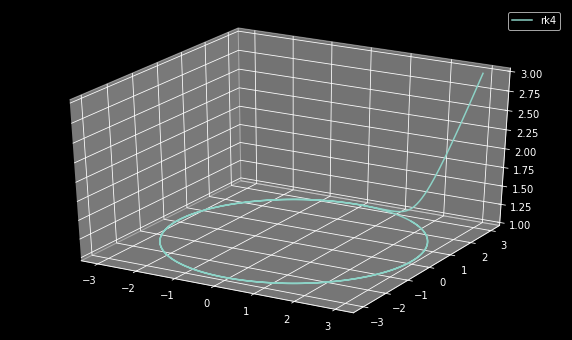

In [47]:
# Show the VF integral
# just show some integral curve
# from scipy.integrate import odeint
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


pos = [3.0, 3.0, 3.0]

def f(pos,t0):
    return VF(pos)*0.1

# curve2 = odeint(func=f,y0=pos,t=range(0,400))
curve=np.empty([4000,3])
for i in range(0,4000):
    curve[i,:] = pos
    pos = rk4_int(VF,pos,0.01) # function, intial condition, time interval

#mpl.rcParams['legend.fontsize'] = 10

#uncomment for plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(curve[:,0], curve[:,1], curve[:,2], label='rk4')
ax.legend()

# ax.plot(curve2[:,0], curve2[:,1], curve2[:,2], label='odeint')



plt.show()

In [48]:
def simulate(delta_t, x, u): 
    # x = np.add(x, delta_t * u)
    x += delta_t * u
    return x 

vec [-2.21553546 -5.97865778 21.        ]
vec norm [-0.10095123 -0.27241849  0.95686834]
vec [-2.21553546 -5.97865778 21.        ]
vec norm [-0.10095123 -0.27241849  0.95686834]
vec [-2.21442438 -5.97453646 20.98564697]
vec norm [-0.10096947 -0.27241651  0.95686698]
vec [-2.21442427 -5.97453647 20.985647  ]
vec norm [-0.10096946 -0.27241651  0.95686698]
vec [-2.21331331 -5.97041516 20.97129399]
vec norm [-0.10098773 -0.27241452  0.95686562]
vec [-2.21331331 -5.97041516 20.97129399]
vec norm [-0.10098773 -0.27241452  0.95686562]
vec [-2.21331331 -5.97041516 20.97129399]
vec norm [-0.10098773 -0.27241452  0.95686562]
vec [-2.21220246 -5.96629386 20.95694101]
vec norm [-0.10100603 -0.27241253  0.95686425]
vec [-2.21220235 -5.96629387 20.95694103]
vec norm [-0.10100603 -0.27241253  0.95686425]
vec [-2.21109163 -5.96217259 20.94258806]
vec norm [-0.10102436 -0.27241054  0.95686288]
vec [-2.21109163 -5.96217259 20.94258806]
vec norm [-0.10102436 -0.27241054  0.95686288]
vec [-2.21109163 -5.9

vec [-2.13473888 -5.67784087 19.95228627]
vec norm [-0.10236599 -0.27226646  0.9567613 ]
vec [-2.13473876 -5.67784088 19.95228629]
vec norm [-0.10236598 -0.27226646  0.9567613 ]
vec [-2.13363661 -5.67372069 19.93793487]
vec norm [-0.10238661 -0.27226427  0.95675971]
vec [-2.13363661 -5.67372069 19.93793487]
vec norm [-0.10238661 -0.27226427  0.95675971]
vec [-2.13363661 -5.67372069 19.93793487]
vec norm [-0.10238661 -0.27226427  0.95675971]
vec [-2.13253459 -5.66960052 19.92358348]
vec norm [-0.10240727 -0.27226208  0.95675812]
vec [-2.13253447 -5.66960053 19.9235835 ]
vec norm [-0.10240726 -0.27226208  0.95675812]
vec [-2.13143257 -5.66548038 19.90923213]
vec norm [-0.10242796 -0.27225989  0.95675653]
vec [-2.13143257 -5.66548038 19.90923213]
vec norm [-0.10242796 -0.27225989  0.95675653]
vec [-2.13143257 -5.66548038 19.90923213]
vec norm [-0.10242796 -0.27225989  0.95675653]
vec [-2.13033081 -5.66136023 19.89488078]
vec norm [-0.10244869 -0.27225769  0.95675494]
vec [-2.13033068 -5.6

vec norm [-0.10499325 -0.27199405  0.95655405]
vec [-2.00778203 -5.20002835 18.2876958 ]
vec norm [-0.10501858 -0.27199148  0.956552  ]
vec [-2.00778188 -5.20002837 18.28769583]
vec norm [-0.10501858 -0.27199148  0.956552  ]
vec [-2.00669581 -5.19591055 18.27334755]
vec norm [-0.10504396 -0.27198891  0.95654995]
vec [-2.00669581 -5.19591055 18.27334755]
vec norm [-0.10504396 -0.27198891  0.95654995]
vec [-2.00669581 -5.19591055 18.27334755]
vec norm [-0.10504396 -0.27198891  0.95654995]
vec [-2.00560989 -5.19179275 18.2589993 ]
vec norm [-0.10506939 -0.27198634  0.95654788]
vec [-2.00560975 -5.19179277 18.25899933]
vec norm [-0.10506938 -0.27198634  0.95654788]
vec [-2.00452398 -5.187675   18.24465111]
vec norm [-0.10509486 -0.27198376  0.95654582]
vec [-2.00452398 -5.187675   18.24465111]
vec norm [-0.10509486 -0.27198376  0.95654582]
vec [-2.00452398 -5.187675   18.24465111]
vec norm [-0.10509486 -0.27198376  0.95654582]
vec [-2.00343836 -5.18355725 18.23030292]
vec norm [-0.10512038

vec norm [-0.10732756 -0.271762    0.95636092]
vec [-1.9160164  -4.85010809 17.06821119]
vec norm [-0.10735738 -0.27175909  0.9563584 ]
vec [-1.9160164  -4.85010809 17.06821119]
vec norm [-0.10735738 -0.27175909  0.9563584 ]
vec [-1.9160164  -4.85010809 17.06821119]
vec norm [-0.10735738 -0.27175909  0.9563584 ]
vec [-1.91494387 -4.8459926  17.05386582]
vec norm [-0.10738725 -0.27175618  0.95635587]
vec [-1.91494371 -4.84599262 17.05386585]
vec norm [-0.10738724 -0.27175618  0.95635587]
vec [-1.91387134 -4.84187716 17.03952052]
vec norm [-0.10741718 -0.27175327  0.95635334]
vec [-1.91387134 -4.84187716 17.03952052]
vec norm [-0.10741718 -0.27175327  0.95635334]
vec [-1.91387134 -4.84187716 17.03952052]
vec norm [-0.10741718 -0.27175327  0.95635334]
vec [-1.91279915 -4.83776173 17.02517522]
vec norm [-0.10744718 -0.27175035  0.9563508 ]
vec [-1.91279899 -4.83776175 17.02517525]
vec norm [-0.10744717 -0.27175035  0.9563508 ]
vec [-1.91172696 -4.83364635 17.01082999]
vec norm [-0.10747722

vec [-1.80752639 -4.43050628 15.60519813]
vec norm [-0.11073942 -0.2714382   0.95606385]
vec [-1.80752639 -4.43050628 15.60519813]
vec norm [-0.11073942 -0.2714382   0.95606385]
vec [-1.80752639 -4.43050628 15.60519813]
vec norm [-0.11073942 -0.2714382   0.95606385]
vec [-1.8064725  -4.42639449 15.59085717]
vec norm [-0.11077628 -0.2714348   0.95606055]
vec [-1.80647231 -4.42639452 15.59085722]
vec norm [-0.11077626 -0.2714348   0.95606055]
vec [-1.80541863 -4.42228277 15.57651631]
vec norm [-0.1108132  -0.27143139  0.95605724]
vec [-1.80541863 -4.42228277 15.57651631]
vec norm [-0.1108132  -0.27143139  0.95605724]
vec [-1.80541863 -4.42228277 15.57651631]
vec norm [-0.1108132  -0.27143139  0.95605724]
vec [-1.80436514 -4.41817107 15.56217545]
vec norm [-0.11085021 -0.27142797  0.95605391]
vec [-1.80436495 -4.4181711  15.5621755 ]
vec norm [-0.11085019 -0.27142797  0.95605392]
vec [-1.80331166 -4.41405944 15.54783469]
vec norm [-0.11088728 -0.27142455  0.95605059]
vec [-1.80331166 -4.4

vec norm [-0.1142676  -0.27112081  0.95573868]
vec [-1.71660318 -4.07295602 14.35773822]
vec norm [-0.11426758 -0.27112081  0.95573868]
vec [-1.71556773 -4.06884847 14.34340214]
vec norm [-0.11431229 -0.27111689  0.95573445]
vec [-1.71556773 -4.06884847 14.34340214]
vec norm [-0.11431229 -0.27111689  0.95573445]
vec [-1.71556773 -4.06884847 14.34340214]
vec norm [-0.11431229 -0.27111689  0.95573445]
vec [-1.7145325  -4.06474099 14.32906613]
vec norm [-0.1143571  -0.27111297  0.9557302 ]
vec [-1.71453228 -4.06474102 14.32906619]
vec norm [-0.11435709 -0.27111297  0.9557302 ]
vec [-1.71349728 -4.06063359 14.31473024]
vec norm [-0.114402   -0.27110905  0.95572594]
vec [-1.71349728 -4.06063359 14.31473024]
vec norm [-0.114402   -0.27110905  0.95572594]
vec [-1.71349728 -4.06063359 14.31473024]
vec norm [-0.114402   -0.27110905  0.95572594]
vec [-1.7124625  -4.05652622 14.30039435]
vec norm [-0.11444702 -0.27110511  0.95572166]
vec [-1.71246229 -4.05652625 14.30039441]
vec norm [-0.114447  

vec norm [-0.11947869 -0.27068103  0.95522595]
vec [-1.61120451 -3.65021152 12.88149669]
vec norm [-0.11947869 -0.27068103  0.95522595]
vec [-1.61120451 -3.65021152 12.88149669]
vec norm [-0.11947869 -0.27068103  0.95522595]
vec [-1.61019463 -3.64611086 12.8671683 ]
vec norm [-0.11953603 -0.27067637  0.9552201 ]
vec [-1.61019438 -3.6461109  12.86716839]
vec norm [-0.11953602 -0.27067637  0.9552201 ]
vec [-1.60918477 -3.64201032 12.85284008]
vec norm [-0.1195935  -0.2706717   0.95521423]
vec [-1.60918477 -3.64201032 12.85284008]
vec norm [-0.1195935  -0.2706717   0.95521423]
vec [-1.60918477 -3.64201032 12.85284008]
vec norm [-0.1195935  -0.2706717   0.95521423]
vec [-1.60817543 -3.63790982 12.83851187]
vec norm [-0.11965114 -0.27066702  0.95520834]
vec [-1.60817518 -3.63790986 12.83851196]
vec norm [-0.11965112 -0.27066702  0.95520834]
vec [-1.60716611 -3.63380944 12.82418383]
vec norm [-0.1197089  -0.27066234  0.95520243]
vec [-1.60716611 -3.63380944 12.82418383]
vec norm [-0.1197089 

vec [-1.51751954 -3.26514008 11.53506011]
vec norm [-0.12558151 -0.27020491  0.9545777 ]
vec [-1.51653751 -3.26104828 11.52074145]
vec norm [-0.12565516 -0.2701994   0.95456957]
vec [-1.51653721 -3.26104833 11.52074157]
vec norm [-0.12565513 -0.2701994   0.95456957]
vec [-1.51555551 -3.25695664 11.50642303]
vec norm [-0.12572898 -0.27019388  0.95456141]
vec [-1.51555551 -3.25695664 11.50642303]
vec norm [-0.12572898 -0.27019388  0.95456141]
vec [-1.51555551 -3.25695664 11.50642303]
vec norm [-0.12572898 -0.27019388  0.95456141]
vec [-1.51457413 -3.25286506 11.49210461]
vec norm [-0.12580303 -0.27018835  0.95455322]
vec [-1.51457382 -3.25286511 11.49210473]
vec norm [-0.12580301 -0.27018836  0.95455322]
vec [-1.51359277 -3.24877365 11.47778643]
vec norm [-0.12587727 -0.27018281  0.954545  ]
vec [-1.51359277 -3.24877365 11.47778643]
vec norm [-0.12587727 -0.27018281  0.954545  ]
vec [-1.51359277 -3.24877365 11.47778643]
vec norm [-0.12587727 -0.27018281  0.954545  ]
vec [-1.51261204 -3.2

vec [-1.44575497 -2.9626799  10.4758455 ]
vec norm [-0.13164404 -0.2697685   0.95388406]
vec [-1.44575497 -2.9626799  10.4758455 ]
vec norm [-0.13164404 -0.2697685   0.95388406]
vec [-1.44575497 -2.9626799  10.4758455 ]
vec norm [-0.13164404 -0.2697685   0.95388406]
vec [-1.44479873 -2.95859763 10.46153724]
vec norm [-0.1317354  -0.26976218  0.95387324]
vec [-1.44479838 -2.95859769 10.4615374 ]
vec norm [-0.13173537 -0.26976218  0.95387324]
vec [-1.44384251 -2.95451557 10.4472293 ]
vec norm [-0.13182701 -0.26975585  0.95386237]
vec [-1.44384251 -2.95451557 10.4472293 ]
vec norm [-0.13182701 -0.26975585  0.95386237]
vec [-1.44384251 -2.95451557 10.4472293 ]
vec norm [-0.13182701 -0.26975585  0.95386237]
vec [-1.44288702 -2.9504336  10.43292136]
vec norm [-0.13191894 -0.26974951  0.95385146]
vec [-1.44288667 -2.95043366 10.43292153]
vec norm [-0.1319189  -0.26974951  0.95385146]
vec [-1.44193156 -2.94635183 10.41861376]
vec norm [-0.13201111 -0.26974315  0.9538405 ]
vec [-1.44193156 -2.9

vec [-1.36680419 -2.62035327  9.27459633]
vec norm [-0.14041415 -0.2691934   0.95279525]
vec [-1.36680419 -2.62035327  9.27459633]
vec norm [-0.14041415 -0.2691934   0.95279525]
vec [-1.36680419 -2.62035327  9.27459633]
vec norm [-0.14041415 -0.2691934   0.95279525]
vec [-1.36588249 -2.61628588  9.2603044 ]
vec norm [-0.14053373 -0.26918598  0.95277971]
vec [-1.36588207 -2.61628596  9.26030464]
vec norm [-0.14053369 -0.26918598  0.95277972]
vec [-1.36496083 -2.61221878  9.24601294]
vec norm [-0.14065367 -0.26917855  0.95276411]
vec [-1.36496083 -2.61221878  9.24601294]
vec norm [-0.14065367 -0.26917855  0.95276411]
vec [-1.36496083 -2.61221878  9.24601294]
vec norm [-0.14065367 -0.26917855  0.95276411]
vec [-1.36404004 -2.60815182  9.23172148]
vec norm [-0.14077407 -0.26917109  0.95274844]
vec [-1.36403962 -2.6081519   9.23172172]
vec norm [-0.14077402 -0.2691711   0.95274844]
vec [-1.36311928 -2.60408515  9.21743049]
vec norm [-0.14089483 -0.26916363  0.95273269]
vec [-1.36311928 -2.6

vec [-1.28051531 -2.23100245  7.90382489]
vec norm [-0.15405823 -0.26841092  0.95090569]
vec [-1.27964215 -2.22696041  7.8895613 ]
vec norm [-0.15422748 -0.26840198  0.95088078]
vec [-1.27964163 -2.22696052  7.88956167]
vec norm [-0.15422741 -0.26840198  0.95088079]
vec [-1.27876904 -2.2229188   7.87529846]
vec norm [-0.15439731 -0.26839302  0.95085575]
vec [-1.27876904 -2.2229188   7.87529846]
vec norm [-0.15439731 -0.26839302  0.95085575]
vec [-1.27876904 -2.2229188   7.87529846]
vec norm [-0.15439731 -0.26839302  0.95085575]
vec [-1.27789702 -2.21887741  7.86103563]
vec norm [-0.15456787 -0.26838404  0.95083057]
vec [-1.2778965  -2.21887752  7.861036  ]
vec norm [-0.1545678  -0.26838404  0.95083058]
vec [-1.27702506 -2.21483647  7.84677355]
vec norm [-0.15473903 -0.26837504  0.95080527]
vec [-1.27702505 -2.21483647  7.84677355]
vec norm [-0.15473903 -0.26837504  0.95080527]
vec [-1.27702505 -2.21483647  7.84677355]
vec norm [-0.15473903 -0.26837504  0.95080527]
vec [-1.27615418 -2.2

vec norm [-0.17266449 -0.26752321  0.9479548 ]
vec [-1.20354944 -1.86475874  6.60767716]
vec norm [-0.17266438 -0.26752321  0.94795482]
vec [-1.20273466 -1.86075478  6.59345784]
vec norm [-0.17291192 -0.2675126   0.94791269]
vec [-1.20273466 -1.86075478  6.59345784]
vec norm [-0.17291192 -0.2675126   0.94791269]
vec [-1.20273466 -1.86075478  6.59345784]
vec norm [-0.17291192 -0.2675126   0.94791269]
vec [-1.2019206  -1.85675135  6.57923915]
vec norm [-0.17316058 -0.26750197  0.9478703 ]
vec [-1.20191995 -1.85675153  6.57923979]
vec norm [-0.17316047 -0.26750198  0.94787032]
vec [-1.20110662 -1.85274863  6.56502173]
vec norm [-0.17341025 -0.26749133  0.94782766]
vec [-1.20110662 -1.85274863  6.56502173]
vec norm [-0.17341025 -0.26749133  0.94782766]
vec [-1.20110662 -1.85274863  6.56502173]
vec norm [-0.17341025 -0.26749133  0.94782766]
vec [-1.20029402 -1.84874628  6.55080432]
vec norm [-0.17366117 -0.26748066  0.94778473]
vec [-1.20029337 -1.84874646  6.55080496]
vec norm [-0.17366106

vec [-1.14685059 -1.57804408  5.58580741]
vec norm [-0.19383449 -0.26671248  0.94408297]
vec [-1.14609406 -1.57408761  5.57164617]
vec norm [-0.19418484 -0.26670058  0.94401433]
vec [-1.14609406 -1.57408761  5.57164617]
vec norm [-0.19418484 -0.26670058  0.94401433]
vec [-1.14609406 -1.57408761  5.57164617]
vec norm [-0.19418484 -0.26670058  0.94401433]
vec [-1.14533843 -1.57013195  5.55748596]
vec norm [-0.19453701 -0.26668866  0.94394518]
vec [-1.14533762 -1.57013222  5.55748699]
vec norm [-0.19453684 -0.26668867  0.94394522]
vec [-1.1445829  -1.56617739  5.54332782]
vec norm [-0.19489084 -0.26667674  0.94387556]
vec [-1.1445829  -1.56617739  5.54332782]
vec norm [-0.19489084 -0.26667674  0.94387556]
vec [-1.1445829  -1.56617739  5.54332782]
vec norm [-0.19489084 -0.26667674  0.94387556]
vec [-1.14382908 -1.56222339  5.52916969]
vec norm [-0.19524669 -0.26666479  0.94380539]
vec [-1.14382828 -1.56222366  5.52917074]
vec norm [-0.19524652 -0.26666479  0.94380543]
vec [-1.14307538 -1.5

vec [-1.07035626 -1.15306381  4.05051049]
vec norm [-0.24632361 -0.26535729  0.93215352]
vec [-1.07035625 -1.15306381  4.0505105 ]
vec norm [-0.24632361 -0.26535729  0.93215352]
vec [-1.07035625 -1.15306381  4.0505105 ]
vec norm [-0.24632361 -0.26535729  0.93215352]
vec [-1.06971885 -1.14924078  4.0365282 ]
vec norm [-0.24698427 -0.26534485  0.93198223]
vec [-1.06971771 -1.14924142  4.03653077]
vec norm [-0.24698387 -0.26534486  0.93198233]
vec [-1.06908163 -1.1454202   4.02255103]
vec norm [-0.24764889 -0.26533244  0.93180938]
vec [-1.06908163 -1.1454202   4.02255104]
vec norm [-0.24764889 -0.26533244  0.93180938]
vec [-1.06908163 -1.1454202   4.02255104]
vec norm [-0.24764889 -0.26533244  0.93180938]
vec [-1.06844688 -1.1416008   4.0085739 ]
vec norm [-0.2483183  -0.26532004  0.93163475]
vec [-1.06844573 -1.14160145  4.00857652]
vec norm [-0.24831789 -0.26532004  0.93163485]
vec [-1.06781232 -1.13778389  3.994602  ]
vec norm [-0.24899173 -0.26530766  0.93145851]
vec [-1.06781232 -1.1

vec norm [-0.32910745 -0.26440055  0.90652117]
vec [-1.01891264 -0.81858088  2.80657849]
vec norm [-0.32910745 -0.26440055  0.90652117]
vec [-1.01841851 -0.81500736  2.79298067]
vec norm [-0.33038114 -0.26439333  0.90605986]
vec [-1.01841692 -0.81500902  2.79298759]
vec norm [-0.33037996 -0.26439334  0.90606029]
vec [-1.0179247  -0.8114397   2.77939668]
vec norm [-0.33166393 -0.26438624  0.90559315]
vec [-1.01792469 -0.8114397   2.77939671]
vec norm [-0.33166393 -0.26438624  0.90559315]
vec [-1.01792469 -0.8114397   2.77939671]
vec norm [-0.33166393 -0.26438624  0.90559315]
vec [-1.01743439 -0.80787461  2.76581282]
vec norm [-0.33295829 -0.26437926  0.90512009]
vec [-1.01743279 -0.80787631  2.76581991]
vec norm [-0.33295708 -0.26437927  0.90512054]
vec [-1.01694441 -0.80431549  2.7522431 ]
vec norm [-0.33426193 -0.26437241  0.90464147]
vec [-1.01694441 -0.8043155   2.75224313]
vec norm [-0.33426192 -0.26437241  0.90464147]
vec [-1.01694441 -0.8043155   2.75224313]
vec norm [-0.33426192

vec norm [-0.48066773 -0.26440753  0.83609042]
vec [-0.98476186 -0.53887281  1.70092419]
vec norm [-0.4832095  -0.2644177   0.83462079]
vec [-0.98476185 -0.53887284  1.70092434]
vec norm [-0.48320946 -0.26441769  0.83462081]
vec [-0.98476185 -0.53887284  1.70092434]
vec norm [-0.48320946 -0.26441769  0.83462081]
vec [-0.9844562  -0.53588561  1.68840503]
vec norm [-0.48577145 -0.26442815  0.83312895]
vec [-0.98445401 -0.53589058  1.68842741]
vec norm [-0.48576584 -0.26442813  0.83313223]
vec [-0.98415091 -0.53291451  1.67593038]
vec norm [-0.48834811 -0.26443891  0.83161781]
vec [-0.9841509  -0.53291453  1.67593054]
vec norm [-0.48834807 -0.2644389   0.83161784]
vec [-0.9841509  -0.53291453  1.67593054]
vec norm [-0.48834807 -0.2644389   0.83161784]
vec [-0.98385033 -0.52994977  1.66345627]
vec norm [-0.49095067 -0.26444998  0.83008051]
vec [-0.98384812 -0.52995487  1.66347933]
vec norm [-0.49094482 -0.26444996  0.83008397]
vec [-0.9835501  -0.52700154  1.65102802]
vec norm [-0.4935678 

vec [-0.96784709 -0.34916794  0.80760933]
vec norm [-0.739941   -0.26694679  0.61743561]
vec [-0.96784707 -0.34916798  0.80760992]
vec norm [-0.73994078 -0.26694675  0.61743588]
vec [-0.96784707 -0.34916798  0.80760992]
vec norm [-0.73994078 -0.26694675  0.61743588]
vec [-0.96771671 -0.34761565  0.79834838]
vec norm [-0.74337057 -0.26702778  0.61326696]
vec [-0.96771429 -0.34762543  0.79841091]
vec norm [-0.74334635 -0.26702725  0.61329655]
vec [-0.96758504 -0.34609795  0.78921102]
vec norm [-0.74676178 -0.26711112  0.60909646]
vec [-0.96758503 -0.34609799  0.78921162]
vec norm [-0.74676156 -0.26711107  0.60909675]
vec [-0.96758503 -0.34609799  0.78921162]
vec norm [-0.74676156 -0.26711107  0.60909675]
vec [-0.96745681 -0.34459563  0.78007517]
vec norm [-0.75016126 -0.26719776  0.60486646]
vec [-0.96745441 -0.34460536  0.78013862]
vec norm [-0.75013661 -0.26719718  0.60489728]
vec [-0.9673272  -0.34312807  0.7710647 ]
vec norm [-0.75352012 -0.26728692  0.60063727]
vec [-0.96732719 -0.3

vec norm [-0.93089666 -0.31127129  0.19115856]
vec [-0.95001042 -0.31765105  0.19512398]
vec norm [-0.93089286 -0.3112588   0.1911974 ]
vec [-0.94971645 -0.31837431  0.19225544]
vec norm [-0.93114571 -0.31214882  0.18849608]
vec [-0.94971651 -0.31837409  0.19225586]
vec norm [-0.93114571 -0.31214859  0.18849648]
vec [-0.94971651 -0.31837409  0.19225586]
vec norm [-0.93114571 -0.31214859  0.18849648]
vec [-0.94941921 -0.31910967  0.18942841]
vec norm [-0.93138032 -0.31304661  0.18582928]
vec [-0.94942216 -0.31909877  0.18946842]
vec norm [-0.93137703 -0.31303384  0.1858673 ]
vec [-0.94912142 -0.31984698  0.18667984]
vec norm [-0.93159397 -0.31394036  0.18323242]
vec [-0.94912148 -0.31984675  0.18668025]
vec norm [-0.93159398 -0.31394012  0.18323281]
vec [-0.94912148 -0.31984675  0.18668025]
vec norm [-0.93159398 -0.31394012  0.18323281]
vec [-0.9488174  -0.32060692  0.18393175]
vec norm [-0.93179337 -0.31485448  0.18063158]
vec [-0.94882049 -0.32059564  0.18397077]
vec norm [-0.93179057

vec [-0.91345206 -0.40729059  0.05587474]
vec norm [-0.91190211 -0.4065995   0.05577993]
vec [-0.91286799 -0.40858832  0.05503785]
vec norm [-0.91136477 -0.4079155   0.05494722]
vec [-0.91286812 -0.40858801  0.05503798]
vec norm [-0.9113649  -0.40791519  0.05494735]
vec [-0.91286812 -0.40858801  0.05503798]
vec norm [-0.9113649  -0.40791519  0.05494735]
vec [-0.91228093 -0.40988801  0.05421377]
vec norm [-0.91082304 -0.40923299  0.05412713]
vec [-0.91228935 -0.40986842  0.05422607]
vec norm [-0.91083116 -0.40921329  0.0541394 ]
vec [-0.9116987  -0.41117153  0.0534138 ]
vec norm [-0.9102845  -0.41053373  0.05333094]
vec [-0.91169883 -0.41117122  0.05341392]
vec norm [-0.91028463 -0.41053342  0.05333107]
vec [-0.91169883 -0.41117122  0.05341392]
vec norm [-0.91028463 -0.41053342  0.05333107]
vec [-0.91110507 -0.41247649  0.05261395]
vec norm [-0.90973353 -0.41185556  0.05253475]
vec [-0.91111361 -0.41245681  0.0526259 ]
vec norm [-0.90974179 -0.41183579  0.05254666]
vec [-0.91051639 -0.4

vec norm [-0.84887423 -0.5283961   0.01449482]
vec [-0.84811741 -0.52982562  0.01427901]
vec norm [-0.84802319 -0.52976676  0.01427742]
vec [-0.84811761 -0.5298253   0.01427904]
vec norm [-0.84802339 -0.52976644  0.01427746]
vec [-0.84811761 -0.5298253   0.01427904]
vec norm [-0.84802339 -0.52976644  0.01427746]
vec [-0.84726119 -0.53119334  0.01406488]
vec norm [-0.84716983 -0.53113605  0.01406336]
vec [-0.84727397 -0.53117277  0.01406809]
vec norm [-0.84718265 -0.53111552  0.01406658]
vec [-0.84641458 -0.53254073  0.01385705]
vec norm [-0.84632602 -0.53248501  0.0138556 ]
vec [-0.84641478 -0.53254041  0.01385708]
vec norm [-0.84632622 -0.5324847   0.01385563]
vec [-0.84641478 -0.53254041  0.01385708]
vec norm [-0.84632622 -0.5324847   0.01385563]
vec [-0.84555296 -0.53390733  0.01364924]
vec norm [-0.84546709 -0.53385311  0.01364786]
vec [-0.84556582 -0.53388678  0.01365236]
vec norm [-0.84547999 -0.53383259  0.01365097]
vec [-0.84470104 -0.5352536   0.01344755]
vec norm [-0.84461781

vec norm [-0.75720007 -0.65317372  0.00348629]
vec [-0.75720508 -0.65317804  0.00348631]
vec norm [-0.75720007 -0.65317372  0.00348629]
vec [-0.75611761 -0.65443658  0.00343402]
vec norm [-0.75611275 -0.65443237  0.003434  ]
vec [-0.75613392 -0.6544177   0.0034348 ]
vec norm [-0.75612907 -0.6544135   0.00343478]
vec [-0.75504387 -0.65567506  0.00338327]
vec norm [-0.75503916 -0.65567097  0.00338325]
vec [-0.75504412 -0.65567477  0.00338328]
vec norm [-0.75503941 -0.65567068  0.00338326]
vec [-0.75504412 -0.65567477  0.00338328]
vec norm [-0.75503941 -0.65567068  0.00338326]
vec [-0.75395219 -0.65693007  0.00333253]
vec norm [-0.75394762 -0.65692608  0.00333251]
vec [-0.75396857 -0.65691124  0.00333329]
vec norm [-0.75396401 -0.65690727  0.00333327]
vec [-0.75287406 -0.65816534  0.00328328]
vec norm [-0.75286964 -0.65816147  0.00328326]
vec [-0.75287431 -0.65816505  0.00328329]
vec norm [-0.75286989 -0.65816119  0.00328327]
vec [-0.75287431 -0.65816505  0.00328329]
vec norm [-0.75286989

vec [-0.64154053 -0.76708918  0.0008016 ]
vec norm [-0.6415403  -0.76708891  0.00080159]
vec [-0.64154053 -0.76708918  0.0008016 ]
vec norm [-0.6415403  -0.76708891  0.00080159]
vec [-0.64025436 -0.76816301  0.00078957]
vec norm [-0.64025414 -0.76816275  0.00078957]
vec [-0.64027366 -0.76814692  0.00078975]
vec norm [-0.64027345 -0.76814666  0.00078975]
vec [-0.63898524 -0.76921903  0.0007779 ]
vec norm [-0.63898503 -0.76921877  0.0007779 ]
vec [-0.63898554 -0.76921878  0.0007779 ]
vec norm [-0.63898533 -0.76921853  0.0007779 ]
vec [-0.63898554 -0.76921878  0.0007779 ]
vec norm [-0.63898533 -0.76921853  0.0007779 ]
vec [-6.37695722e-01 -7.70288404e-01  7.66235830e-04]
vec norm [-6.37695516e-01 -7.70288155e-01  7.66235583e-04]
vec [-6.37715077e-01 -7.70272372e-01  7.66410859e-04]
vec norm [-6.37714875e-01 -7.70272128e-01  7.66410615e-04]
vec [-6.36423018e-01 -7.71340258e-01  7.54912074e-04]
vec norm [-6.36422821e-01 -7.71340018e-01  7.54911839e-04]
vec [-6.36423313e-01 -7.71340015e-01  

vec [-5.06982646e-01 -8.61956264e-01  1.81542567e-04]
vec norm [-5.06982636e-01 -8.61956248e-01  1.81542564e-04]
vec [-5.07004343e-01 -8.61943500e-01  1.81584036e-04]
vec norm [-5.07004334e-01 -8.61943486e-01  1.81584033e-04]
vec [-5.05556505e-01 -8.62793500e-01  1.78859654e-04]
vec norm [-5.05556496e-01 -8.62793485e-01  1.78859651e-04]
vec [-5.05556835e-01 -8.62793307e-01  1.78860075e-04]
vec norm [-5.05556826e-01 -8.62793292e-01  1.78860071e-04]
vec [-5.05556835e-01 -8.62793307e-01  1.78860075e-04]
vec norm [-5.05556826e-01 -8.62793292e-01  1.78860071e-04]
vec [-5.04108054e-01 -8.63640593e-01  1.76177174e-04]
vec norm [-5.04108045e-01 -8.63640578e-01  1.76177170e-04]
vec [-5.04129793e-01 -8.63627902e-01  1.76217417e-04]
vec norm [-5.04129785e-01 -8.63627888e-01  1.76217414e-04]
vec [-5.02679111e-01 -8.64473085e-01  1.73573552e-04]
vec norm [-5.02679102e-01 -8.64473071e-01  1.73573549e-04]
vec [-5.02679441e-01 -8.64472893e-01  1.73573961e-04]
vec norm [-5.02679433e-01 -8.64472879e-01 

vec [-3.81802026e-01 -9.24244131e-01  5.15070439e-05]
vec norm [-3.81802025e-01 -9.24244130e-01  5.15070438e-05]
vec [-3.80249219e-01 -9.24884064e-01  5.07342618e-05]
vec norm [-3.80249219e-01 -9.24884063e-01  5.07342617e-05]
vec [-3.80249572e-01 -9.24883919e-01  5.07343812e-05]
vec norm [-3.80249572e-01 -9.24883917e-01  5.07343811e-05]
vec [-3.80249572e-01 -9.24883919e-01  5.07343812e-05]
vec norm [-3.80249572e-01 -9.24883917e-01  5.07343811e-05]
vec [-3.78696218e-01 -9.25521029e-01  4.99733655e-05]
vec norm [-3.78696218e-01 -9.25521027e-01  4.99733654e-05]
vec [-3.78719524e-01 -9.25511492e-01  4.99847807e-05]
vec norm [-3.78719524e-01 -9.25511491e-01  4.99847806e-05]
vec [-3.77164587e-01 -9.26146249e-01  4.92348378e-05]
vec norm [-3.77164586e-01 -9.26146248e-01  4.92348377e-05]
vec [-3.77164941e-01 -9.26146105e-01  4.92349536e-05]
vec norm [-3.77164940e-01 -9.26146104e-01  4.92349536e-05]
vec [-3.77164941e-01 -9.26146105e-01  4.92349536e-05]
vec norm [-3.77164940e-01 -9.26146104e-01 

vec [-2.47478346e-01 -9.68893425e-01  1.43909778e-05]
vec norm [-2.47478346e-01 -9.68893425e-01  1.43909778e-05]
vec [-2.47478716e-01 -9.68893330e-01  1.43910116e-05]
vec norm [-2.47478716e-01 -9.68893330e-01  1.43910116e-05]
vec [-2.47478716e-01 -9.68893330e-01  1.43910116e-05]
vec norm [-2.47478716e-01 -9.68893330e-01  1.43910116e-05]
vec [-2.45851499e-01 -9.69307506e-01  1.41751465e-05]
vec norm [-2.45851499e-01 -9.69307505e-01  1.41751465e-05]
vec [-2.45875911e-01 -9.69301314e-01  1.41783844e-05]
vec norm [-2.45875910e-01 -9.69301314e-01  1.41783844e-05]
vec [-2.44247457e-01 -9.69712937e-01  1.39656601e-05]
vec norm [-2.44247457e-01 -9.69712937e-01  1.39656601e-05]
vec [-2.44247828e-01 -9.69712843e-01  1.39656930e-05]
vec norm [-2.44247828e-01 -9.69712843e-01  1.39656930e-05]
vec [-2.44247828e-01 -9.69712843e-01  1.39656930e-05]
vec norm [-2.44247828e-01 -9.69712843e-01  1.39656930e-05]
vec [-2.42619238e-01 -9.70121593e-01  1.37562076e-05]
vec norm [-2.42619238e-01 -9.70121593e-01 

vec [-8.83113317e-02 -9.96092922e-01  3.35925288e-06]
vec norm [-8.83113317e-02 -9.96092922e-01  3.35925288e-06]
vec [-8.66380505e-02 -9.96239855e-01  3.30885258e-06]
vec norm [-8.66380505e-02 -9.96239855e-01  3.30885258e-06]
vec [-8.66384312e-02 -9.96239822e-01  3.30886037e-06]
vec norm [-8.66384312e-02 -9.96239822e-01  3.30886037e-06]
vec [-8.66384312e-02 -9.96239822e-01  3.30886037e-06]
vec norm [-8.66384312e-02 -9.96239822e-01  3.30886037e-06]
vec [-8.49654737e-02 -9.96383896e-01  3.25922746e-06]
vec norm [-8.49654737e-02 -9.96383896e-01  3.25922746e-06]
vec [-8.49905675e-02 -9.96381756e-01  3.25997196e-06]
vec norm [-8.49905675e-02 -9.96381756e-01  3.25997196e-06]
vec [-8.33168054e-02 -9.96523111e-01  3.21106121e-06]
vec norm [-8.33168054e-02 -9.96523111e-01  3.21106121e-06]
vec [-8.33171862e-02 -9.96523079e-01  3.21106877e-06]
vec norm [-8.33171862e-02 -9.96523079e-01  3.21106877e-06]
vec [-8.33171862e-02 -9.96523079e-01  3.21106877e-06]
vec norm [-8.33171862e-02 -9.96523079e-01 

vec [ 6.98617669e-02 -9.97556682e-01  8.07836042e-07]
vec norm [ 6.98617669e-02 -9.97556682e-01  8.07836042e-07]
vec [ 6.98617669e-02 -9.97556682e-01  8.07836042e-07]
vec norm [ 6.98617669e-02 -9.97556682e-01  8.07836042e-07]
vec [ 7.15367263e-02 -9.97437966e-01  7.95718501e-07]
vec norm [ 7.15367263e-02 -9.97437966e-01  7.95718501e-07]
vec [ 7.15116057e-02 -9.97439768e-01  7.95900265e-07]
vec norm [ 7.15116057e-02 -9.97439768e-01  7.95900265e-07]
vec [ 7.31869354e-02 -9.97318240e-01  7.83959034e-07]
vec norm [ 7.31869354e-02 -9.97318240e-01  7.83959034e-07]
vec [ 7.31865543e-02 -9.97318268e-01  7.83960879e-07]
vec norm [ 7.31865543e-02 -9.97318268e-01  7.83960879e-07]
vec [ 7.31865543e-02 -9.97318268e-01  7.83960879e-07]
vec norm [ 7.31865543e-02 -9.97318268e-01  7.83960879e-07]
vec [ 7.48611088e-02 -9.97193970e-01  7.72201466e-07]
vec norm [ 7.48611088e-02 -9.97193970e-01  7.72201466e-07]
vec [ 7.48359944e-02 -9.97195855e-01  7.72377857e-07]
vec norm [ 7.48359944e-02 -9.97195855e-01 

vec [ 2.08380234e-01 -9.78047892e-01  2.29145948e-07]
vec norm [ 2.08380234e-01 -9.78047892e-01  2.29145948e-07]
vec [ 2.08380234e-01 -9.78047892e-01  2.29145948e-07]
vec norm [ 2.08380234e-01 -9.78047892e-01  2.29145948e-07]
vec [ 2.10022242e-01 -9.77696608e-01  2.25708759e-07]
vec norm [ 2.10022242e-01 -9.77696608e-01  2.25708759e-07]
vec [ 2.09997619e-01 -9.77701897e-01  2.25760316e-07]
vec norm [ 2.09997619e-01 -9.77701897e-01  2.25760316e-07]
vec [ 2.11639601e-01 -9.77347778e-01  2.22373138e-07]
vec norm [ 2.11639601e-01 -9.77347778e-01  2.22373138e-07]
vec [ 2.11639228e-01 -9.77347859e-01  2.22373662e-07]
vec norm [ 2.11639228e-01 -9.77347859e-01  2.22373662e-07]
vec [ 2.11639228e-01 -9.77347859e-01  2.22373662e-07]
vec norm [ 2.11639228e-01 -9.77347859e-01  2.22373662e-07]
vec [ 2.13280056e-01 -9.76991104e-01  2.19038057e-07]
vec norm [ 2.13280056e-01 -9.76991104e-01  2.19038057e-07]
vec [ 2.13255450e-01 -9.76996475e-01  2.19088091e-07]
vec norm [ 2.13255450e-01 -9.76996475e-01 

vec [ 3.55315739e-01 -9.34746343e-01  5.76482065e-08]
vec norm [ 3.55315739e-01 -9.34746343e-01  5.76482065e-08]
vec [ 3.55315739e-01 -9.34746343e-01  5.76482065e-08]
vec norm [ 3.55315739e-01 -9.34746343e-01  5.76482065e-08]
vec [ 3.56884831e-01 -9.34148392e-01  5.67834836e-08]
vec norm [ 3.56884831e-01 -9.34148392e-01  5.67834836e-08]
vec [ 3.56861304e-01 -9.34157380e-01  5.67964542e-08]
vec norm [ 3.56861304e-01 -9.34157380e-01  5.67964542e-08]
vec [ 3.58429937e-01 -9.33556629e-01  5.59443128e-08]
vec norm [ 3.58429937e-01 -9.33556629e-01  5.59443128e-08]
vec [ 3.58429580e-01 -9.33556766e-01  5.59444444e-08]
vec norm [ 3.58429580e-01 -9.33556766e-01  5.59444444e-08]
vec [ 3.58429580e-01 -9.33556766e-01  5.59444444e-08]
vec norm [ 3.58429580e-01 -9.33556766e-01  5.59444444e-08]
vec [ 3.59996670e-01 -9.32953588e-01  5.51052777e-08]
vec norm [ 3.59996670e-01 -9.32953588e-01  5.51052777e-08]
vec [ 3.59973173e-01 -9.32962655e-01  5.51178653e-08]
vec norm [ 3.59973173e-01 -9.32962654e-01 

vec [ 5.11204050e-01 -8.59459376e-01  1.21139678e-08]
vec norm [ 5.11204050e-01 -8.59459376e-01  1.21139678e-08]
vec [ 5.11204050e-01 -8.59459376e-01  1.21139678e-08]
vec norm [ 5.11204050e-01 -8.59459376e-01  1.21139678e-08]
vec [ 5.12646502e-01 -8.58599769e-01  1.19322582e-08]
vec norm [ 5.12646502e-01 -8.58599769e-01  1.19322582e-08]
vec [ 5.12624878e-01 -8.58612680e-01  1.19349840e-08]
vec norm [ 5.12624878e-01 -8.58612680e-01  1.19349840e-08]
vec [ 5.14066396e-01 -8.57750395e-01  1.17559182e-08]
vec norm [ 5.14066396e-01 -8.57750395e-01  1.17559182e-08]
vec [ 5.14066069e-01 -8.57750591e-01  1.17559459e-08]
vec norm [ 5.14066069e-01 -8.57750591e-01  1.17559459e-08]
vec [ 5.14066069e-01 -8.57750591e-01  1.17559459e-08]
vec norm [ 5.14066069e-01 -8.57750591e-01  1.17559459e-08]
vec [ 5.15505648e-01 -8.56886181e-01  1.15796066e-08]
vec norm [ 5.15505648e-01 -8.56886181e-01  1.15796066e-08]
vec [ 5.15484067e-01 -8.56899164e-01  1.15822518e-08]
vec norm [ 5.15484067e-01 -8.56899164e-01 

vec norm [ 6.30034503e-01 -7.76567141e-01  3.28460192e-09]
vec [ 6.30014945e-01 -7.76583008e-01  3.28535232e-09]
vec norm [ 6.30014945e-01 -7.76583008e-01  3.28535232e-09]
vec [ 6.31318510e-01 -7.75523655e-01  3.23606075e-09]
vec norm [ 6.31318510e-01 -7.75523655e-01  3.23606075e-09]
vec [ 6.31318214e-01 -7.75523896e-01  3.23606841e-09]
vec norm [ 6.31318214e-01 -7.75523896e-01  3.23606841e-09]
vec [ 6.31318214e-01 -7.75523896e-01  3.23606841e-09]
vec norm [ 6.31318214e-01 -7.75523896e-01  3.23606841e-09]
vec [ 6.32619556e-01 -7.74462716e-01  3.18752724e-09]
vec norm [ 6.32619556e-01 -7.74462716e-01  3.18752724e-09]
vec [ 6.32600051e-01 -7.74478648e-01  3.18825566e-09]
vec norm [ 6.32600050e-01 -7.74478648e-01  3.18825566e-09]
vec [ 6.33900077e-01 -7.73414955e-01  3.14042059e-09]
vec norm [ 6.33900077e-01 -7.73414955e-01  3.14042059e-09]
vec [ 6.33899781e-01 -7.73415197e-01  3.14042825e-09]
vec norm [ 6.33899781e-01 -7.73415197e-01  3.14042825e-09]
vec [ 6.33899781e-01 -7.73415197e-01 

vec norm [ 7.31090470e-01 -6.82280532e-01  9.45876710e-10]
vec [ 7.31090210e-01 -6.82280811e-01  9.45879042e-10]
vec norm [ 7.31090210e-01 -6.82280811e-01  9.45879042e-10]
vec [ 7.31090210e-01 -6.82280811e-01  9.45879042e-10]
vec norm [ 7.31090210e-01 -6.82280811e-01  9.45879042e-10]
vec [ 7.32234841e-01 -6.81052229e-01  9.31690725e-10]
vec norm [ 7.32234841e-01 -6.81052229e-01  9.31690724e-10]
vec [ 7.32217688e-01 -6.81070670e-01  9.31903554e-10]
vec norm [ 7.32217688e-01 -6.81070670e-01  9.31903554e-10]
vec [ 7.33360673e-01 -6.79839778e-01  9.17922072e-10]
vec norm [ 7.33360673e-01 -6.79839778e-01  9.17922072e-10]
vec [ 7.33360413e-01 -6.79840058e-01  9.17924070e-10]
vec norm [ 7.33360413e-01 -6.79840058e-01  9.17924070e-10]
vec [ 7.33360413e-01 -6.79840058e-01  9.17924070e-10]
vec norm [ 7.33360413e-01 -6.79840058e-01  9.17924070e-10]
vec [ 7.34500943e-01 -6.78607667e-01  9.04155084e-10]
vec norm [ 7.34500943e-01 -6.78607667e-01  9.04155084e-10]
vec [ 7.34483852e-01 -6.78626165e-01 

vec [ 8.22950490e-01 -5.68113097e-01  2.52677546e-10]
vec norm [ 8.22950490e-01 -5.68113097e-01  2.52677546e-10]
vec [ 8.23903285e-01 -5.66730427e-01  2.48887244e-10]
vec norm [ 8.23903285e-01 -5.66730427e-01  2.48887244e-10]
vec [ 8.23889012e-01 -5.66751177e-01  2.48944199e-10]
vec norm [ 8.23889012e-01 -5.66751177e-01  2.48944199e-10]
vec [ 8.24839841e-01 -5.65366462e-01  2.45209186e-10]
vec norm [ 8.24839841e-01 -5.65366462e-01  2.45209186e-10]
vec [ 8.24839625e-01 -5.65366778e-01  2.45209852e-10]
vec norm [ 8.24839625e-01 -5.65366778e-01  2.45209852e-10]
vec [ 8.24839625e-01 -5.65366778e-01  2.45209852e-10]
vec norm [ 8.24839625e-01 -5.65366778e-01  2.45209852e-10]
vec [ 8.25787806e-01 -5.63980939e-01  2.41531795e-10]
vec norm [ 8.25787806e-01 -5.63980939e-01  2.41531795e-10]
vec [ 8.25773602e-01 -5.64001737e-01  2.41586751e-10]
vec norm [ 8.25773601e-01 -5.64001737e-01  2.41586751e-10]
vec [ 8.26719810e-01 -5.62613861e-01  2.37962317e-10]
vec norm [ 8.26719810e-01 -5.62613861e-01 

vec [ 9.02237830e-01 -4.31238796e-01  6.07643935e-11]
vec norm [ 9.02237830e-01 -4.31238796e-01  6.07643935e-11]
vec [ 9.02226968e-01 -4.31261519e-01  6.07780493e-11]
vec norm [ 9.02226968e-01 -4.31261519e-01  6.07780493e-11]
vec [ 9.02950101e-01 -4.29745408e-01  5.98664451e-11]
vec norm [ 9.02950101e-01 -4.29745408e-01  5.98664451e-11]
vec [ 9.02949936e-01 -4.29745753e-01  5.98664451e-11]
vec norm [ 9.02949936e-01 -4.29745753e-01  5.98664451e-11]
vec [ 9.02949936e-01 -4.29745753e-01  5.98664451e-11]
vec norm [ 9.02949936e-01 -4.29745753e-01  5.98664451e-11]
vec [ 9.03670277e-01 -4.28228946e-01  5.89684968e-11]
vec norm [ 9.03670277e-01 -4.28228946e-01  5.89684967e-11]
vec [ 9.03659492e-01 -4.28251705e-01  5.89818194e-11]
vec norm [ 9.03659492e-01 -4.28251705e-01  5.89818194e-11]
vec [ 9.04377566e-01 -4.26733193e-01  5.80968607e-11]
vec norm [ 9.04377566e-01 -4.26733193e-01  5.80968607e-11]
vec [ 9.04377403e-01 -4.26733538e-01  5.80971937e-11]
vec norm [ 9.04377403e-01 -4.26733538e-01 

vec norm [ 9.54083646e-01 -2.99540308e-01  1.69810832e-11]
vec [ 9.54083532e-01 -2.99540673e-01  1.69810832e-11]
vec norm [ 9.54083532e-01 -2.99540673e-01  1.69810832e-11]
vec [ 9.54083532e-01 -2.99540673e-01  1.69810832e-11]
vec norm [ 9.54083532e-01 -2.99540673e-01  1.69810832e-11]
vec [ 9.54585165e-01 -2.97938188e-01  1.67262870e-11]
vec norm [ 9.54585165e-01 -2.97938187e-01  1.67262870e-11]
vec [ 9.54577661e-01 -2.97962229e-01  1.67302838e-11]
vec norm [ 9.54577661e-01 -2.97962229e-01  1.67302838e-11]
vec [ 9.55076811e-01 -2.96358371e-01  1.64791514e-11]
vec norm [ 9.55076811e-01 -2.96358371e-01  1.64791514e-11]
vec [ 9.55076698e-01 -2.96358736e-01  1.64791514e-11]
vec norm [ 9.55076698e-01 -2.96358736e-01  1.64791514e-11]
vec [ 9.55076698e-01 -2.96358736e-01  1.64791514e-11]
vec norm [ 9.55076698e-01 -2.96358736e-01  1.64791514e-11]
vec [ 9.55572987e-01 -2.94754588e-01  1.62320157e-11]
vec norm [ 9.55572987e-01 -2.94754588e-01  1.62320157e-11]
vec [ 9.55565563e-01 -2.94778654e-01 

vec norm [ 9.90555709e-01 -1.37110860e-01  3.78896914e-12]
vec [ 9.90555656e-01 -1.37111239e-01  3.78896914e-12]
vec norm [ 9.90555656e-01 -1.37111239e-01  3.78896914e-12]
vec [ 9.90555656e-01 -1.37111239e-01  3.78896914e-12]
vec norm [ 9.90555656e-01 -1.37111239e-01  3.78896914e-12]
vec [ 9.90784492e-01 -1.35447740e-01  3.73201470e-12]
vec norm [ 9.90784492e-01 -1.35447740e-01  3.73201470e-12]
vec [ 9.90781081e-01 -1.35472693e-01  3.73301390e-12]
vec norm [ 9.90781081e-01 -1.35472693e-01  3.73301390e-12]
vec [ 9.91007241e-01 -1.33808252e-01  3.67705866e-12]
vec norm [ 9.91007241e-01 -1.33808252e-01  3.67705866e-12]
vec [ 9.91007190e-01 -1.33808631e-01  3.67705866e-12]
vec norm [ 9.91007190e-01 -1.33808631e-01  3.67705866e-12]
vec [ 9.91007190e-01 -1.33808631e-01  3.67705866e-12]
vec norm [ 9.91007190e-01 -1.33808631e-01  3.67705866e-12]
vec [ 9.91230479e-01 -1.32144379e-01  3.62176955e-12]
vec norm [ 9.91230479e-01 -1.32144379e-01  3.62176955e-12]
vec [ 9.91227151e-01 -1.32169343e-01 

vec [9.99941938e-01 1.07759200e-02 9.96536187e-13]
vec norm [9.99941938e-01 1.07759200e-02 9.96536187e-13]
vec [9.99922427e-01 1.24555420e-02 9.81548176e-13]
vec norm [9.99922427e-01 1.24555420e-02 9.81548176e-13]
vec [9.99922431e-01 1.24551599e-02 9.81548176e-13]
vec norm [9.99922431e-01 1.24551599e-02 9.81548176e-13]
vec [9.99922431e-01 1.24551599e-02 9.81548176e-13]
vec norm [9.99922431e-01 1.24551599e-02 9.81548176e-13]
vec [9.99900108e-01 1.41341764e-02 9.66893232e-13]
vec norm [9.99900108e-01 1.41341764e-02 9.66893232e-13]
vec [9.99900463e-01 1.41089938e-02 9.66893232e-13]
vec norm [9.99900463e-01 1.41089938e-02 9.66893232e-13]
vec [9.99875353e-01 1.57885414e-02 9.52571355e-13]
vec norm [9.99875353e-01 1.57885414e-02 9.52571355e-13]
vec [9.99875359e-01 1.57881593e-02 9.52571355e-13]
vec norm [9.99875359e-01 1.57881593e-02 9.52571355e-13]
vec [9.99875359e-01 1.57881593e-02 9.52571355e-13]
vec norm [9.99875359e-01 1.57881593e-02 9.52571355e-13]
vec [9.99847439e-01 1.74670921e-02 9.

vec [9.86288421e-01 1.65030759e-01 2.46802578e-13]
vec norm [9.86288421e-01 1.65030759e-01 2.46802578e-13]
vec [9.86288484e-01 1.65030382e-01 2.46802578e-13]
vec norm [9.86288484e-01 1.65030382e-01 2.46802578e-13]
vec [9.86288484e-01 1.65030382e-01 2.46802578e-13]
vec norm [9.86288484e-01 1.65030382e-01 2.46802578e-13]
vec [9.86009980e-01 1.66686289e-01 2.43138842e-13]
vec norm [9.86009980e-01 1.66686289e-01 2.43138842e-13]
vec [9.86014178e-01 1.66661457e-01 2.43138842e-13]
vec norm [9.86014178e-01 1.66661457e-01 2.43138842e-13]
vec [9.85732840e-01 1.68317464e-01 2.39475106e-13]
vec norm [9.85732840e-01 1.68317464e-01 2.39475106e-13]
vec [9.85732904e-01 1.68317087e-01 2.39475106e-13]
vec norm [9.85732904e-01 1.68317087e-01 2.39475106e-13]
vec [9.85732904e-01 1.68317087e-01 2.39475106e-13]
vec norm [9.85732904e-01 1.68317087e-01 2.39475106e-13]
vec [9.85448882e-01 1.69972057e-01 2.35811370e-13]
vec norm [9.85448882e-01 1.69972057e-01 2.35811370e-13]
vec [9.85453163e-01 1.69947239e-01 2.

vec norm [9.53609780e-01 3.01045491e-01 7.02771175e-14]
vec [9.53609780e-01 3.01045491e-01 7.02771175e-14]
vec norm [9.53609780e-01 3.01045491e-01 7.02771175e-14]
vec [9.53102931e-01 3.02646334e-01 6.92779167e-14]
vec norm [9.53102931e-01 3.02646334e-01 6.92779167e-14]
vec [9.53110553e-01 3.02622330e-01 6.92779167e-14]
vec norm [9.53110553e-01 3.02622330e-01 6.92779167e-14]
vec [9.52600883e-01 3.04222876e-01 6.82787160e-14]
vec norm [9.52600883e-01 3.04222876e-01 6.82787160e-14]
vec [9.52600999e-01 3.04222512e-01 6.82787160e-14]
vec norm [9.52600999e-01 3.04222512e-01 6.82787160e-14]
vec [9.52600999e-01 3.04222512e-01 6.82787160e-14]
vec norm [9.52600999e-01 3.04222512e-01 6.82787160e-14]
vec [9.52088817e-01 3.05821656e-01 6.72795153e-14]
vec norm [9.52088816e-01 3.05821656e-01 6.72795153e-14]
vec [9.52096518e-01 3.05797678e-01 6.72795153e-14]
vec norm [9.52096518e-01 3.05797678e-01 6.72795153e-14]
vec [9.51581516e-01 3.07396516e-01 6.62803146e-14]
vec norm [9.51581516e-01 3.07396516e-

vec norm [9.01545556e-01 4.32684192e-01 1.96509475e-14]
vec [9.01556453e-01 4.32661487e-01 1.96509475e-14]
vec norm [9.01556453e-01 4.32661487e-01 1.96509475e-14]
vec [9.00828425e-01 4.34175252e-01 1.93178806e-14]
vec norm [9.00828425e-01 4.34175252e-01 1.93178806e-14]
vec [9.00828590e-01 4.34174908e-01 1.93178806e-14]
vec norm [9.00828590e-01 4.34174908e-01 1.93178806e-14]
vec [9.00828590e-01 4.34174908e-01 1.93178806e-14]
vec norm [9.00828590e-01 4.34174908e-01 1.93178806e-14]
vec [9.00098270e-01 4.35686935e-01 1.89848137e-14]
vec norm [9.00098269e-01 4.35686935e-01 1.89848137e-14]
vec [9.00109242e-01 4.35664266e-01 1.89848137e-14]
vec norm [9.00109242e-01 4.35664266e-01 1.89848137e-14]
vec [8.99376172e-01 4.37175596e-01 1.86517468e-14]
vec norm [8.99376172e-01 4.37175596e-01 1.86517468e-14]
vec [8.99376339e-01 4.37175252e-01 1.86517468e-14]
vec norm [8.99376339e-01 4.37175252e-01 1.86517468e-14]
vec [8.99376339e-01 4.37175252e-01 1.86517468e-14]
vec norm [8.99376339e-01 4.37175252e-

vec norm [8.22993970e-01 5.68050109e-01 5.32907052e-15]
vec [8.23008276e-01 5.68029381e-01 5.32907052e-15]
vec norm [8.23008276e-01 5.68029381e-01 5.32907052e-15]
vec [8.22052976e-01 5.69411016e-01 5.32907052e-15]
vec norm [8.22052976e-01 5.69411016e-01 5.32907052e-15]
vec [8.22053194e-01 5.69410701e-01 5.32907052e-15]
vec norm [8.22053194e-01 5.69410701e-01 5.32907052e-15]
vec [8.22053194e-01 5.69410701e-01 5.32907052e-15]
vec norm [8.22053194e-01 5.69410701e-01 5.32907052e-15]
vec [8.21095901e-01 5.70790261e-01 5.32907052e-15]
vec norm [8.21095901e-01 5.70790261e-01 5.32907052e-15]
vec [8.21110276e-01 5.70769582e-01 5.32907052e-15]
vec norm [8.21110276e-01 5.70769581e-01 5.32907052e-15]
vec [8.20150376e-01 5.72148024e-01 5.32907052e-15]
vec norm [8.20150376e-01 5.72148024e-01 5.32907052e-15]
vec [8.20150594e-01 5.72147710e-01 5.32907052e-15]
vec norm [8.20150594e-01 5.72147710e-01 5.32907052e-15]
vec [8.20150594e-01 5.72147710e-01 5.32907052e-15]
vec norm [8.20150594e-01 5.72147710e-

vec norm [7.33429565e-01 6.79765455e-01 5.32907052e-15]
vec [7.32286704e-01 6.80996463e-01 5.32907052e-15]
vec norm [7.32286704e-01 6.80996463e-01 5.32907052e-15]
vec [7.32286964e-01 6.80996183e-01 5.32907052e-15]
vec norm [7.32286964e-01 6.80996183e-01 5.32907052e-15]
vec [7.32286964e-01 6.80996183e-01 5.32907052e-15]
vec norm [7.32286964e-01 6.80996183e-01 5.32907052e-15]
vec [7.31142428e-01 6.82224853e-01 5.32907052e-15]
vec norm [7.31142428e-01 6.82224853e-01 5.32907052e-15]
vec [7.31159609e-01 6.82206439e-01 5.32907052e-15]
vec norm [7.31159609e-01 6.82206439e-01 5.32907052e-15]
vec [7.30012652e-01 6.83433631e-01 5.32907052e-15]
vec norm [7.30012652e-01 6.83433631e-01 5.32907052e-15]
vec [7.30012913e-01 6.83433352e-01 5.32907052e-15]
vec norm [7.30012913e-01 6.83433352e-01 5.32907052e-15]
vec [7.30012913e-01 6.83433352e-01 5.32907052e-15]
vec norm [7.30012913e-01 6.83433352e-01 5.32907052e-15]
vec [7.28864287e-01 6.84658200e-01 5.32907052e-15]
vec norm [7.28864287e-01 6.84658200e-

vec [6.32678829e-01 7.74414295e-01 5.32907052e-15]
vec norm [6.32678829e-01 7.74414295e-01 5.32907052e-15]
vec [6.31377568e-01 7.75475575e-01 5.32907052e-15]
vec norm [6.31377568e-01 7.75475575e-01 5.32907052e-15]
vec [6.31397098e-01 7.75459673e-01 5.32907052e-15]
vec norm [6.31397098e-01 7.75459673e-01 5.32907052e-15]
vec [6.30093641e-01 7.76519159e-01 5.32907052e-15]
vec norm [6.30093641e-01 7.76519159e-01 5.32907052e-15]
vec [6.30093938e-01 7.76518918e-01 5.32907052e-15]
vec norm [6.30093938e-01 7.76518918e-01 5.32907052e-15]
vec [6.30093938e-01 7.76518918e-01 5.32907052e-15]
vec norm [6.30093938e-01 7.76518918e-01 5.32907052e-15]
vec [6.28789146e-01 7.77575855e-01 5.32907052e-15]
vec norm [6.28789146e-01 7.77575854e-01 5.32907052e-15]
vec [6.28808730e-01 7.77560018e-01 5.32907052e-15]
vec norm [6.28808730e-01 7.77560018e-01 5.32907052e-15]
vec [6.27501748e-01 7.78615153e-01 5.32907052e-15]
vec norm [6.27501748e-01 7.78615153e-01 5.32907052e-15]
vec [6.27502045e-01 7.78614913e-01 5.

vec norm [5.15571228e-01 8.56846724e-01 5.32907052e-15]
vec [5.14131714e-01 8.57711245e-01 5.32907052e-15]
vec norm [5.14131714e-01 8.57711245e-01 5.32907052e-15]
vec [5.14153316e-01 8.57698297e-01 5.32907052e-15]
vec norm [5.14153316e-01 8.57698297e-01 5.32907052e-15]
vec [5.12711885e-01 8.58560728e-01 5.32907052e-15]
vec norm [5.12711885e-01 8.58560728e-01 5.32907052e-15]
vec [5.12712213e-01 8.58560532e-01 5.32907052e-15]
vec norm [5.12712213e-01 8.58560532e-01 5.32907052e-15]
vec [5.12712213e-01 8.58560532e-01 5.32907052e-15]
vec norm [5.12712213e-01 8.58560532e-01 5.32907052e-15]
vec [5.11269826e-01 8.59420249e-01 5.32907052e-15]
vec norm [5.11269826e-01 8.59420249e-01 5.32907052e-15]
vec [5.11291470e-01 8.59407373e-01 5.32907052e-15]
vec norm [5.11291470e-01 8.59407373e-01 5.32907052e-15]
vec [5.09847173e-01 8.60264994e-01 5.32907052e-15]
vec norm [5.09847173e-01 8.60264994e-01 5.32907052e-15]
vec [5.09847501e-01 8.60264800e-01 5.32907052e-15]
vec norm [5.09847501e-01 8.60264800e-

vec [3.87889624e-01 9.21705831e-01 5.32907052e-15]
vec norm [3.87889624e-01 9.21705831e-01 5.32907052e-15]
vec [3.87889624e-01 9.21705831e-01 5.32907052e-15]
vec norm [3.87889624e-01 9.21705831e-01 5.32907052e-15]
vec [3.86341382e-01 9.22355862e-01 5.32907052e-15]
vec norm [3.86341382e-01 9.22355862e-01 5.32907052e-15]
vec [3.86364611e-01 9.22346132e-01 5.32907052e-15]
vec norm [3.86364611e-01 9.22346132e-01 5.32907052e-15]
vec [3.84814769e-01 9.22993821e-01 5.32907052e-15]
vec norm [3.84814769e-01 9.22993821e-01 5.32907052e-15]
vec [3.84815122e-01 9.22993674e-01 5.32907052e-15]
vec norm [3.84815122e-01 9.22993674e-01 5.32907052e-15]
vec [3.84815122e-01 9.22993674e-01 5.32907052e-15]
vec norm [3.84815122e-01 9.22993674e-01 5.32907052e-15]
vec [3.83264721e-01 9.23638540e-01 5.32907052e-15]
vec norm [3.83264721e-01 9.23638540e-01 5.32907052e-15]
vec [3.83287983e-01 9.23628888e-01 5.32907052e-15]
vec norm [3.83287983e-01 9.23628888e-01 5.32907052e-15]
vec [3.81735991e-01 9.24271407e-01 5.

vec [2.37722246e-01 9.71333174e-01 5.32907052e-15]
vec norm [2.37722246e-01 9.71333173e-01 5.32907052e-15]
vec [2.36090328e-01 9.71731113e-01 5.32907052e-15]
vec norm [2.36090328e-01 9.71731113e-01 5.32907052e-15]
vec [2.36090700e-01 9.71731023e-01 5.32907052e-15]
vec norm [2.36090700e-01 9.71731023e-01 5.32907052e-15]
vec [2.36090700e-01 9.71731023e-01 5.32907052e-15]
vec norm [2.36090700e-01 9.71731023e-01 5.32907052e-15]
vec [2.34458671e-01 9.72126088e-01 5.32907052e-15]
vec norm [2.34458671e-01 9.72126088e-01 5.32907052e-15]
vec [2.34483154e-01 9.72120183e-01 5.32907052e-15]
vec norm [2.34483154e-01 9.72120183e-01 5.32907052e-15]
vec [2.32849919e-01 9.72512681e-01 5.32907052e-15]
vec norm [2.32849919e-01 9.72512681e-01 5.32907052e-15]
vec [2.32850291e-01 9.72512592e-01 5.32907052e-15]
vec norm [2.32850291e-01 9.72512592e-01 5.32907052e-15]
vec [2.32850291e-01 9.72512592e-01 5.32907052e-15]
vec norm [2.32850291e-01 9.72512592e-01 5.32907052e-15]
vec [2.31216954e-01 9.72902215e-01 5.

vec norm [9.98284547e-02 9.95004663e-01 5.32907052e-15]
vec [9.98535140e-02 9.95002149e-01 5.32907052e-15]
vec norm [9.98535140e-02 9.95002149e-01 5.32907052e-15]
vec [9.81820335e-02 9.95168472e-01 5.32907052e-15]
vec norm [9.81820335e-02 9.95168472e-01 5.32907052e-15]
vec [9.81824138e-02 9.95168435e-01 5.32907052e-15]
vec norm [9.81824138e-02 9.95168435e-01 5.32907052e-15]
vec [9.81824138e-02 9.95168435e-01 5.32907052e-15]
vec norm [9.81824138e-02 9.95168435e-01 5.32907052e-15]
vec [9.65112241e-02 9.95331896e-01 5.32907052e-15]
vec norm [9.65112240e-02 9.95331896e-01 5.32907052e-15]
vec [9.65362916e-02 9.95329465e-01 5.32907052e-15]
vec norm [9.65362916e-02 9.95329465e-01 5.32907052e-15]
vec [9.48642660e-02 9.95490216e-01 5.32907052e-15]
vec norm [9.48642660e-02 9.95490216e-01 5.32907052e-15]
vec [9.48646464e-02 9.95490180e-01 5.32907052e-15]
vec norm [9.48646464e-02 9.95490180e-01 5.32907052e-15]
vec [9.48646464e-02 9.95490180e-01 5.32907052e-15]
vec norm [9.48646464e-02 9.95490180e-

vec [-3.33321449e-02  9.99444330e-01  5.32907052e-15]
vec norm [-3.33321449e-02  9.99444330e-01  5.32907052e-15]
vec [-3.33069737e-02  9.99445169e-01  5.32907052e-15]
vec norm [-3.33069737e-02  9.99445169e-01  5.32907052e-15]
vec [-3.49857295e-02  9.99387812e-01  5.32907052e-15]
vec norm [-3.49857295e-02  9.99387812e-01  5.32907052e-15]
vec [-3.49853476e-02  9.99387825e-01  5.32907052e-15]
vec norm [-3.49853476e-02  9.99387825e-01  5.32907052e-15]
vec [-3.49853476e-02  9.99387825e-01  5.32907052e-15]
vec norm [-3.49853476e-02  9.99387825e-01  5.32907052e-15]
vec [-3.66634347e-02  9.99327670e-01  5.32907052e-15]
vec norm [-3.66634347e-02  9.99327670e-01  5.32907052e-15]
vec [-3.66382664e-02  9.99328593e-01  5.32907052e-15]
vec norm [-3.66382664e-02  9.99328593e-01  5.32907052e-15]
vec [-3.83168216e-02  9.99265641e-01  5.32907052e-15]
vec norm [-3.83168216e-02  9.99265641e-01  5.32907052e-15]
vec [-3.83164398e-02  9.99265656e-01  5.32907052e-15]
vec norm [-3.83164398e-02  9.99265656e-01 

vec norm [-2.00295139e-01  9.79735606e-01  5.32907052e-15]
vec [-2.01939994e-01  9.79397896e-01  5.32907052e-15]
vec norm [-2.01939994e-01  9.79397896e-01  5.32907052e-15]
vec [-2.01915327e-01  9.79402982e-01  5.32907052e-15]
vec norm [-2.01915327e-01  9.79402982e-01  5.32907052e-15]
vec [-2.03560180e-01  9.79062436e-01  5.32907052e-15]
vec norm [-2.03560180e-01  9.79062436e-01  5.32907052e-15]
vec [-2.03559806e-01  9.79062514e-01  5.32907052e-15]
vec norm [-2.03559806e-01  9.79062514e-01  5.32907052e-15]
vec [-2.03559806e-01  9.79062514e-01  5.32907052e-15]
vec norm [-2.03559806e-01  9.79062514e-01  5.32907052e-15]
vec [-2.05203525e-01  9.78719323e-01  5.32907052e-15]
vec norm [-2.05203525e-01  9.78719323e-01  5.32907052e-15]
vec [-2.05178876e-01  9.78724491e-01  5.32907052e-15]
vec norm [-2.05178876e-01  9.78724491e-01  5.32907052e-15]
vec [-2.06822584e-01  9.78378464e-01  5.32907052e-15]
vec norm [-2.06822584e-01  9.78378464e-01  5.32907052e-15]
vec [-2.06822210e-01  9.78378543e-01 

vec norm [-3.41325009e-01  9.39945338e-01  5.32907052e-15]
vec [-3.41324650e-01  9.39945468e-01  5.32907052e-15]
vec norm [-3.41324650e-01  9.39945468e-01  5.32907052e-15]
vec [-3.41324650e-01  9.39945468e-01  5.32907052e-15]
vec norm [-3.41324650e-01  9.39945468e-01  5.32907052e-15]
vec [-3.42902492e-01  9.39371003e-01  5.32907052e-15]
vec norm [-3.42902492e-01  9.39371003e-01  5.32907052e-15]
vec [-3.42878834e-01  9.39379639e-01  5.32907052e-15]
vec norm [-3.42878834e-01  9.39379639e-01  5.32907052e-15]
vec [-3.44456258e-01  9.38802368e-01  5.32907052e-15]
vec norm [-3.44456258e-01  9.38802368e-01  5.32907052e-15]
vec [-3.44455900e-01  9.38802500e-01  5.32907052e-15]
vec norm [-3.44455900e-01  9.38802500e-01  5.32907052e-15]
vec [-3.44455900e-01  9.38802500e-01  5.32907052e-15]
vec norm [-3.44455900e-01  9.38802500e-01  5.32907052e-15]
vec [-3.46031818e-01  9.38222778e-01  5.32907052e-15]
vec norm [-3.46031818e-01  9.38222778e-01  5.32907052e-15]
vec [-3.46008188e-01  9.38231493e-01 

vec norm [-4.75025041e-01  8.79972278e-01  5.32907052e-15]
vec [-4.75025041e-01  8.79972278e-01  5.32907052e-15]
vec norm [-4.75025041e-01  8.79972278e-01  5.32907052e-15]
vec [-4.76501990e-01  8.79173392e-01  5.32907052e-15]
vec norm [-4.76501990e-01  8.79173392e-01  5.32907052e-15]
vec [-4.76479847e-01  8.79185393e-01  5.32907052e-15]
vec norm [-4.76479847e-01  8.79185393e-01  5.32907052e-15]
vec [-4.77955973e-01  8.78383793e-01  5.32907052e-15]
vec norm [-4.77955973e-01  8.78383793e-01  5.32907052e-15]
vec [-4.77955638e-01  8.78383975e-01  5.32907052e-15]
vec norm [-4.77955638e-01  8.78383975e-01  5.32907052e-15]
vec [-4.77955638e-01  8.78383975e-01  5.32907052e-15]
vec norm [-4.77955638e-01  8.78383975e-01  5.32907052e-15]
vec [-4.79429915e-01  8.77580171e-01  5.32907052e-15]
vec norm [-4.79429915e-01  8.77580171e-01  5.32907052e-15]
vec [-4.79407813e-01  8.77592245e-01  5.32907052e-15]
vec norm [-4.79407813e-01  8.77592245e-01  5.32907052e-15]
vec [-4.80881259e-01  8.76785729e-01 

vec norm [-5.93171467e-01  8.05076152e-01  5.32907052e-15]
vec [-5.93171467e-01  8.05076152e-01  5.32907052e-15]
vec norm [-5.93171467e-01  8.05076152e-01  5.32907052e-15]
vec [-5.94522486e-01  8.04078985e-01  5.32907052e-15]
vec norm [-5.94522486e-01  8.04078985e-01  5.32907052e-15]
vec [-5.94502235e-01  8.04093958e-01  5.32907052e-15]
vec norm [-5.94502235e-01  8.04093958e-01  5.32907052e-15]
vec [-5.95852061e-01  8.03094217e-01  5.32907052e-15]
vec norm [-5.95852061e-01  8.03094217e-01  5.32907052e-15]
vec [-5.95851754e-01  8.03094445e-01  5.32907052e-15]
vec norm [-5.95851754e-01  8.03094445e-01  5.32907052e-15]
vec [-5.95851754e-01  8.03094445e-01  5.32907052e-15]
vec norm [-5.95851754e-01  8.03094445e-01  5.32907052e-15]
vec [-5.97199441e-01  8.02092780e-01  5.32907052e-15]
vec norm [-5.97199441e-01  8.02092780e-01  5.32907052e-15]
vec [-5.97179240e-01  8.02107820e-01  5.32907052e-15]
vec norm [-5.97179240e-01  8.02107820e-01  5.32907052e-15]
vec [-5.98525726e-01  8.01103586e-01 

vec norm [-6.86486815e-01  7.27142250e-01  5.32907052e-15]
vec [-6.87707253e-01  7.25988109e-01  5.32907052e-15]
vec norm [-6.87707253e-01  7.25988109e-01  5.32907052e-15]
vec [-6.87706975e-01  7.25988372e-01  5.32907052e-15]
vec norm [-6.87706975e-01  7.25988372e-01  5.32907052e-15]
vec [-6.87706975e-01  7.25988372e-01  5.32907052e-15]
vec norm [-6.87706975e-01  7.25988372e-01  5.32907052e-15]
vec [-6.88925060e-01  7.24832575e-01  5.32907052e-15]
vec norm [-6.88925060e-01  7.24832575e-01  5.32907052e-15]
vec [-6.88906805e-01  7.24849926e-01  5.32907052e-15]
vec norm [-6.88906804e-01  7.24849926e-01  5.32907052e-15]
vec [-6.90123388e-01  7.23691722e-01  5.32907052e-15]
vec norm [-6.90123388e-01  7.23691722e-01  5.32907052e-15]
vec [-6.90123112e-01  7.23691986e-01  5.32907052e-15]
vec norm [-6.90123112e-01  7.23691986e-01  5.32907052e-15]
vec [-6.90123112e-01  7.23691986e-01  5.32907052e-15]
vec norm [-6.90123112e-01  7.23691986e-01  5.32907052e-15]
vec [-6.91337337e-01  7.22532136e-01 

vec [-7.80204621e-01  6.25524379e-01  5.32907052e-15]
vec norm [-7.80204621e-01  6.25524379e-01  5.32907052e-15]
vec [-7.80204382e-01  6.25524677e-01  5.32907052e-15]
vec norm [-7.80204382e-01  6.25524677e-01  5.32907052e-15]
vec [-7.80204382e-01  6.25524677e-01  5.32907052e-15]
vec norm [-7.80204382e-01  6.25524677e-01  5.32907052e-15]
vec [-7.81253641e-01  6.24213704e-01  5.32907052e-15]
vec norm [-7.81253641e-01  6.24213704e-01  5.32907052e-15]
vec [-7.81237920e-01  6.24233380e-01  5.32907052e-15]
vec norm [-7.81237920e-01  6.24233380e-01  5.32907052e-15]
vec [-7.82285364e-01  6.22920227e-01  5.32907052e-15]
vec norm [-7.82285364e-01  6.22920227e-01  5.32907052e-15]
vec [-7.82285126e-01  6.22920525e-01  5.32907052e-15]
vec norm [-7.82285126e-01  6.22920525e-01  5.32907052e-15]
vec [-7.82285126e-01  6.22920525e-01  5.32907052e-15]
vec norm [-7.82285126e-01  6.22920525e-01  5.32907052e-15]
vec [-7.83330010e-01  6.21606062e-01  5.32907052e-15]
vec norm [-7.83330009e-01  6.21606062e-01 

vec norm [-8.66588988e-01  4.99022571e-01  5.32907052e-15]
vec [-8.66588988e-01  4.99022571e-01  5.32907052e-15]
vec norm [-8.66588988e-01  4.99022571e-01  5.32907052e-15]
vec [-8.67425707e-01  4.97566722e-01  5.32907052e-15]
vec norm [-8.67425707e-01  4.97566722e-01  5.32907052e-15]
vec [-8.67413175e-01  4.97588568e-01  5.32907052e-15]
vec norm [-8.67413175e-01  4.97588568e-01  5.32907052e-15]
vec [-8.68247768e-01  4.96130842e-01  5.32907052e-15]
vec norm [-8.68247768e-01  4.96130842e-01  5.32907052e-15]
vec [-8.68247579e-01  4.96131174e-01  5.32907052e-15]
vec norm [-8.68247579e-01  4.96131174e-01  5.32907052e-15]
vec [-8.68247579e-01  4.96131174e-01  5.32907052e-15]
vec norm [-8.68247579e-01  4.96131174e-01  5.32907052e-15]
vec [-8.69079441e-01  4.94672544e-01  5.32907052e-15]
vec norm [-8.69079441e-01  4.94672544e-01  5.32907052e-15]
vec [-8.69066982e-01  4.94694432e-01  5.32907052e-15]
vec norm [-8.69066982e-01  4.94694432e-01  5.32907052e-15]
vec [-8.69896711e-01  4.93233932e-01 

vec [-9.37950385e-01  3.46769485e-01  5.32907052e-15]
vec norm [-9.37950385e-01  3.46769485e-01  5.32907052e-15]
vec [-9.37941651e-01  3.46793108e-01  5.32907052e-15]
vec norm [-9.37941651e-01  3.46793108e-01  5.32907052e-15]
vec [-9.38522848e-01  3.45217125e-01  5.32907052e-15]
vec norm [-9.38522848e-01  3.45217125e-01  5.32907052e-15]
vec [-9.38522716e-01  3.45217484e-01  5.32907052e-15]
vec norm [-9.38522716e-01  3.45217484e-01  5.32907052e-15]
vec [-9.38522716e-01  3.45217484e-01  5.32907052e-15]
vec norm [-9.38522716e-01  3.45217484e-01  5.32907052e-15]
vec [-9.39101070e-01  3.43641063e-01  5.32907052e-15]
vec norm [-9.39101070e-01  3.43641063e-01  5.32907052e-15]
vec [-9.39092415e-01  3.43664715e-01  5.32907052e-15]
vec norm [-9.39092415e-01  3.43664715e-01  5.32907052e-15]
vec [-9.39668356e-01  3.42086804e-01  5.32907052e-15]
vec norm [-9.39668356e-01  3.42086804e-01  5.32907052e-15]
vec [-9.39668225e-01  3.42087163e-01  5.32907052e-15]
vec norm [-9.39668225e-01  3.42087163e-01 

vec [-9.77512929e-01  2.10875492e-01  5.32907052e-15]
vec norm [-9.77512929e-01  2.10875492e-01  5.32907052e-15]
vec [-9.77865646e-01  2.09233790e-01  5.32907052e-15]
vec norm [-9.77865646e-01  2.09233790e-01  5.32907052e-15]
vec [-9.77860376e-01  2.09258417e-01  5.32907052e-15]
vec norm [-9.77860376e-01  2.09258417e-01  5.32907052e-15]
vec [-9.78210495e-01  2.07615576e-01  5.32907052e-15]
vec norm [-9.78210495e-01  2.07615576e-01  5.32907052e-15]
vec [-9.78210416e-01  2.07615950e-01  5.32907052e-15]
vec norm [-9.78210416e-01  2.07615950e-01  5.32907052e-15]
vec [-9.78210416e-01  2.07615950e-01  5.32907052e-15]
vec norm [-9.78210416e-01  2.07615950e-01  5.32907052e-15]
vec [-9.78557658e-01  2.05973081e-01  5.32907052e-15]
vec norm [-9.78557658e-01  2.05973081e-01  5.32907052e-15]
vec [-9.78552470e-01  2.05997726e-01  5.32907052e-15]
vec norm [-9.78552470e-01  2.05997726e-01  5.32907052e-15]
vec [-9.78897111e-01  2.04353727e-01  5.32907052e-15]
vec norm [-9.78897111e-01  2.04353727e-01 

vec norm [-9.98049352e-01  6.24298806e-02  5.32907052e-15]
vec [-9.98152776e-01  6.07539037e-02  5.32907052e-15]
vec norm [-9.98152775e-01  6.07539037e-02  5.32907052e-15]
vec [-9.98151245e-01  6.07790423e-02  5.32907052e-15]
vec norm [-9.98151245e-01  6.07790423e-02  5.32907052e-15]
vec [-9.98251930e-01  5.91023273e-02  5.32907052e-15]
vec norm [-9.98251930e-01  5.91023273e-02  5.32907052e-15]
vec [-9.98251907e-01  5.91027087e-02  5.32907052e-15]
vec norm [-9.98251907e-01  5.91027087e-02  5.32907052e-15]
vec [-9.98251907e-01  5.91027087e-02  5.32907052e-15]
vec norm [-9.98251907e-01  5.91027087e-02  5.32907052e-15]
vec [-9.98349743e-01  5.74263964e-02  5.32907052e-15]
vec norm [-9.98349743e-01  5.74263964e-02  5.32907052e-15]
vec [-9.98348296e-01  5.74515400e-02  5.32907052e-15]
vec norm [-9.98348296e-01  5.74515400e-02  5.32907052e-15]
vec [-9.98443391e-01  5.57744987e-02  5.32907052e-15]
vec norm [-9.98443391e-01  5.57744987e-02  5.32907052e-15]
vec [-9.98443370e-01  5.57748802e-02 

vec norm [-9.96732352e-01 -8.07751136e-02  5.32907052e-15]
vec [-9.96732383e-01 -8.07747327e-02  5.32907052e-15]
vec norm [-9.96732383e-01 -8.07747327e-02  5.32907052e-15]
vec [-9.96732383e-01 -8.07747327e-02  5.32907052e-15]
vec norm [-9.96732383e-01 -8.07747327e-02  5.32907052e-15]
vec [-9.96595343e-01 -8.24482963e-02  5.32907052e-15]
vec norm [-9.96595343e-01 -8.24482963e-02  5.32907052e-15]
vec [-9.96597420e-01 -8.24231969e-02  5.32907052e-15]
vec norm [-9.96597420e-01 -8.24231969e-02  5.32907052e-15]
vec [-9.96457564e-01 -8.40970998e-02  5.32907052e-15]
vec norm [-9.96457564e-01 -8.40970998e-02  5.32907052e-15]
vec [-9.96457597e-01 -8.40967191e-02  5.32907052e-15]
vec norm [-9.96457597e-01 -8.40967191e-02  5.32907052e-15]
vec [-9.96457597e-01 -8.40967191e-02  5.32907052e-15]
vec norm [-9.96457597e-01 -8.40967191e-02  5.32907052e-15]
vec [-9.96314980e-01 -8.57698166e-02  5.32907052e-15]
vec norm [-9.96314980e-01 -8.57698166e-02  5.32907052e-15]
vec [-9.96317139e-01 -8.57447242e-02 

vec [-9.75708791e-01 -2.19071574e-01  5.32907052e-15]
vec norm [-9.75708791e-01 -2.19071574e-01  5.32907052e-15]
vec [-9.75708791e-01 -2.19071574e-01  5.32907052e-15]
vec norm [-9.75708791e-01 -2.19071574e-01  5.32907052e-15]
vec [-9.75339559e-01 -2.20709640e-01  5.32907052e-15]
vec norm [-9.75339559e-01 -2.20709640e-01  5.32907052e-15]
vec [-9.75345117e-01 -2.20685076e-01  5.32907052e-15]
vec norm [-9.75345117e-01 -2.20685076e-01  5.32907052e-15]
vec [-9.74973049e-01 -2.22323086e-01  5.32907052e-15]
vec norm [-9.74973049e-01 -2.22323086e-01  5.32907052e-15]
vec [-9.74973134e-01 -2.22322713e-01  5.32907052e-15]
vec norm [-9.74973134e-01 -2.22322713e-01  5.32907052e-15]
vec [-9.74973134e-01 -2.22322713e-01  5.32907052e-15]
vec norm [-9.74973134e-01 -2.22322713e-01  5.32907052e-15]
vec [-9.74598443e-01 -2.23959540e-01  5.32907052e-15]
vec norm [-9.74598443e-01 -2.23959540e-01  5.32907052e-15]
vec [-9.74604083e-01 -2.23934994e-01  5.32907052e-15]
vec norm [-9.74604083e-01 -2.23934994e-01 

vec [-9.34410253e-01 -3.56198652e-01  5.32907052e-15]
vec norm [-9.34410253e-01 -3.56198652e-01  5.32907052e-15]
vec [-9.34410389e-01 -3.56198295e-01  5.32907052e-15]
vec norm [-9.34410389e-01 -3.56198295e-01  5.32907052e-15]
vec [-9.34410389e-01 -3.56198295e-01  5.32907052e-15]
vec norm [-9.34410389e-01 -3.56198295e-01  5.32907052e-15]
vec [-9.33810956e-01 -3.57766821e-01  5.32907052e-15]
vec norm [-9.33810956e-01 -3.57766821e-01  5.32907052e-15]
vec [-9.33819966e-01 -3.57743303e-01  5.32907052e-15]
vec norm [-9.33819966e-01 -3.57743303e-01  5.32907052e-15]
vec [-9.33217735e-01 -3.59311368e-01  5.32907052e-15]
vec norm [-9.33217735e-01 -3.59311368e-01  5.32907052e-15]
vec [-9.33217872e-01 -3.59311011e-01  5.32907052e-15]
vec norm [-9.33217872e-01 -3.59311011e-01  5.32907052e-15]
vec [-9.33217872e-01 -3.59311011e-01  5.32907052e-15]
vec norm [-9.33217872e-01 -3.59311011e-01  5.32907052e-15]
vec [-9.32613215e-01 -3.60877531e-01  5.32907052e-15]
vec norm [-9.32613214e-01 -3.60877531e-01 

vec [-8.63219564e-01 -5.04828669e-01  5.32907052e-15]
vec norm [-8.63219564e-01 -5.04828669e-01  5.32907052e-15]
vec [-8.62370368e-01 -5.06277937e-01  5.32907052e-15]
vec norm [-8.62370368e-01 -5.06277937e-01  5.32907052e-15]
vec [-8.62370561e-01 -5.06277607e-01  5.32907052e-15]
vec norm [-8.62370561e-01 -5.06277607e-01  5.32907052e-15]
vec [-8.62370561e-01 -5.06277607e-01  5.32907052e-15]
vec norm [-8.62370561e-01 -5.06277607e-01  5.32907052e-15]
vec [-8.61519222e-01 -5.07724955e-01  5.32907052e-15]
vec norm [-8.61519222e-01 -5.07724955e-01  5.32907052e-15]
vec [-8.61532009e-01 -5.07703258e-01  5.32907052e-15]
vec norm [-8.61532009e-01 -5.07703258e-01  5.32907052e-15]
vec [-8.60677987e-01 -5.09149687e-01  5.32907052e-15]
vec norm [-8.60677987e-01 -5.09149687e-01  5.32907052e-15]
vec [-8.60678181e-01 -5.09149358e-01  5.32907052e-15]
vec norm [-8.60678181e-01 -5.09149358e-01  5.32907052e-15]
vec [-8.60678181e-01 -5.09149358e-01  5.32907052e-15]
vec norm [-8.60678181e-01 -5.09149358e-01 

vec [-7.83285570e-01 -6.21662059e-01  5.32907052e-15]
vec norm [-7.83285570e-01 -6.21662059e-01  5.32907052e-15]
vec [-7.82240593e-01 -6.22976448e-01  5.32907052e-15]
vec norm [-7.82240593e-01 -6.22976448e-01  5.32907052e-15]
vec [-7.82256283e-01 -6.22956747e-01  5.32907052e-15]
vec norm [-7.82256282e-01 -6.22956747e-01  5.32907052e-15]
vec [-7.81208777e-01 -6.24269851e-01  5.32907052e-15]
vec norm [-7.81208777e-01 -6.24269851e-01  5.32907052e-15]
vec [-7.81209015e-01 -6.24269553e-01  5.32907052e-15]
vec norm [-7.81209015e-01 -6.24269553e-01  5.32907052e-15]
vec [-7.81209015e-01 -6.24269553e-01  5.32907052e-15]
vec norm [-7.81209015e-01 -6.24269553e-01  5.32907052e-15]
vec [-7.80159663e-01 -6.25580451e-01  5.32907052e-15]
vec norm [-7.80159663e-01 -6.25580451e-01  5.32907052e-15]
vec [-7.80175418e-01 -6.25560802e-01  5.32907052e-15]
vec norm [-7.80175418e-01 -6.25560802e-01  5.32907052e-15]
vec [-7.79123541e-01 -6.26870407e-01  5.32907052e-15]
vec norm [-7.79123541e-01 -6.26870407e-01 

vec norm [-6.96087221e-01 -7.17957228e-01  5.32907052e-15]
vec [-6.96087495e-01 -7.17956962e-01  5.32907052e-15]
vec norm [-6.96087495e-01 -7.17956962e-01  5.32907052e-15]
vec [-6.96087495e-01 -7.17956962e-01  5.32907052e-15]
vec norm [-6.96087495e-01 -7.17956962e-01  5.32907052e-15]
vec [-6.94880946e-01 -7.19124795e-01  5.32907052e-15]
vec norm [-6.94880946e-01 -7.19124795e-01  5.32907052e-15]
vec [-6.94899057e-01 -7.19107294e-01  5.32907052e-15]
vec norm [-6.94899057e-01 -7.19107294e-01  5.32907052e-15]
vec [-6.93690167e-01 -7.20273526e-01  5.32907052e-15]
vec norm [-6.93690167e-01 -7.20273526e-01  5.32907052e-15]
vec [-6.93690442e-01 -7.20273261e-01  5.32907052e-15]
vec norm [-6.93690442e-01 -7.20273261e-01  5.32907052e-15]
vec [-6.93690442e-01 -7.20273261e-01  5.32907052e-15]
vec norm [-6.93690442e-01 -7.20273261e-01  5.32907052e-15]
vec [-6.92480007e-01 -7.21437066e-01  5.32907052e-15]
vec norm [-6.92480007e-01 -7.21437065e-01  5.32907052e-15]
vec [-6.92498177e-01 -7.21419625e-01 

vec norm [-5.91781300e-01 -8.06098563e-01  5.32907052e-15]
vec [-5.91781300e-01 -8.06098563e-01  5.32907052e-15]
vec norm [-5.91781300e-01 -8.06098563e-01  5.32907052e-15]
vec [-5.90426893e-01 -8.07091125e-01  5.32907052e-15]
vec norm [-5.90426893e-01 -8.07091125e-01  5.32907052e-15]
vec [-5.90447220e-01 -8.07076255e-01  5.32907052e-15]
vec norm [-5.90447220e-01 -8.07076254e-01  5.32907052e-15]
vec [-5.89090713e-01 -8.08066911e-01  5.32907052e-15]
vec norm [-5.89090713e-01 -8.08066911e-01  5.32907052e-15]
vec [-5.89091022e-01 -8.08066685e-01  5.32907052e-15]
vec norm [-5.89091022e-01 -8.08066685e-01  5.32907052e-15]
vec [-5.89091022e-01 -8.08066685e-01  5.32907052e-15]
vec norm [-5.89091022e-01 -8.08066685e-01  5.32907052e-15]
vec [-5.87733315e-01 -8.09054727e-01  5.32907052e-15]
vec norm [-5.87733314e-01 -8.09054727e-01  5.32907052e-15]
vec [-5.87753691e-01 -8.09039925e-01  5.32907052e-15]
vec norm [-5.87753690e-01 -8.09039924e-01  5.32907052e-15]
vec [-5.86393889e-01 -8.10026053e-01 

vec [-4.67623388e-01 -8.83927806e-01  5.32907052e-15]
vec norm [-4.67623388e-01 -8.83927806e-01  5.32907052e-15]
vec [-4.67623388e-01 -8.83927806e-01  5.32907052e-15]
vec norm [-4.67623388e-01 -8.83927806e-01  5.32907052e-15]
vec [-4.66138469e-01 -8.84711777e-01  5.32907052e-15]
vec norm [-4.66138469e-01 -8.84711777e-01  5.32907052e-15]
vec [-4.66160750e-01 -8.84700037e-01  5.32907052e-15]
vec norm [-4.66160750e-01 -8.84700037e-01  5.32907052e-15]
vec [-4.64674031e-01 -8.85481815e-01  5.32907052e-15]
vec norm [-4.64674031e-01 -8.85481815e-01  5.32907052e-15]
vec [-4.64674370e-01 -8.85481637e-01  5.32907052e-15]
vec norm [-4.64674370e-01 -8.85481637e-01  5.32907052e-15]
vec [-4.64674370e-01 -8.85481637e-01  5.32907052e-15]
vec norm [-4.64674370e-01 -8.85481637e-01  5.32907052e-15]
vec [-4.63186845e-01 -8.86260654e-01  5.32907052e-15]
vec norm [-4.63186845e-01 -8.86260654e-01  5.32907052e-15]
vec [-4.63209166e-01 -8.86248988e-01  5.32907052e-15]
vec norm [-4.63209166e-01 -8.86248988e-01 

vec norm [-3.42835337e-01 -9.39395514e-01  5.32907052e-15]
vec [-3.41257454e-01 -9.39969867e-01  5.32907052e-15]
vec norm [-3.41257454e-01 -9.39969866e-01  5.32907052e-15]
vec [-3.41281128e-01 -9.39961272e-01  5.32907052e-15]
vec norm [-3.41281128e-01 -9.39961272e-01  5.32907052e-15]
vec [-3.39701761e-01 -9.40533207e-01  5.32907052e-15]
vec norm [-3.39701761e-01 -9.40533207e-01  5.32907052e-15]
vec [-3.39702120e-01 -9.40533077e-01  5.32907052e-15]
vec norm [-3.39702120e-01 -9.40533077e-01  5.32907052e-15]
vec [-3.39702120e-01 -9.40533077e-01  5.32907052e-15]
vec norm [-3.39702120e-01 -9.40533077e-01  5.32907052e-15]
vec [-3.38122331e-01 -9.41102167e-01  5.32907052e-15]
vec norm [-3.38122331e-01 -9.41102167e-01  5.32907052e-15]
vec [-3.38146033e-01 -9.41093651e-01  5.32907052e-15]
vec norm [-3.38146033e-01 -9.41093651e-01  5.32907052e-15]
vec [-3.36564768e-01 -9.41660319e-01  5.32907052e-15]
vec norm [-3.36564768e-01 -9.41660319e-01  5.32907052e-15]
vec [-3.36565128e-01 -9.41660191e-01 

vec norm [-1.65830553e-01 -9.86154262e-01  5.32907052e-15]
vec [-1.65830553e-01 -9.86154262e-01  5.32907052e-15]
vec norm [-1.65830553e-01 -9.86154262e-01  5.32907052e-15]
vec [-1.64174404e-01 -9.86431328e-01  5.32907052e-15]
vec norm [-1.64174404e-01 -9.86431328e-01  5.32907052e-15]
vec [-1.64199247e-01 -9.86427193e-01  5.32907052e-15]
vec norm [-1.64199247e-01 -9.86427193e-01  5.32907052e-15]
vec [-1.62542079e-01 -9.86701613e-01  5.32907052e-15]
vec norm [-1.62542079e-01 -9.86701613e-01  5.32907052e-15]
vec [-1.62542456e-01 -9.86701551e-01  5.32907052e-15]
vec norm [-1.62542456e-01 -9.86701551e-01  5.32907052e-15]
vec [-1.62542456e-01 -9.86701551e-01  5.32907052e-15]
vec norm [-1.62542456e-01 -9.86701551e-01  5.32907052e-15]
vec [-1.60885393e-01 -9.86973095e-01  5.32907052e-15]
vec norm [-1.60885393e-01 -9.86973095e-01  5.32907052e-15]
vec [-1.60910250e-01 -9.86969043e-01  5.32907052e-15]
vec norm [-1.60910250e-01 -9.86969043e-01  5.32907052e-15]
vec [-1.59252177e-01 -9.87237937e-01 

vec norm [-4.65833012e-02 -9.98914409e-01  5.32907052e-15]
vec [-4.65833012e-02 -9.98914409e-01  5.32907052e-15]
vec norm [-4.65833012e-02 -9.98914409e-01  5.32907052e-15]
vec [-4.49058941e-02 -9.98991222e-01  5.32907052e-15]
vec norm [-4.49058941e-02 -9.98991222e-01  5.32907052e-15]
vec [-4.49310539e-02 -9.98990090e-01  5.32907052e-15]
vec norm [-4.49310539e-02 -9.98990090e-01  5.32907052e-15]
vec [-4.32529522e-02 -9.99064153e-01  5.32907052e-15]
vec norm [-4.32529522e-02 -9.99064153e-01  5.32907052e-15]
vec [-4.32533339e-02 -9.99064137e-01  5.32907052e-15]
vec norm [-4.32533339e-02 -9.99064137e-01  5.32907052e-15]
vec [-4.32533339e-02 -9.99064137e-01  5.32907052e-15]
vec norm [-4.32533339e-02 -9.99064137e-01  5.32907052e-15]
vec [-4.15756801e-02 -9.99135358e-01  5.32907052e-15]
vec norm [-4.15756801e-02 -9.99135358e-01  5.32907052e-15]
vec [-4.16008434e-02 -9.99134310e-01  5.32907052e-15]
vec norm [-4.16008434e-02 -9.99134310e-01  5.32907052e-15]
vec [-3.99225042e-02 -9.99202779e-01 

vec [ 1.11488220e-01 -9.93765756e-01  5.32907052e-15]
vec norm [ 1.11488220e-01 -9.93765755e-01  5.32907052e-15]
vec [ 1.13157326e-01 -9.93577083e-01  5.32907052e-15]
vec norm [ 1.13157326e-01 -9.93577083e-01  5.32907052e-15]
vec [ 1.13156946e-01 -9.93577126e-01  5.32907052e-15]
vec norm [ 1.13156946e-01 -9.93577126e-01  5.32907052e-15]
vec [ 1.13156946e-01 -9.93577126e-01  5.32907052e-15]
vec norm [ 1.13156946e-01 -9.93577126e-01  5.32907052e-15]
vec [ 1.14825166e-01 -9.93385716e-01  5.32907052e-15]
vec norm [ 1.14825166e-01 -9.93385716e-01  5.32907052e-15]
vec [ 1.14800147e-01 -9.93388608e-01  5.32907052e-15]
vec norm [ 1.14800147e-01 -9.93388608e-01  5.32907052e-15]
vec [ 1.16468615e-01 -9.93194373e-01  5.32907052e-15]
vec norm [ 1.16468615e-01 -9.93194373e-01  5.32907052e-15]
vec [ 1.16468235e-01 -9.93194417e-01  5.32907052e-15]
vec norm [ 1.16468235e-01 -9.93194417e-01  5.32907052e-15]
vec [ 1.16468235e-01 -9.93194417e-01  5.32907052e-15]
vec norm [ 1.16468235e-01 -9.93194417e-01 

vec [ 2.58767154e-01 -9.65939729e-01  5.32907052e-15]
vec norm [ 2.58767154e-01 -9.65939729e-01  5.32907052e-15]
vec [ 2.58742826e-01 -9.65946246e-01  5.32907052e-15]
vec norm [ 2.58742826e-01 -9.65946246e-01  5.32907052e-15]
vec [ 2.60364995e-01 -9.65510264e-01  5.32907052e-15]
vec norm [ 2.60364995e-01 -9.65510264e-01  5.32907052e-15]
vec [ 2.60364626e-01 -9.65510363e-01  5.32907052e-15]
vec norm [ 2.60364626e-01 -9.65510363e-01  5.32907052e-15]
vec [ 2.60364626e-01 -9.65510363e-01  5.32907052e-15]
vec norm [ 2.60364626e-01 -9.65510363e-01  5.32907052e-15]
vec [ 2.61985509e-01 -9.65071807e-01  5.32907052e-15]
vec norm [ 2.61985509e-01 -9.65071807e-01  5.32907052e-15]
vec [ 2.61961204e-01 -9.65078405e-01  5.32907052e-15]
vec norm [ 2.61961204e-01 -9.65078405e-01  5.32907052e-15]
vec [ 2.63581910e-01 -9.64637018e-01  5.32907052e-15]
vec norm [ 2.63581910e-01 -9.64637018e-01  5.32907052e-15]
vec [ 2.63581541e-01 -9.64637119e-01  5.32907052e-15]
vec norm [ 2.63581541e-01 -9.64637119e-01 

vec [ 3.81802418e-01 -9.24243969e-01  5.32907052e-15]
vec norm [ 3.81802418e-01 -9.24243969e-01  5.32907052e-15]
vec [ 3.81779140e-01 -9.24253584e-01  5.32907052e-15]
vec norm [ 3.81779140e-01 -9.24253584e-01  5.32907052e-15]
vec [ 3.83331103e-01 -9.23610993e-01  5.32907052e-15]
vec norm [ 3.83331103e-01 -9.23610993e-01  5.32907052e-15]
vec [ 3.83330750e-01 -9.23611139e-01  5.32907052e-15]
vec norm [ 3.83330750e-01 -9.23611139e-01  5.32907052e-15]
vec [ 3.83330750e-01 -9.23611139e-01  5.32907052e-15]
vec norm [ 3.83330750e-01 -9.23611139e-01  5.32907052e-15]
vec [ 3.84881104e-01 -9.22966162e-01  5.32907052e-15]
vec norm [ 3.84881104e-01 -9.22966162e-01  5.32907052e-15]
vec [ 3.84857859e-01 -9.22975855e-01  5.32907052e-15]
vec norm [ 3.84857859e-01 -9.22975855e-01  5.32907052e-15]
vec [ 3.86407671e-01 -9.22328094e-01  5.32907052e-15]
vec norm [ 3.86407671e-01 -9.22328094e-01  5.32907052e-15]
vec [ 3.86407318e-01 -9.22328241e-01  5.32907052e-15]
vec norm [ 3.86407318e-01 -9.22328241e-01 

vec norm [ 5.50864599e-01 -8.34594628e-01  5.32907052e-15]
vec [ 5.52265244e-01 -8.33668460e-01  5.32907052e-15]
vec norm [ 5.52265244e-01 -8.33668460e-01  5.32907052e-15]
vec [ 5.52244247e-01 -8.33682368e-01  5.32907052e-15]
vec norm [ 5.52244247e-01 -8.33682368e-01  5.32907052e-15]
vec [ 5.53643833e-01 -8.32753568e-01  5.32907052e-15]
vec norm [ 5.53643833e-01 -8.32753568e-01  5.32907052e-15]
vec [ 5.53643515e-01 -8.32753780e-01  5.32907052e-15]
vec norm [ 5.53643515e-01 -8.32753780e-01  5.32907052e-15]
vec [ 5.53643515e-01 -8.32753780e-01  5.32907052e-15]
vec norm [ 5.53643515e-01 -8.32753780e-01  5.32907052e-15]
vec [ 5.55041065e-01 -8.31822948e-01  5.32907052e-15]
vec norm [ 5.55041065e-01 -8.31822947e-01  5.32907052e-15]
vec [ 5.55020115e-01 -8.31836926e-01  5.32907052e-15]
vec norm [ 5.55020115e-01 -8.31836926e-01  5.32907052e-15]
vec [ 5.56416598e-01 -8.30903466e-01  5.32907052e-15]
vec norm [ 5.56416598e-01 -8.30903466e-01  5.32907052e-15]
vec [ 5.56416280e-01 -8.30903679e-01 

vec norm [ 6.60677163e-01 -7.50670158e-01  5.32907052e-15]
vec [ 6.61937158e-01 -7.49559337e-01  5.32907052e-15]
vec norm [ 6.61937158e-01 -7.49559337e-01  5.32907052e-15]
vec [ 6.61936871e-01 -7.49559590e-01  5.32907052e-15]
vec norm [ 6.61936871e-01 -7.49559590e-01  5.32907052e-15]
vec [ 6.61936871e-01 -7.49559590e-01  5.32907052e-15]
vec norm [ 6.61936871e-01 -7.49559590e-01  5.32907052e-15]
vec [ 6.63194572e-01 -7.48447032e-01  5.32907052e-15]
vec norm [ 6.63194572e-01 -7.48447032e-01  5.32907052e-15]
vec [ 6.63175722e-01 -7.48463735e-01  5.32907052e-15]
vec norm [ 6.63175722e-01 -7.48463735e-01  5.32907052e-15]
vec [ 6.64432007e-01 -7.47348719e-01  5.32907052e-15]
vec norm [ 6.64432007e-01 -7.47348719e-01  5.32907052e-15]
vec [ 6.64431721e-01 -7.47348973e-01  5.32907052e-15]
vec norm [ 6.64431721e-01 -7.47348973e-01  5.32907052e-15]
vec [ 6.64431721e-01 -7.47348973e-01  5.32907052e-15]
vec norm [ 6.64431721e-01 -7.47348973e-01  5.32907052e-15]
vec [ 6.65685706e-01 -7.46232230e-01 

vec [ 7.73965014e-01 -6.33228361e-01  5.32907052e-15]
vec norm [ 7.73965014e-01 -6.33228360e-01  5.32907052e-15]
vec [ 7.73949066e-01 -6.33247853e-01  5.32907052e-15]
vec norm [ 7.73949066e-01 -6.33247853e-01  5.32907052e-15]
vec [ 7.75011663e-01 -6.31946930e-01  5.32907052e-15]
vec norm [ 7.75011663e-01 -6.31946930e-01  5.32907052e-15]
vec [ 7.75011421e-01 -6.31947226e-01  5.32907052e-15]
vec norm [ 7.75011421e-01 -6.31947226e-01  5.32907052e-15]
vec [ 7.75011421e-01 -6.31947226e-01  5.32907052e-15]
vec norm [ 7.75011421e-01 -6.31947226e-01  5.32907052e-15]
vec [ 7.76071472e-01 -6.30644964e-01  5.32907052e-15]
vec norm [ 7.76071472e-01 -6.30644964e-01  5.32907052e-15]
vec [ 7.76055589e-01 -6.30664509e-01  5.32907052e-15]
vec norm [ 7.76055589e-01 -6.30664509e-01  5.32907052e-15]
vec [ 7.77113843e-01 -6.29360052e-01  5.32907052e-15]
vec norm [ 7.77113843e-01 -6.29360052e-01  5.32907052e-15]
vec [ 7.77113602e-01 -6.29360349e-01  5.32907052e-15]
vec norm [ 7.77113602e-01 -6.29360349e-01 

vec norm [ 8.61599431e-01 -5.07588829e-01  5.32907052e-15]
vec [ 8.61586648e-01 -5.07610529e-01  5.32907052e-15]
vec norm [ 8.61586647e-01 -5.07610529e-01  5.32907052e-15]
vec [ 8.62438083e-01 -5.06162576e-01  5.32907052e-15]
vec norm [ 8.62438083e-01 -5.06162576e-01  5.32907052e-15]
vec [ 8.62437890e-01 -5.06162905e-01  5.32907052e-15]
vec norm [ 8.62437890e-01 -5.06162905e-01  5.32907052e-15]
vec [ 8.62437890e-01 -5.06162905e-01  5.32907052e-15]
vec norm [ 8.62437890e-01 -5.06162905e-01  5.32907052e-15]
vec [ 8.63286605e-01 -5.04714017e-01  5.32907052e-15]
vec norm [ 8.63286604e-01 -5.04714017e-01  5.32907052e-15]
vec [ 8.63273893e-01 -5.04735759e-01  5.32907052e-15]
vec norm [ 8.63273893e-01 -5.04735758e-01  5.32907052e-15]
vec [ 8.64120497e-01 -5.03284975e-01  5.32907052e-15]
vec norm [ 8.64120497e-01 -5.03284975e-01  5.32907052e-15]
vec [ 8.64120305e-01 -5.03285306e-01  5.32907052e-15]
vec norm [ 8.64120305e-01 -5.03285306e-01  5.32907052e-15]
vec [ 8.64120305e-01 -5.03285306e-01 

vec norm [ 9.25269571e-01 -3.79310191e-01  5.32907052e-15]
vec [ 9.25260018e-01 -3.79333494e-01  5.32907052e-15]
vec norm [ 9.25260018e-01 -3.79333494e-01  5.32907052e-15]
vec [ 9.25895892e-01 -3.77778768e-01  5.32907052e-15]
vec norm [ 9.25895892e-01 -3.77778768e-01  5.32907052e-15]
vec [ 9.25895748e-01 -3.77779121e-01  5.32907052e-15]
vec norm [ 9.25895748e-01 -3.77779121e-01  5.32907052e-15]
vec [ 9.25895748e-01 -3.77779121e-01  5.32907052e-15]
vec norm [ 9.25895748e-01 -3.77779121e-01  5.32907052e-15]
vec [ 9.26528796e-01 -3.76223858e-01  5.32907052e-15]
vec norm [ 9.26528795e-01 -3.76223858e-01  5.32907052e-15]
vec [ 9.26519320e-01 -3.76247192e-01  5.32907052e-15]
vec norm [ 9.26519320e-01 -3.76247192e-01  5.32907052e-15]
vec [ 9.27150008e-01 -3.74690355e-01  5.32907052e-15]
vec norm [ 9.27150008e-01 -3.74690355e-01  5.32907052e-15]
vec [ 9.27149865e-01 -3.74690709e-01  5.32907052e-15]
vec norm [ 9.27149865e-01 -3.74690709e-01  5.32907052e-15]
vec [ 9.27149865e-01 -3.74690709e-01 

vec norm [ 9.71953543e-01 -2.35172938e-01  5.32907052e-15]
vec [ 9.72347067e-01 -2.33540536e-01  5.32907052e-15]
vec norm [ 9.72347067e-01 -2.33540536e-01  5.32907052e-15]
vec [ 9.72341185e-01 -2.33565025e-01  5.32907052e-15]
vec norm [ 9.72341184e-01 -2.33565025e-01  5.32907052e-15]
vec [ 9.72732140e-01 -2.31931420e-01  5.32907052e-15]
vec norm [ 9.72732140e-01 -2.31931420e-01  5.32907052e-15]
vec [ 9.72732051e-01 -2.31931792e-01  5.32907052e-15]
vec norm [ 9.72732051e-01 -2.31931792e-01  5.32907052e-15]
vec [ 9.72732051e-01 -2.31931792e-01  5.32907052e-15]
vec norm [ 9.72732051e-01 -2.31931792e-01  5.32907052e-15]
vec [ 9.73120132e-01 -2.30298088e-01  5.32907052e-15]
vec norm [ 9.73120132e-01 -2.30298088e-01  5.32907052e-15]
vec [ 9.73114331e-01 -2.30322596e-01  5.32907052e-15]
vec norm [ 9.73114331e-01 -2.30322596e-01  5.32907052e-15]
vec [ 9.73499839e-01 -2.28687697e-01  5.32907052e-15]
vec norm [ 9.73499839e-01 -2.28687697e-01  5.32907052e-15]
vec [ 9.73499752e-01 -2.28688069e-01 

vec norm [ 9.97499716e-01 -7.06704857e-02  5.32907052e-15]
vec [ 9.97499689e-01 -7.06708669e-02  5.32907052e-15]
vec norm [ 9.97499689e-01 -7.06708669e-02  5.32907052e-15]
vec [ 9.97499689e-01 -7.06708669e-02  5.32907052e-15]
vec norm [ 9.97499689e-01 -7.06708669e-02  5.32907052e-15]
vec [ 9.97616950e-01 -6.89958014e-02  5.32907052e-15]
vec norm [ 9.97616950e-01 -6.89958014e-02  5.32907052e-15]
vec [ 9.97615212e-01 -6.90209265e-02  5.32907052e-15]
vec norm [ 9.97615212e-01 -6.90209265e-02  5.32907052e-15]
vec [ 9.97729742e-01 -6.73451002e-02  5.32907052e-15]
vec norm [ 9.97729742e-01 -6.73451002e-02  5.32907052e-15]
vec [ 9.97729716e-01 -6.73454815e-02  5.32907052e-15]
vec norm [ 9.97729716e-01 -6.73454815e-02  5.32907052e-15]
vec [ 9.97729716e-01 -6.73454815e-02  5.32907052e-15]
vec norm [ 9.97729716e-01 -6.73454815e-02  5.32907052e-15]
vec [ 9.97841394e-01 -6.56700344e-02  5.32907052e-15]
vec norm [ 9.97841394e-01 -6.56700344e-02  5.32907052e-15]
vec [ 9.97839739e-01 -6.56951651e-02 

vec [9.95561051e-01 9.41179783e-02 5.32907052e-15]
vec norm [9.95561051e-01 9.41179783e-02 5.32907052e-15]
vec [9.95401553e-01 9.57901240e-02 5.32907052e-15]
vec norm [9.95401553e-01 9.57901240e-02 5.32907052e-15]
vec [9.95401590e-01 9.57897436e-02 5.32907052e-15]
vec norm [9.95401590e-01 9.57897436e-02 5.32907052e-15]
vec [9.95401590e-01 9.57897436e-02 5.32907052e-15]
vec norm [9.95401590e-01 9.57897436e-02 5.32907052e-15]
vec [9.95239340e-01 9.74610514e-02 5.32907052e-15]
vec norm [9.95239340e-01 9.74610514e-02 5.32907052e-15]
vec [9.95241794e-01 9.74359862e-02 5.32907052e-15]
vec norm [9.95241794e-01 9.74359861e-02 5.32907052e-15]
vec [9.95076723e-01 9.91075909e-02 5.32907052e-15]
vec norm [9.95076723e-01 9.91075909e-02 5.32907052e-15]
vec [9.95076761e-01 9.91072106e-02 5.32907052e-15]
vec norm [9.95076761e-01 9.91072106e-02 5.32907052e-15]
vec [9.95076761e-01 9.91072106e-02 5.32907052e-15]
vec norm [9.95076761e-01 9.91072106e-02 5.32907052e-15]
vec [9.94908941e-01 1.00777968e-01 5.

vec norm [9.69909570e-01 2.43465453e-01 5.32907052e-15]
vec [9.69909663e-01 2.43465083e-01 5.32907052e-15]
vec norm [9.69909663e-01 2.43465083e-01 5.32907052e-15]
vec [9.69909663e-01 2.43465083e-01 5.32907052e-15]
vec norm [9.69909663e-01 2.43465083e-01 5.32907052e-15]
vec [9.69499477e-01 2.45093377e-01 5.32907052e-15]
vec norm [9.69499477e-01 2.45093377e-01 5.32907052e-15]
vec [9.69505650e-01 2.45068960e-01 5.32907052e-15]
vec norm [9.69505650e-01 2.45068960e-01 5.32907052e-15]
vec [9.69092631e-01 2.46697127e-01 5.32907052e-15]
vec norm [9.69092631e-01 2.46697127e-01 5.32907052e-15]
vec [9.69092725e-01 2.46696756e-01 5.32907052e-15]
vec norm [9.69092725e-01 2.46696756e-01 5.32907052e-15]
vec [9.69092725e-01 2.46696756e-01 5.32907052e-15]
vec norm [9.69092725e-01 2.46696756e-01 5.32907052e-15]
vec [9.68677115e-01 2.48323675e-01 5.32907052e-15]
vec norm [9.68677115e-01 2.48323674e-01 5.32907052e-15]
vec [9.68683369e-01 2.48299278e-01 5.32907052e-15]
vec norm [9.68683369e-01 2.48299278e-

vec [9.23915957e-01 3.82595485e-01 5.32907052e-15]
vec norm [9.23915957e-01 3.82595485e-01 5.32907052e-15]
vec [9.23916103e-01 3.82595132e-01 5.32907052e-15]
vec norm [9.23916103e-01 3.82595132e-01 5.32907052e-15]
vec [9.23916103e-01 3.82595132e-01 5.32907052e-15]
vec norm [9.23916103e-01 3.82595132e-01 5.32907052e-15]
vec [9.23272360e-01 3.84145999e-01 5.32907052e-15]
vec norm [9.23272360e-01 3.84145999e-01 5.32907052e-15]
vec [9.23282035e-01 3.84122747e-01 5.32907052e-15]
vec norm [9.23282035e-01 3.84122746e-01 5.32907052e-15]
vec [9.22635508e-01 3.85673073e-01 5.32907052e-15]
vec norm [9.22635508e-01 3.85673073e-01 5.32907052e-15]
vec [9.22635655e-01 3.85672721e-01 5.32907052e-15]
vec norm [9.22635655e-01 3.85672721e-01 5.32907052e-15]
vec [9.22635655e-01 3.85672721e-01 5.32907052e-15]
vec norm [9.22635655e-01 3.85672721e-01 5.32907052e-15]
vec [9.21986747e-01 3.87221434e-01 5.32907052e-15]
vec norm [9.21986747e-01 3.87221434e-01 5.32907052e-15]
vec [9.21996499e-01 3.87198214e-01 5.

vec norm [8.53768181e-01 5.20653332e-01 5.32907052e-15]
vec [8.53781294e-01 5.20631830e-01 5.32907052e-15]
vec norm [8.53781294e-01 5.20631830e-01 5.32907052e-15]
vec [8.52905566e-01 5.22065221e-01 5.32907052e-15]
vec norm [8.52905566e-01 5.22065221e-01 5.32907052e-15]
vec [8.52905766e-01 5.22064896e-01 5.32907052e-15]
vec norm [8.52905766e-01 5.22064896e-01 5.32907052e-15]
vec [8.52905766e-01 5.22064896e-01 5.32907052e-15]
vec norm [8.52905766e-01 5.22064896e-01 5.32907052e-15]
vec [8.52027930e-01 5.23496329e-01 5.32907052e-15]
vec norm [8.52027930e-01 5.23496328e-01 5.32907052e-15]
vec [8.52041114e-01 5.23474870e-01 5.32907052e-15]
vec norm [8.52041114e-01 5.23474870e-01 5.32907052e-15]
vec [8.51160613e-01 5.24905334e-01 5.32907052e-15]
vec norm [8.51160613e-01 5.24905334e-01 5.32907052e-15]
vec [8.51160814e-01 5.24905009e-01 5.32907052e-15]
vec norm [8.51160814e-01 5.24905009e-01 5.32907052e-15]
vec [8.51160814e-01 5.24905009e-01 5.32907052e-15]
vec norm [8.51160814e-01 5.24905009e-

vec [7.47877841e-01 6.63836377e-01 5.32907052e-15]
vec norm [7.47877841e-01 6.63836377e-01 5.32907052e-15]
vec [7.47877841e-01 6.63836377e-01 5.32907052e-15]
vec norm [7.47877841e-01 6.63836377e-01 5.32907052e-15]
vec [7.46762096e-01 6.65091251e-01 5.32907052e-15]
vec norm [7.46762096e-01 6.65091250e-01 5.32907052e-15]
vec [7.46778847e-01 6.65072443e-01 5.32907052e-15]
vec norm [7.46778847e-01 6.65072443e-01 5.32907052e-15]
vec [7.45660648e-01 6.66325895e-01 5.32907052e-15]
vec norm [7.45660648e-01 6.66325895e-01 5.32907052e-15]
vec [7.45660902e-01 6.66325610e-01 5.32907052e-15]
vec norm [7.45660902e-01 6.66325610e-01 5.32907052e-15]
vec [7.45660902e-01 6.66325610e-01 5.32907052e-15]
vec norm [7.45660902e-01 6.66325610e-01 5.32907052e-15]
vec [7.44540981e-01 6.67576758e-01 5.32907052e-15]
vec norm [7.44540981e-01 6.67576758e-01 5.32907052e-15]
vec [7.44557794e-01 6.67558006e-01 5.32907052e-15]
vec norm [7.44557794e-01 6.67558006e-01 5.32907052e-15]
vec [7.43435423e-01 6.68807724e-01 5.

vec [6.39006141e-01 7.69201633e-01 5.32907052e-15]
vec norm [6.39006141e-01 7.69201632e-01 5.32907052e-15]
vec [6.37713185e-01 7.70273908e-01 5.32907052e-15]
vec norm [6.37713185e-01 7.70273908e-01 5.32907052e-15]
vec [6.37713479e-01 7.70273664e-01 5.32907052e-15]
vec norm [6.37713479e-01 7.70273664e-01 5.32907052e-15]
vec [6.37713479e-01 7.70273664e-01 5.32907052e-15]
vec norm [6.37713479e-01 7.70273664e-01 5.32907052e-15]
vec [6.36419164e-01 7.71343404e-01 5.32907052e-15]
vec norm [6.36419164e-01 7.71343404e-01 5.32907052e-15]
vec [6.36438591e-01 7.71327376e-01 5.32907052e-15]
vec norm [6.36438591e-01 7.71327376e-01 5.32907052e-15]
vec [6.35142067e-01 7.72395336e-01 5.32907052e-15]
vec norm [6.35142067e-01 7.72395336e-01 5.32907052e-15]
vec [6.35142362e-01 7.72395093e-01 5.32907052e-15]
vec norm [6.35142362e-01 7.72395093e-01 5.32907052e-15]
vec [6.35142362e-01 7.72395093e-01 5.32907052e-15]
vec norm [6.35142362e-01 7.72395093e-01 5.32907052e-15]
vec [6.33844489e-01 7.73460512e-01 5.

vec [5.12585118e-01 8.58636417e-01 5.32907052e-15]
vec norm [5.12585118e-01 8.58636417e-01 5.32907052e-15]
vec [5.11142604e-01 8.59495921e-01 5.32907052e-15]
vec norm [5.11142604e-01 8.59495921e-01 5.32907052e-15]
vec [5.11164250e-01 8.59483048e-01 5.32907052e-15]
vec norm [5.11164250e-01 8.59483048e-01 5.32907052e-15]
vec [5.09719826e-01 8.60340455e-01 5.32907052e-15]
vec norm [5.09719826e-01 8.60340455e-01 5.32907052e-15]
vec [5.09720154e-01 8.60340261e-01 5.32907052e-15]
vec norm [5.09720154e-01 8.60340261e-01 5.32907052e-15]
vec [5.09720154e-01 8.60340261e-01 5.32907052e-15]
vec norm [5.09720154e-01 8.60340261e-01 5.32907052e-15]
vec [5.08274783e-01 8.61194952e-01 5.32907052e-15]
vec norm [5.08274783e-01 8.61194952e-01 5.32907052e-15]
vec [5.08296472e-01 8.61182151e-01 5.32907052e-15]
vec norm [5.08296472e-01 8.61182150e-01 5.32907052e-15]
vec [5.06849198e-01 8.62034739e-01 5.32907052e-15]
vec norm [5.06849198e-01 8.62034739e-01 5.32907052e-15]
vec [5.06849527e-01 8.62034545e-01 5.

vec norm [3.52131025e-01 9.35950715e-01 5.32907052e-15]
vec [3.52154597e-01 9.35941846e-01 5.32907052e-15]
vec norm [3.52154597e-01 9.35941846e-01 5.32907052e-15]
vec [3.50581966e-01 9.36532052e-01 5.32907052e-15]
vec norm [3.50581966e-01 9.36532052e-01 5.32907052e-15]
vec [3.50582324e-01 9.36531918e-01 5.32907052e-15]
vec norm [3.50582324e-01 9.36531918e-01 5.32907052e-15]
vec [3.50582324e-01 9.36531918e-01 5.32907052e-15]
vec norm [3.50582324e-01 9.36531918e-01 5.32907052e-15]
vec [3.49009239e-01 9.37119283e-01 5.32907052e-15]
vec norm [3.49009239e-01 9.37119283e-01 5.32907052e-15]
vec [3.49032840e-01 9.37110493e-01 5.32907052e-15]
vec norm [3.49032840e-01 9.37110493e-01 5.32907052e-15]
vec [3.47458251e-01 9.37695454e-01 5.32907052e-15]
vec norm [3.47458251e-01 9.37695454e-01 5.32907052e-15]
vec [3.47458609e-01 9.37695321e-01 5.32907052e-15]
vec norm [3.47458609e-01 9.37695321e-01 5.32907052e-15]
vec [3.47458609e-01 9.37695321e-01 5.32907052e-15]
vec norm [3.47458609e-01 9.37695321e-

vec norm [2.11593907e-01 9.77357672e-01 5.32907052e-15]
vec [2.09951907e-01 9.77711715e-01 5.32907052e-15]
vec norm [2.09951907e-01 9.77711715e-01 5.32907052e-15]
vec [2.09952281e-01 9.77711634e-01 5.32907052e-15]
vec norm [2.09952281e-01 9.77711634e-01 5.32907052e-15]
vec [2.09952281e-01 9.77711634e-01 5.32907052e-15]
vec norm [2.09952281e-01 9.77711634e-01 5.32907052e-15]
vec [2.08310246e-01 9.78062800e-01 5.32907052e-15]
vec norm [2.08310246e-01 9.78062800e-01 5.32907052e-15]
vec [2.08334879e-01 9.78057554e-01 5.32907052e-15]
vec norm [2.08334879e-01 9.78057554e-01 5.32907052e-15]
vec [2.06691708e-01 9.78406121e-01 5.32907052e-15]
vec norm [2.06691708e-01 9.78406121e-01 5.32907052e-15]
vec [2.06692082e-01 9.78406042e-01 5.32907052e-15]
vec norm [2.06692082e-01 9.78406042e-01 5.32907052e-15]
vec [2.06692082e-01 9.78406042e-01 5.32907052e-15]
vec norm [2.06692082e-01 9.78406042e-01 5.32907052e-15]
vec [2.05048886e-01 9.78751733e-01 5.32907052e-15]
vec norm [2.05048886e-01 9.78751733e-

vec norm [6.64897508e-02 9.97787108e-01 5.32907052e-15]
vec [6.48136394e-02 9.97897386e-01 5.32907052e-15]
vec norm [6.48136394e-02 9.97897386e-01 5.32907052e-15]
vec [6.48140207e-02 9.97897361e-01 5.32907052e-15]
vec norm [6.48140207e-02 9.97897361e-01 5.32907052e-15]
vec [6.48140207e-02 9.97897361e-01 5.32907052e-15]
vec norm [6.48140207e-02 9.97897361e-01 5.32907052e-15]
vec [6.31382957e-02 9.98004787e-01 5.32907052e-15]
vec norm [6.31382957e-02 9.98004787e-01 5.32907052e-15]
vec [6.31634306e-02 9.98003197e-01 5.32907052e-15]
vec norm [6.31634306e-02 9.98003197e-01 5.32907052e-15]
vec [6.14869609e-02 9.98107887e-01 5.32907052e-15]
vec norm [6.14869609e-02 9.98107887e-01 5.32907052e-15]
vec [6.14873423e-02 9.98107863e-01 5.32907052e-15]
vec norm [6.14873423e-02 9.98107863e-01 5.32907052e-15]
vec [6.14873423e-02 9.98107863e-01 5.32907052e-15]
vec norm [6.14873423e-02 9.98107863e-01 5.32907052e-15]
vec [5.98112685e-02 9.98209704e-01 5.32907052e-15]
vec norm [5.98112685e-02 9.98209704e-

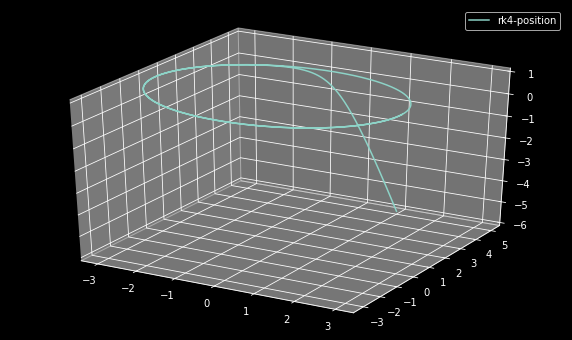

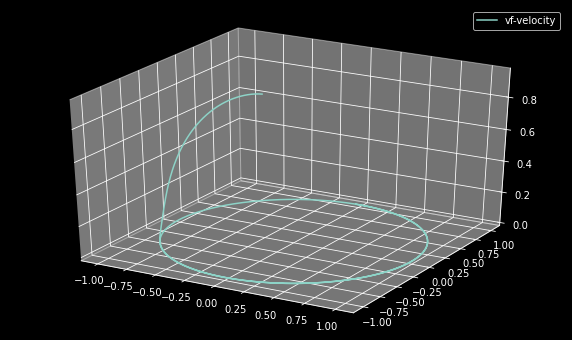

In [58]:
# Show the VF integral
# just show some integral curve
# from scipy.integrate import odeint
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import numpy

import scipy.integrate as integrate
import matplotlib.animation as animation


         
from JSAnimation import IPython_display    
from IPython.display import HTML

from matplotlib import pyplot as plt
from scipy.linalg import norm

pos = [1, 5, -6]

def f(pos,t0):
    return VF(pos)*0.1

#curve2 = odeint(func=f,y0=pos,t=range(0,400))
curve=np.empty([4000,3])
velocity=np.empty([4000,3])
for i in range(0,4000):
    curve[i,:] = pos  
    # To get velocity at current position
    velocity[i,:] = VF(pos)
    # To get updates estimated next position
    pos = rk4_int(VF, pos ,.01) # last term makes it multiple cycles  3- multiple --.001 straight line
    # the rk4_int gets the next position could use this for pid control
    
    
#mpl.rcParams['legend.fontsize'] = 10

#uncomment for plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(curve[:,0], curve[:,1], curve[:,2], label='rk4-position')
ax.legend()

# ax.plot(curve2[:,0], curve2[:,1], curve2[:,2], label='odeint')



plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(velocity[:,0], velocity[:,1], velocity[:,2], label='vf-velocity')
ax.legend()

# ax.plot(curve2[:,0], curve2[:,1], curve2[:,2], label='odeint')



plt.show()


In [54]:
dx = np.array([0, 0, 0, 0., 0., 0.])
dx[:3] = [1,2,3]
dx[3:] = [4, 5, 6]
dx

array([1., 2., 3., 4., 5., 6.])

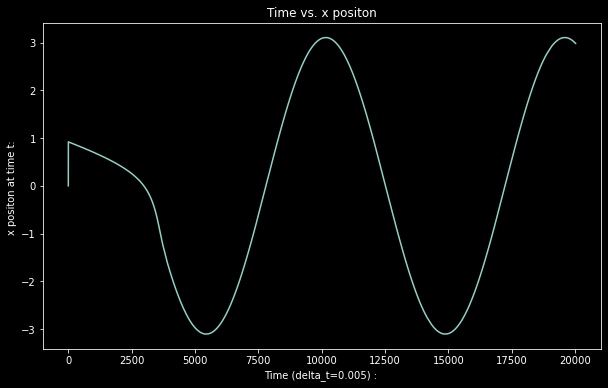

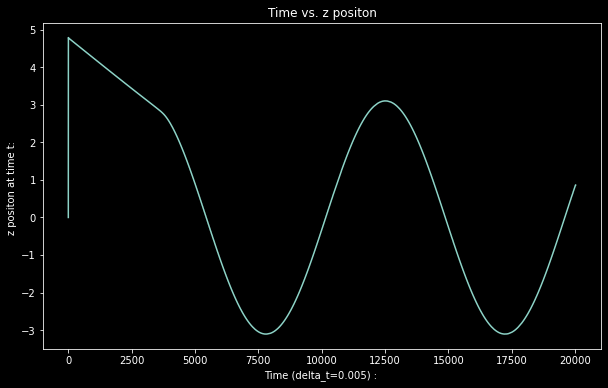

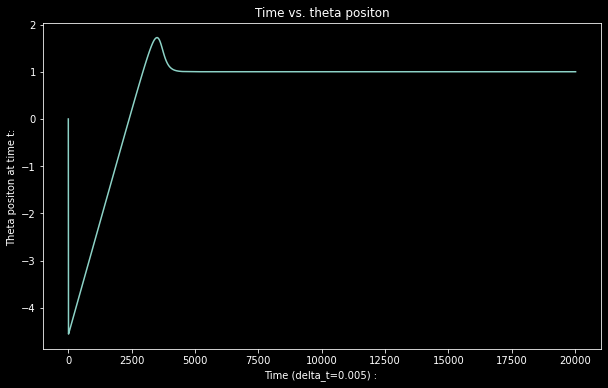

In [61]:

'''
We give a position to the vectory field function which outputs a velocity for the desired trajectory
we use the RK4 method using the VF and intial condition info we estimate the next desired positions 
then use an SE(3) controller to get the point robot to move along that path - plot the actual trajectory
and the desired trajectory 
'''
# Using an SE(3) Controller to get to the desired position 
# plot the actural trajectory vs. the controller trajectory 

h, w = curve.shape[ : 2]
time_intervals = []
positions = []
dx = np.array([0, 0, 0, 0., 0., 0.])

# gains 
kp_x = 5
kd_x = 4
kp_z= 5
kd_z = 4 
kp_th = 2
kd_th = 3 

# target
target = np.array([0., 0., 0., 0., 0., 0.])  
# current
current_pose = np.array([0., 0., 0., 0., 0., 0.])

run_time  = 5
delta_t = .005 # in seconds 
t_total = 0
for i in range(h):
    t = 0
    while t < run_time :
        target[:3] = curve[i]
        target[3:] = velocity[i]
        
        ax = kp_x * (target[0] - current_pose [0]) + kd_x * (target[3] - current_pose[3])
        az = kp_z * (target[1] - current_pose [1]) + kd_z * (target[4] - current_pose[4])
        ath = kp_th * (target[2] - current_pose [2]) + kd_th * (target[5] - current_pose[5])

        th = current_pose [2]
        dx[:3] = current_pose[3:]
        dx[3:] = [ax, az, ath]
        current_pose = simulate(delta_t, current_pose , dx)

        positions.append(np.copy(current_pose))
        time_intervals.append(t_total)
        t_total =  t_total + delta_t
        t = t + delta_t 


 
plt.title('Time vs. x positon')
plt.xlabel('Time (delta_t=0.005) : ')
plt.ylabel('x positon at time t: ')

x = np.array(positions)
plt.plot(time_intervals,    x[:,0])


plt.show()
 


plt.title('Time vs. z positon')
plt.xlabel('Time (delta_t=0.005) : ')
plt.ylabel('z positon at time t: ')

x = np.array(positions)
plt.plot(time_intervals,    x[:,1])


plt.show()
 

    
plt.title('Time vs. theta positon')
plt.xlabel('Time (delta_t=0.005) : ')
plt.ylabel('Theta positon at time t: ')

x = np.array(positions)
plt.plot(time_intervals,    x[:,2])


plt.show()
 

In [ ]:
# https://github.com/dsaldana/CSE360-MobileRobotics/blob/master/Trajectories.ipynb
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    ax.plot(theta_x, theta_y, 'b--')
    
    # Initial conditions
    ax.plot(X,Y, 'go')
    ax.quiver(X,Y, Vx, Vy, color='0.4', scale=20)
        
    # Dynamic position
    ax.plot(theta_x[t], theta_y[t], 'ro', markersize=10)
       
    # Velocity vector
    ax.quiver([theta_x[t]], [theta_y[t]], [dx[t]], [dy[t]], color='r', units='xy', scale=10/np.linalg.norm([theta_x[t], theta_y[t]]))
    

anim = animation.FuncAnimation(fig, animate, frames=int(len(theta_x)/1), interval=25)


HTML(anim.to_jshtml())

In [ ]:
# Export the movie to mp4
# Be sure that you have the ffmpeg codec installed (sudo apt-get install ffmpeg).

In [ ]:
anim.save('trajectory2.mp4', dpi=300)
